In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV files
intent_flow_df = pd.read_csv('../csvs/marketData/market1InchIntentFlowBNBUSDT.csv')
flow_df = pd.read_csv('../csvs/marketData/market1InchFlowBNBUSDT.csv')
agg_trades_df = pd.read_csv('../csvs/marketData/aggTradesBinance_BNBUSDT.csv')

# Convert 'block_time' and 'datetime' columns to datetime
intent_flow_df['block_time'] = pd.to_datetime(intent_flow_df['block_time'], utc=True)
flow_df['block_time'] = pd.to_datetime(flow_df['block_time'], utc=True)
agg_trades_df['datetime'] = pd.to_datetime(agg_trades_df['datetime'], utc=True)

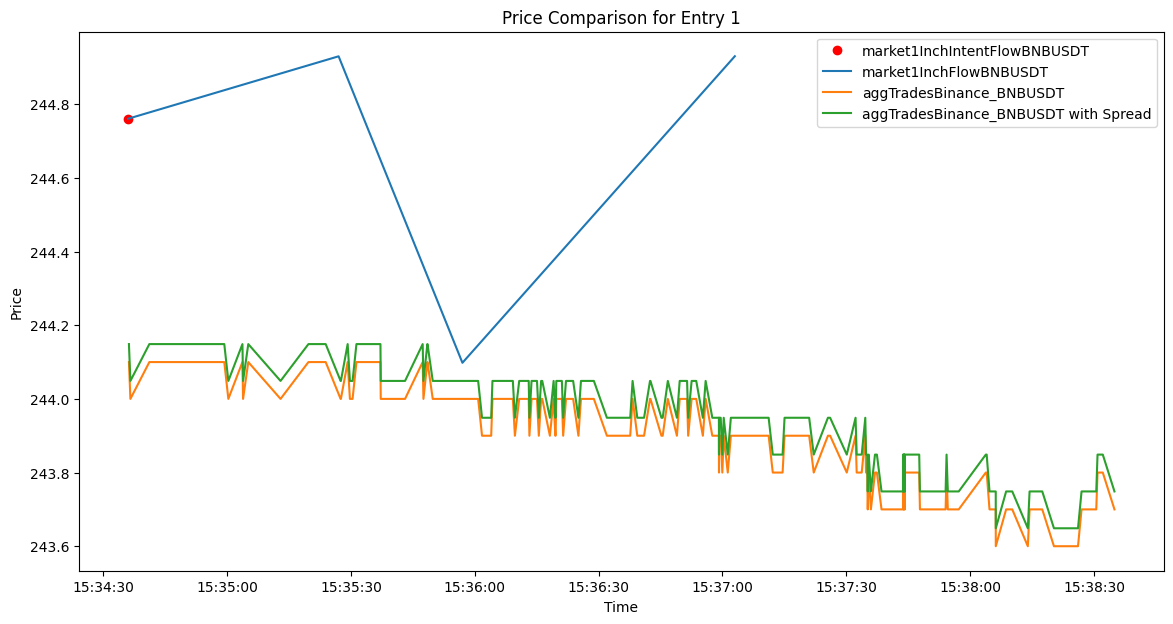

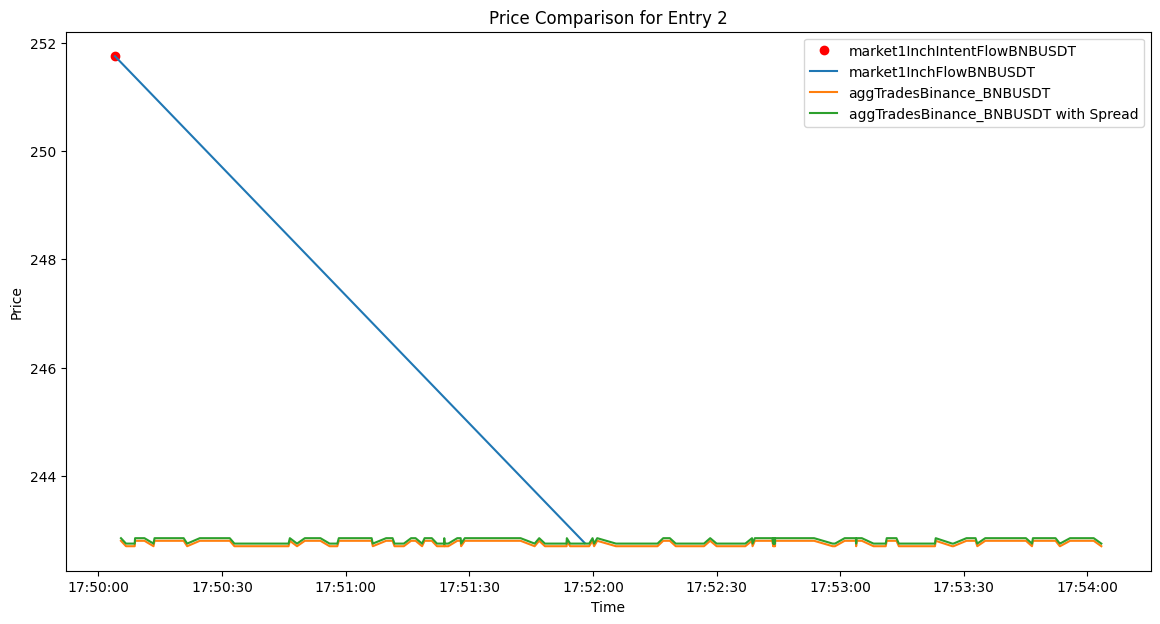

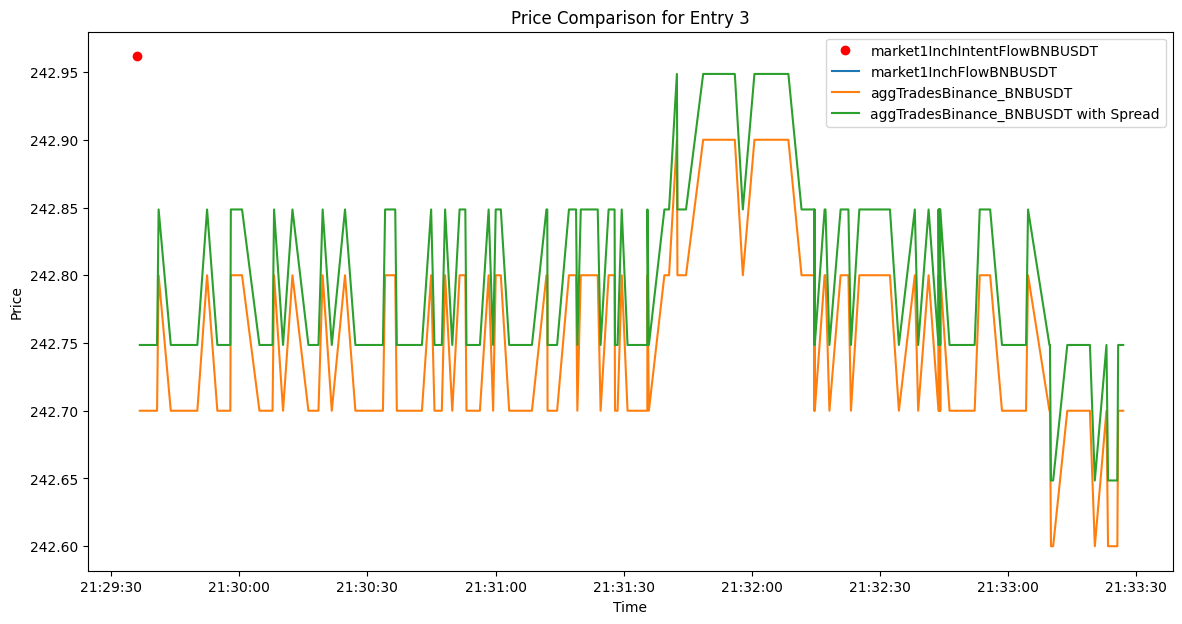

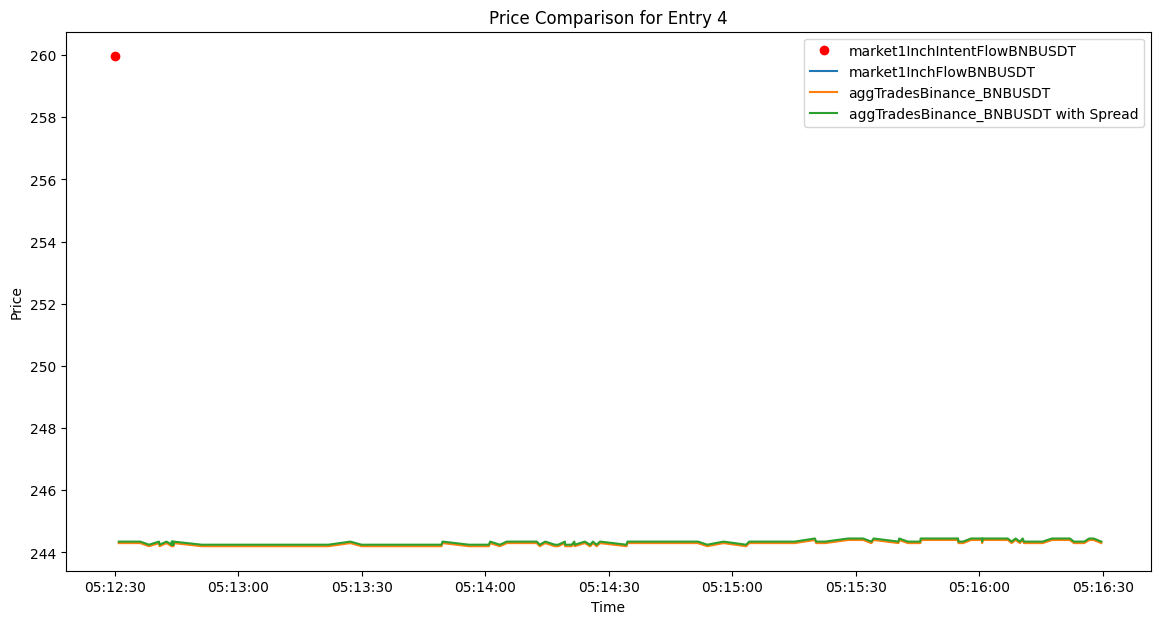

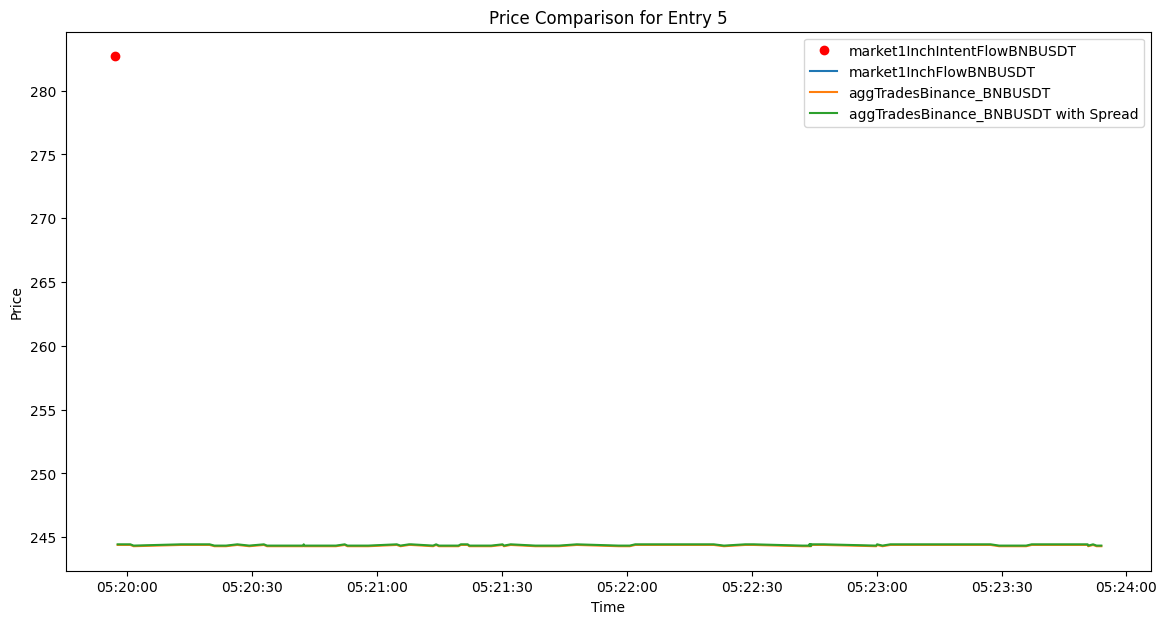

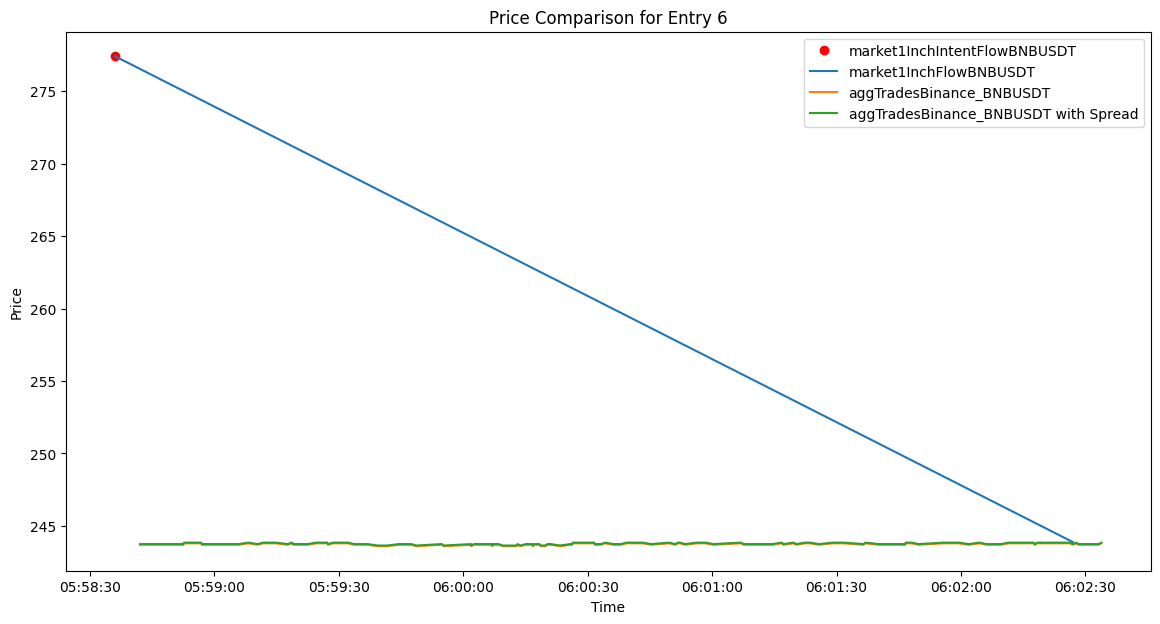

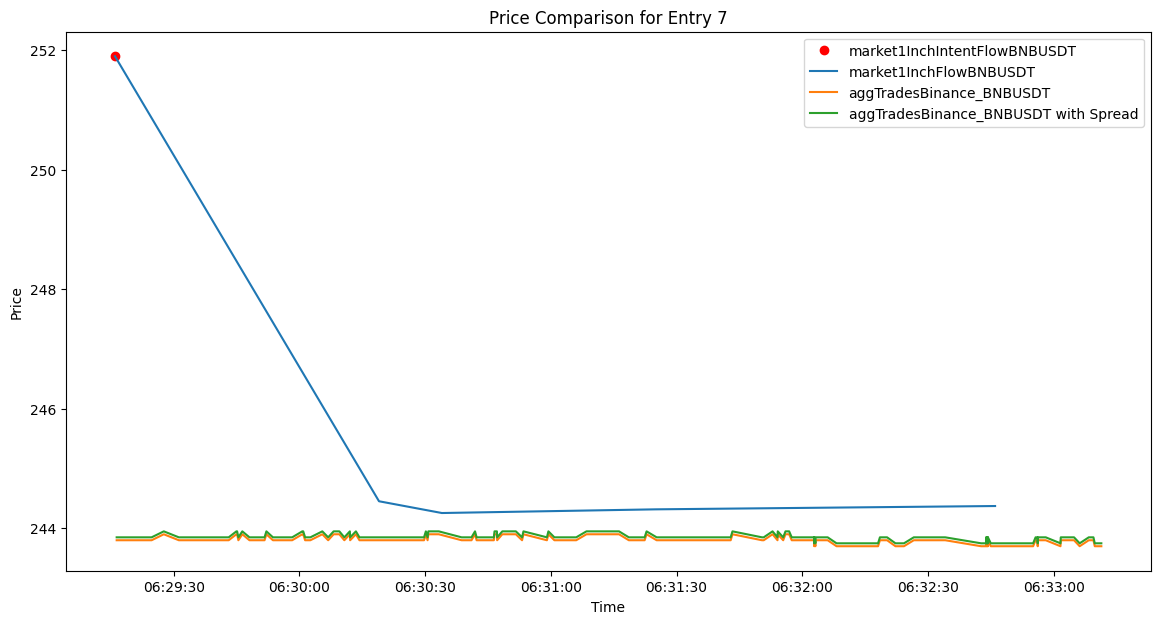

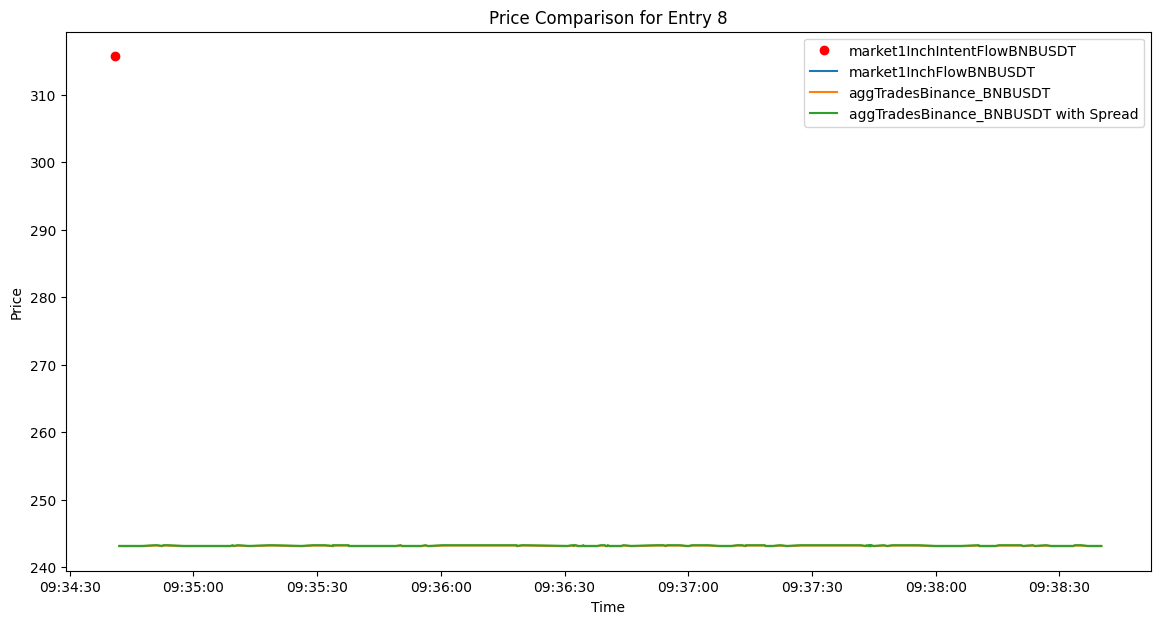

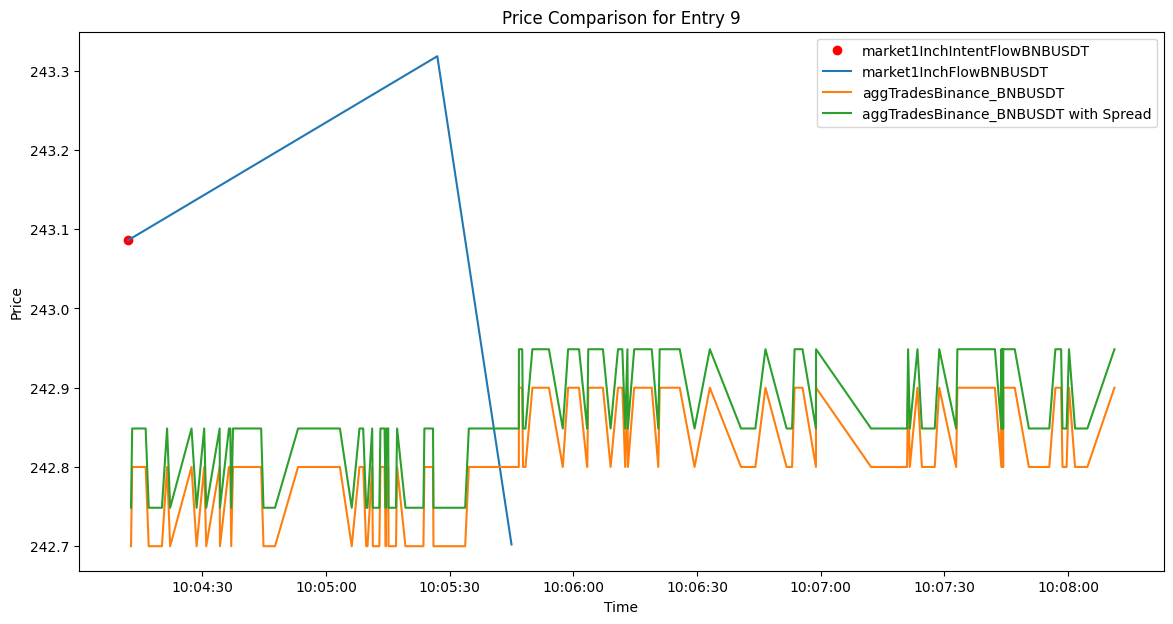

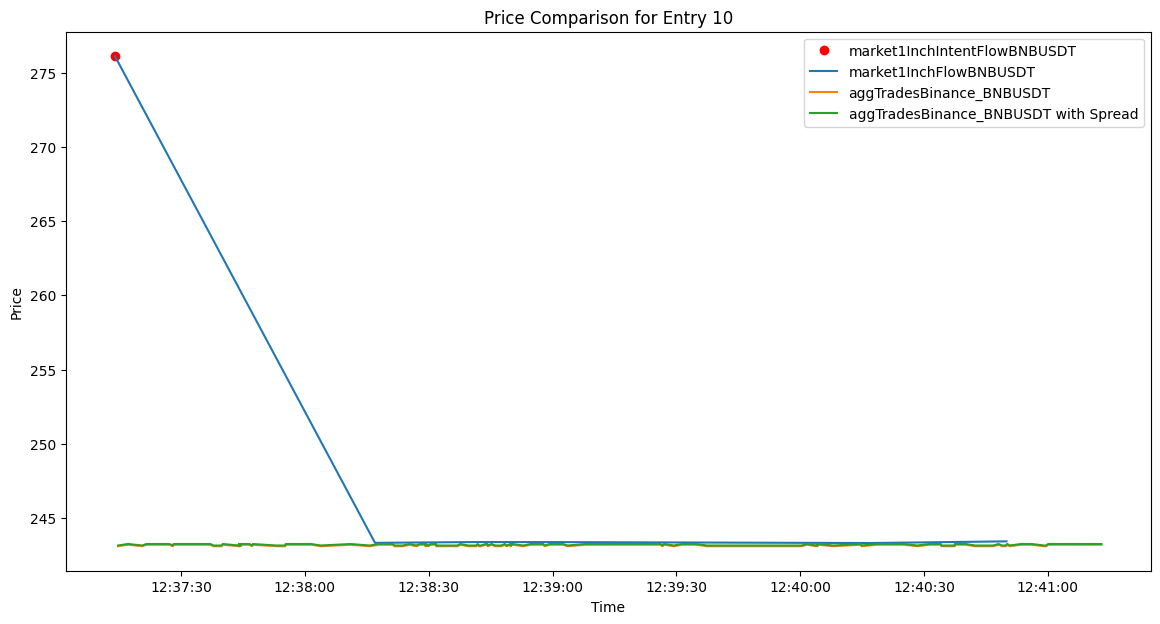

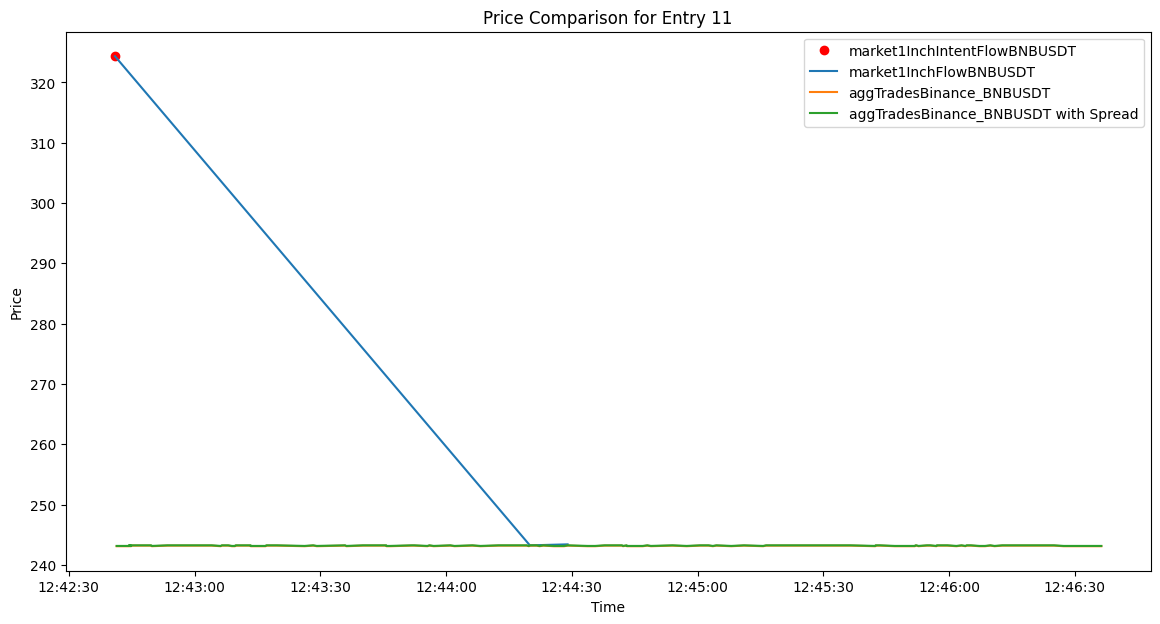

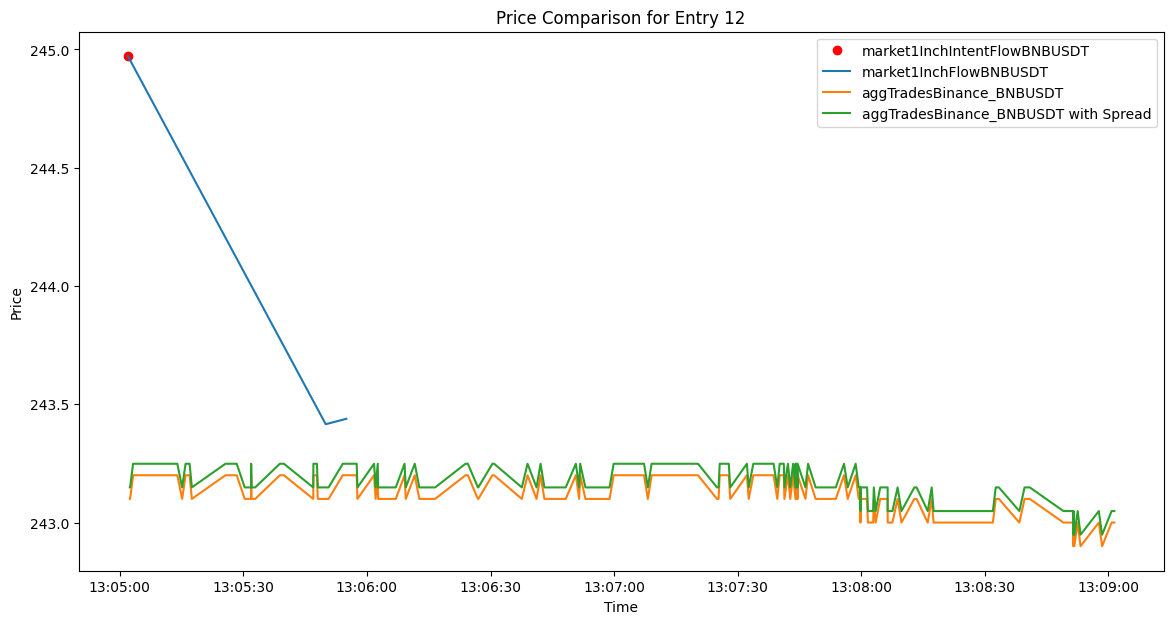

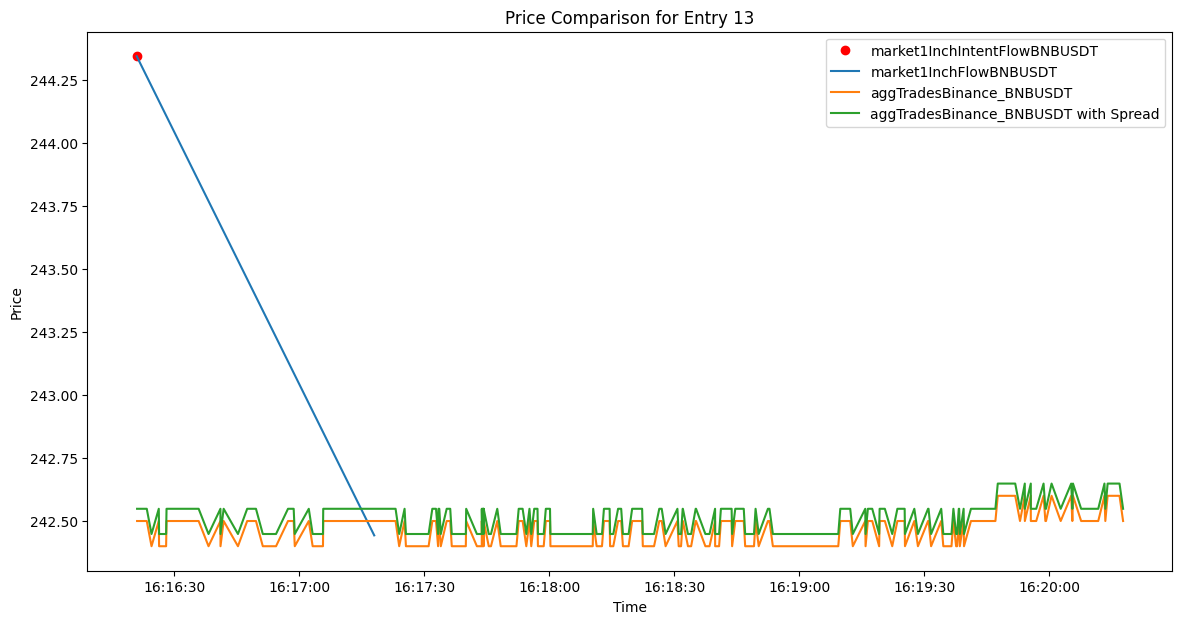

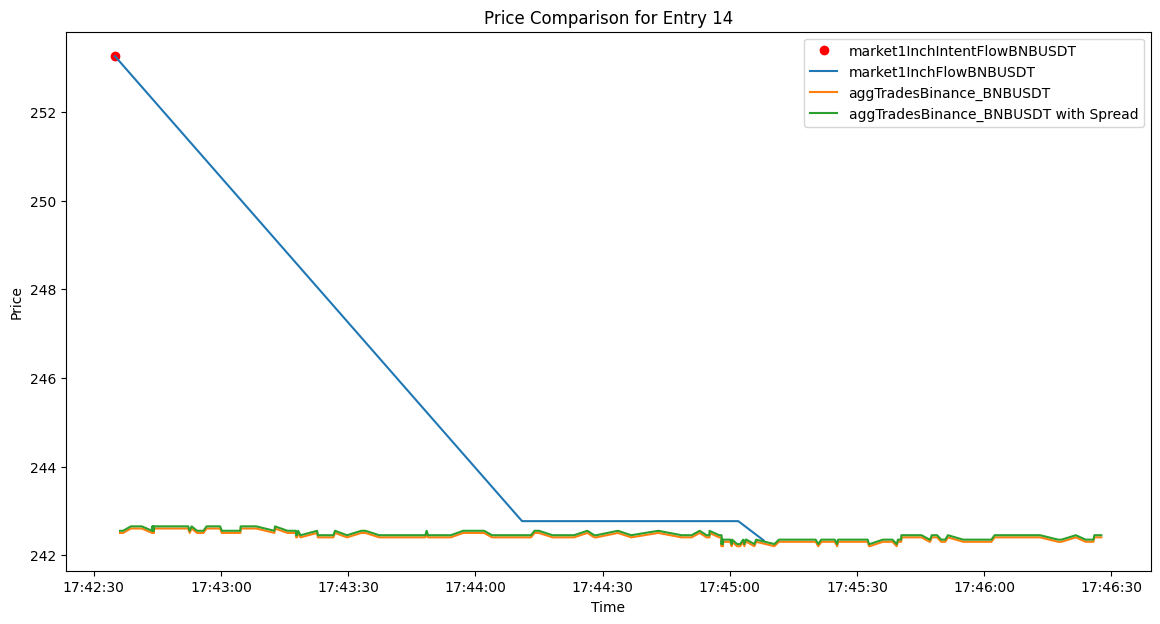

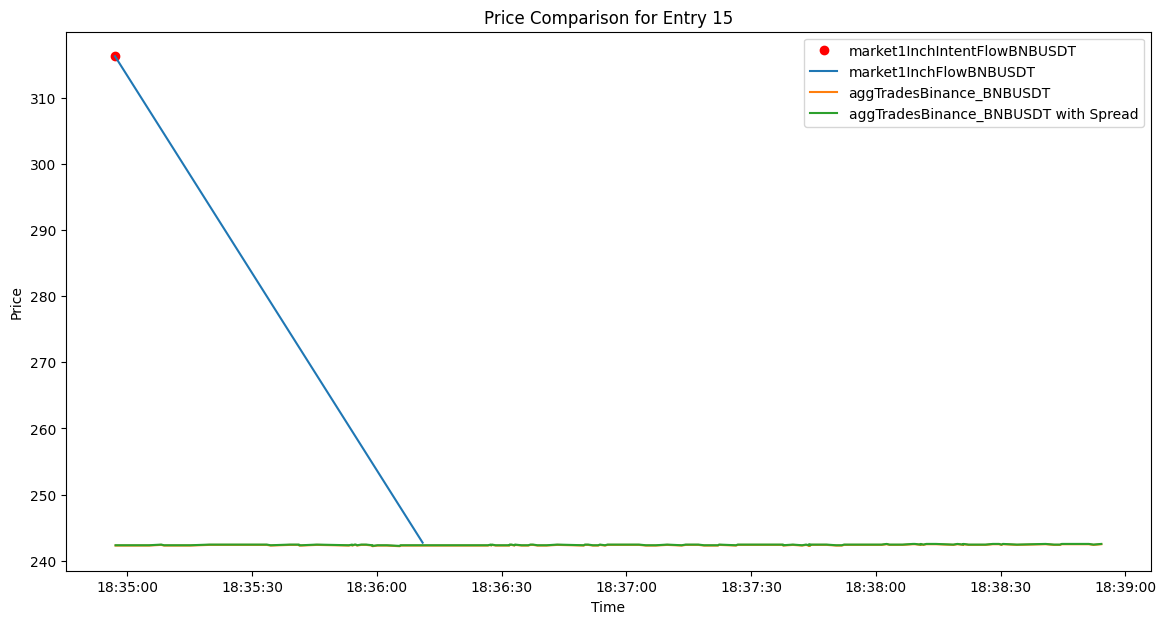

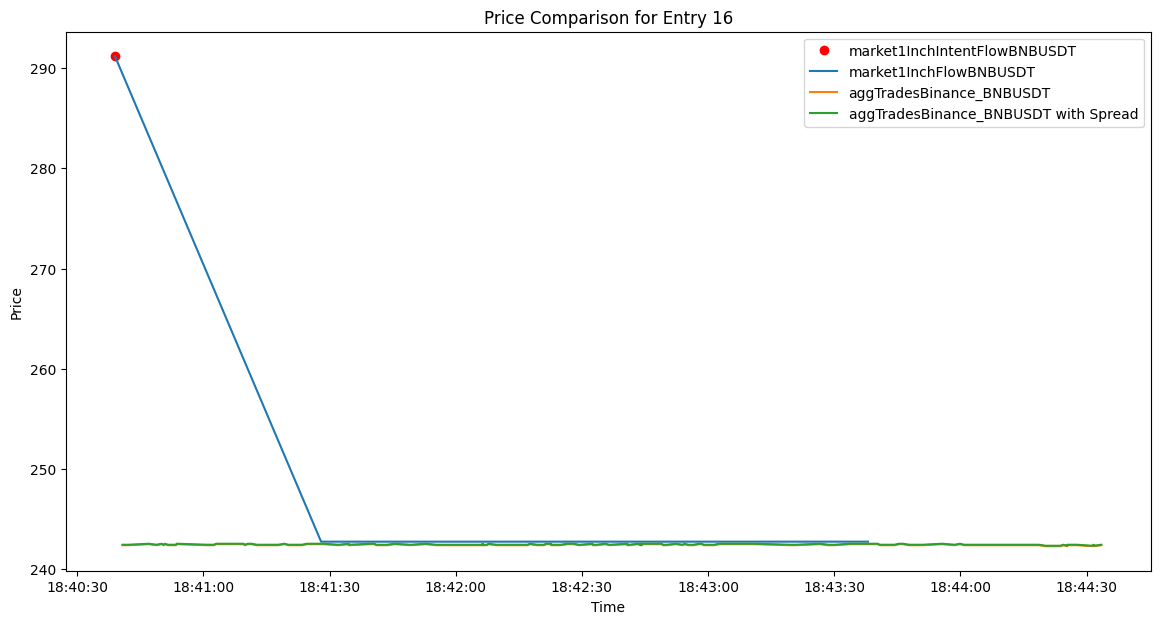

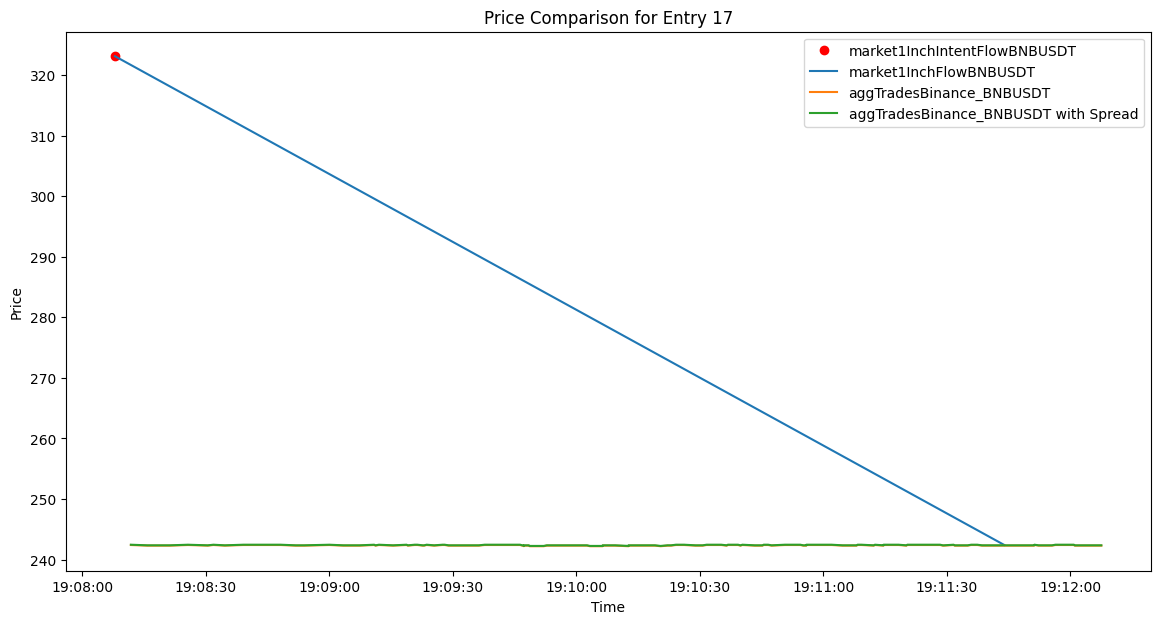

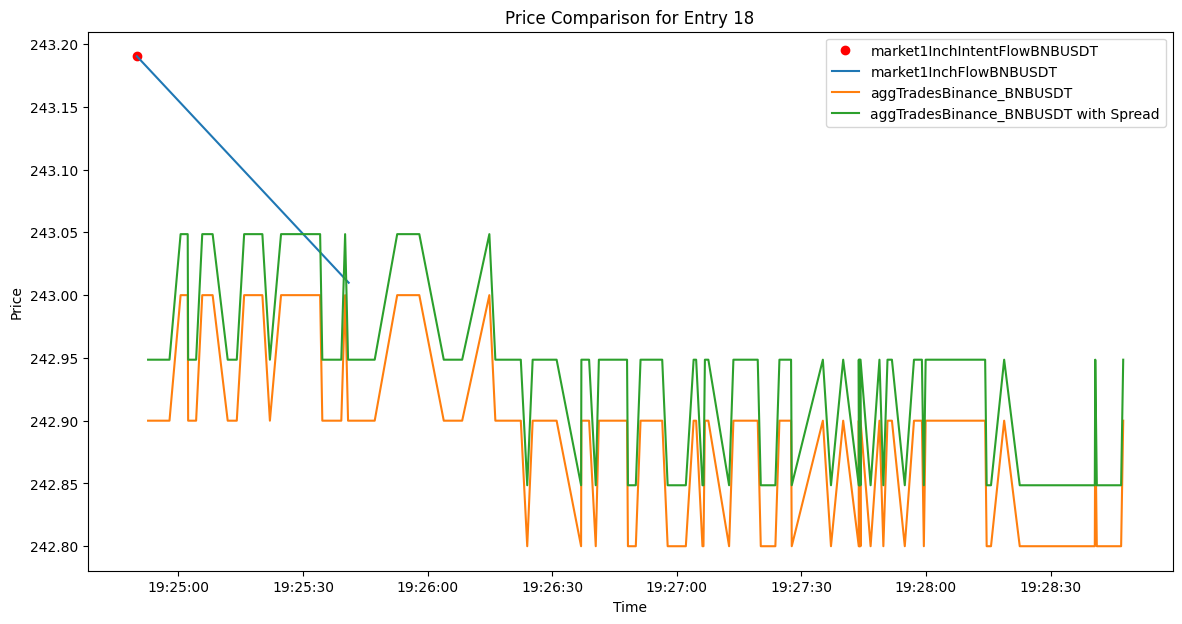

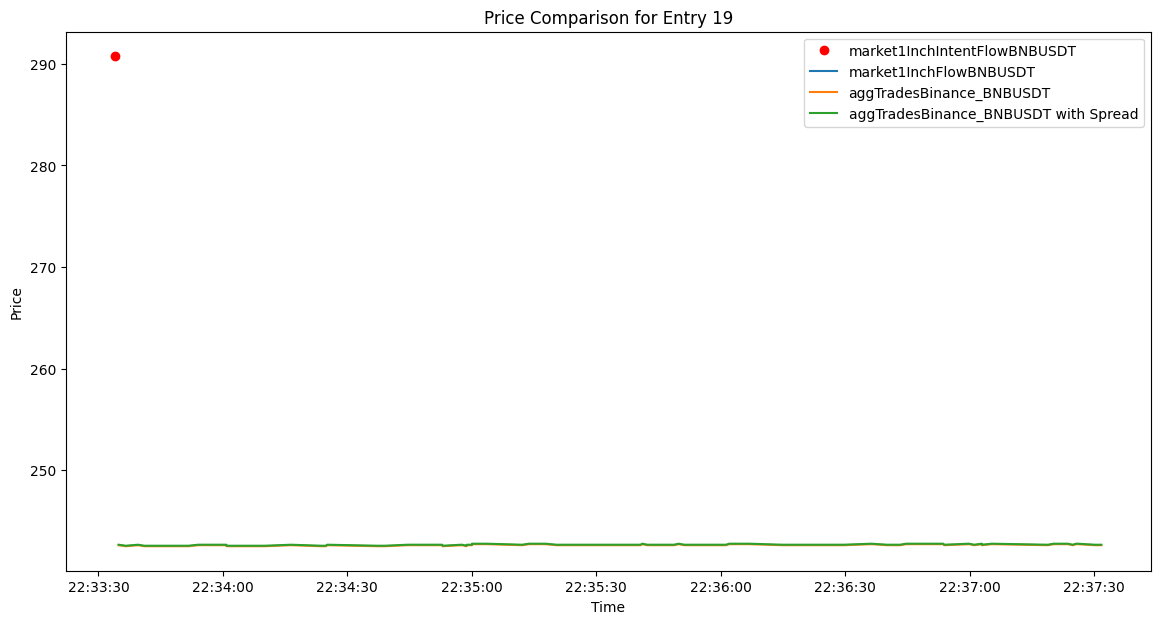

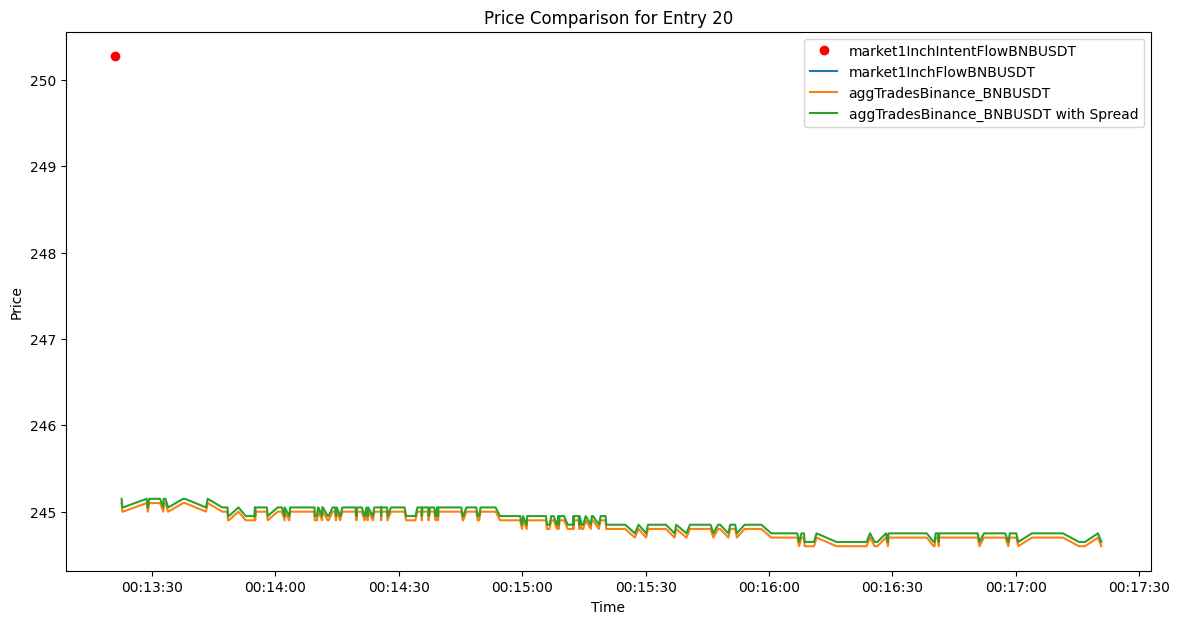

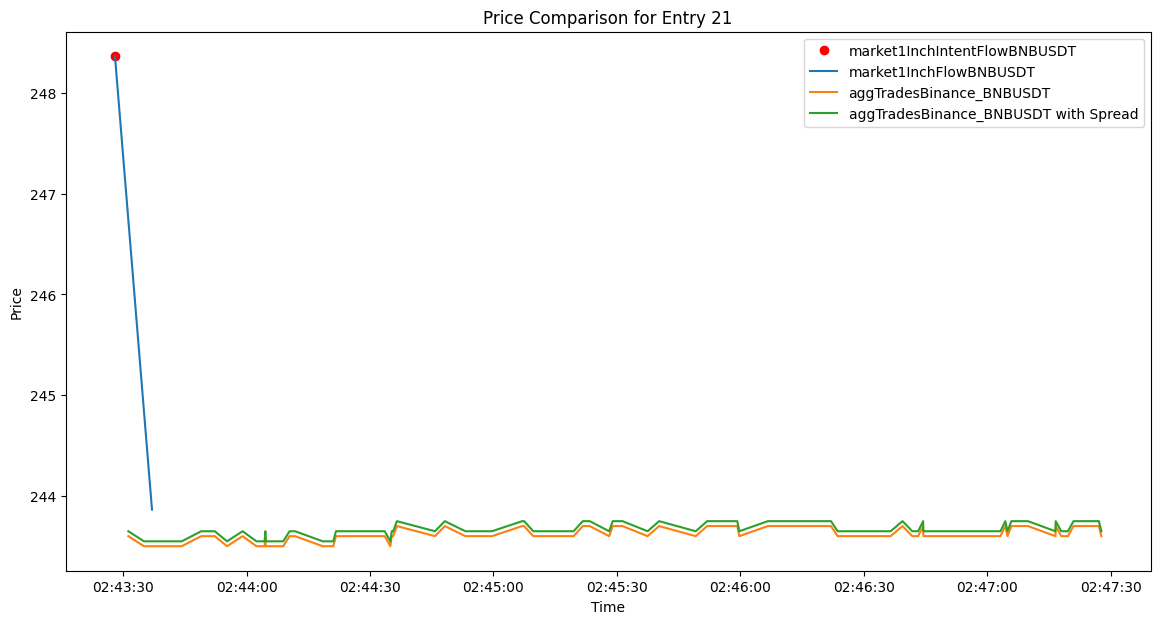

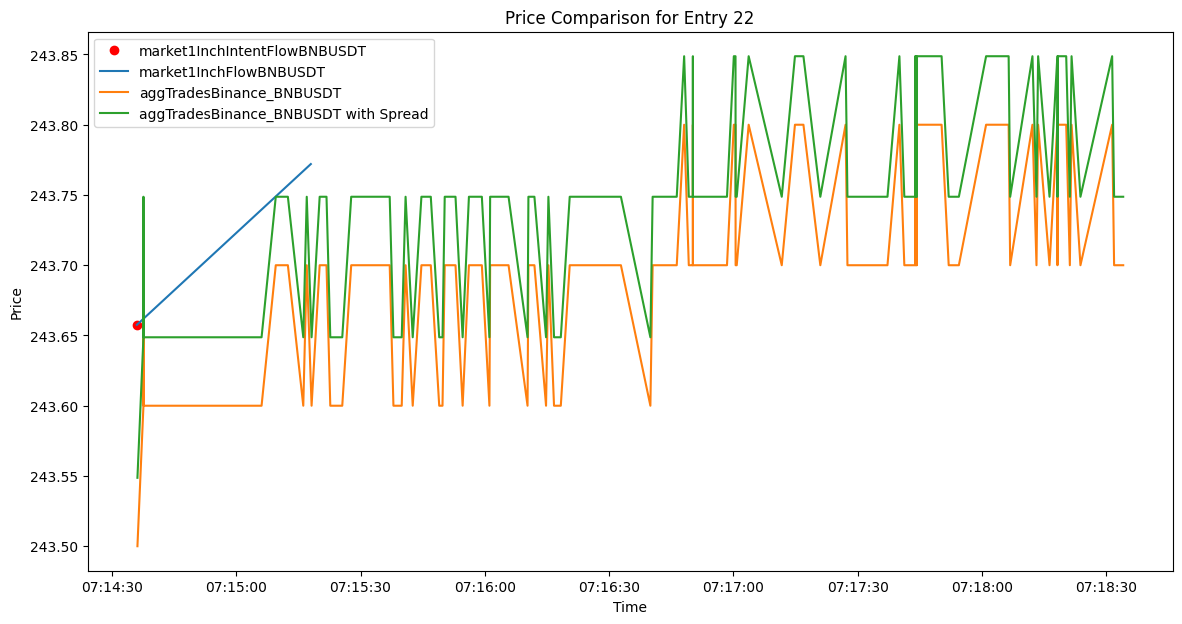

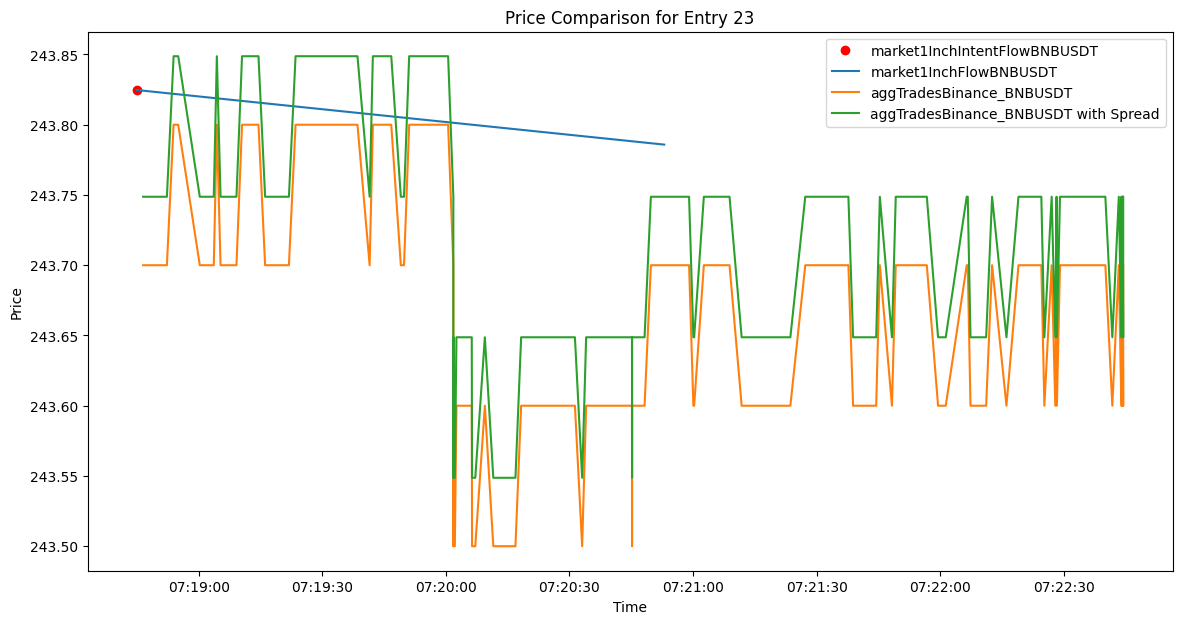

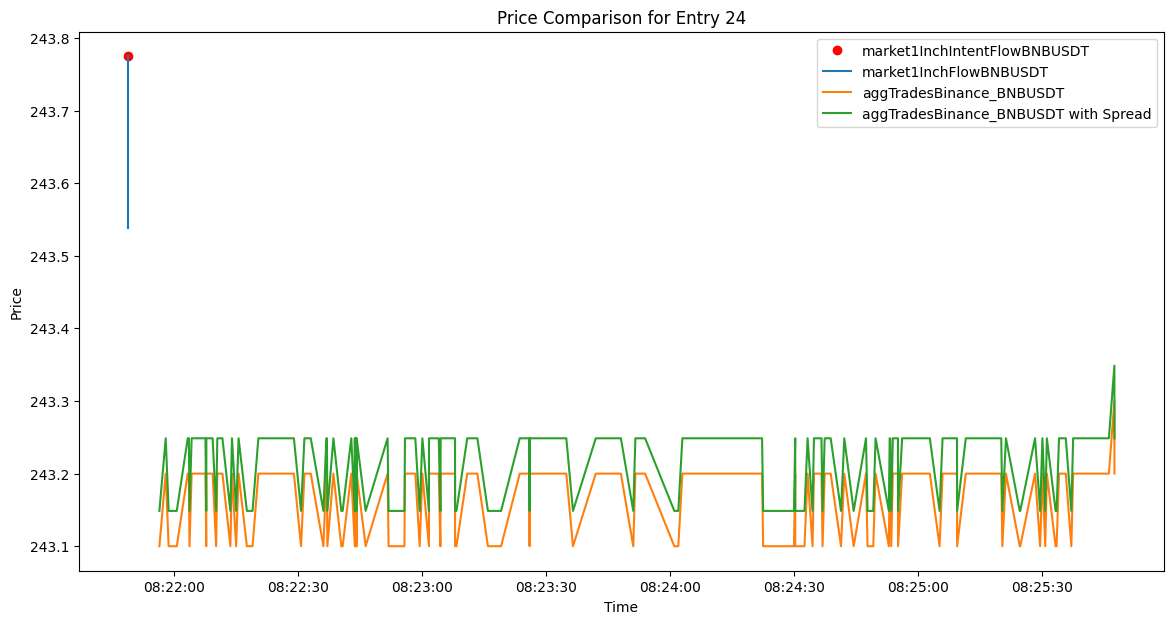

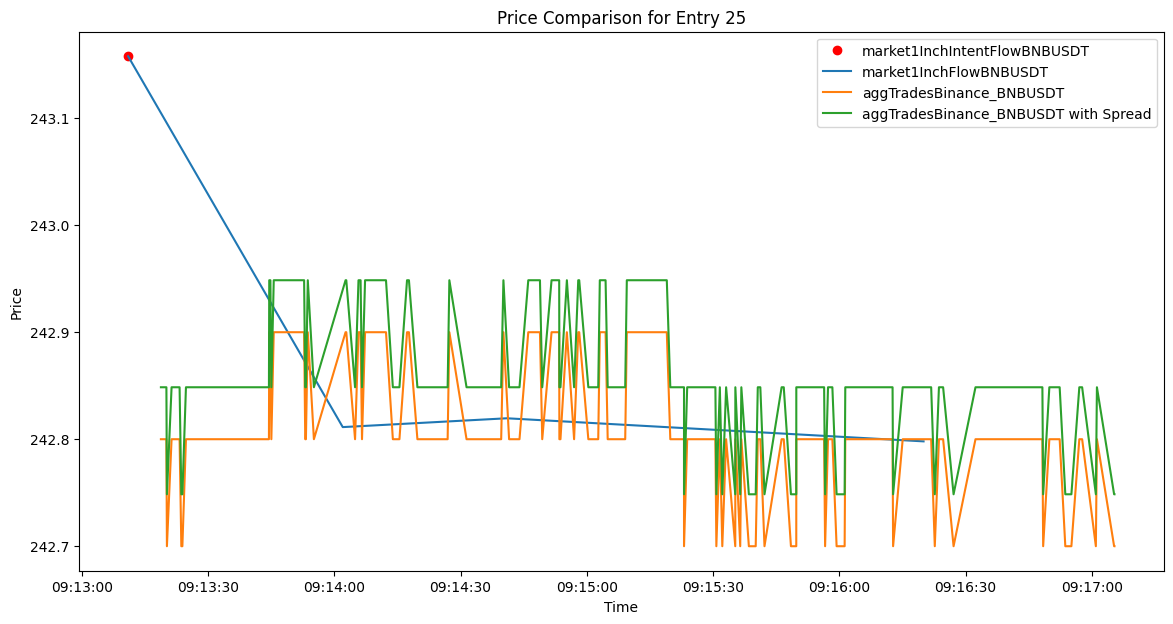

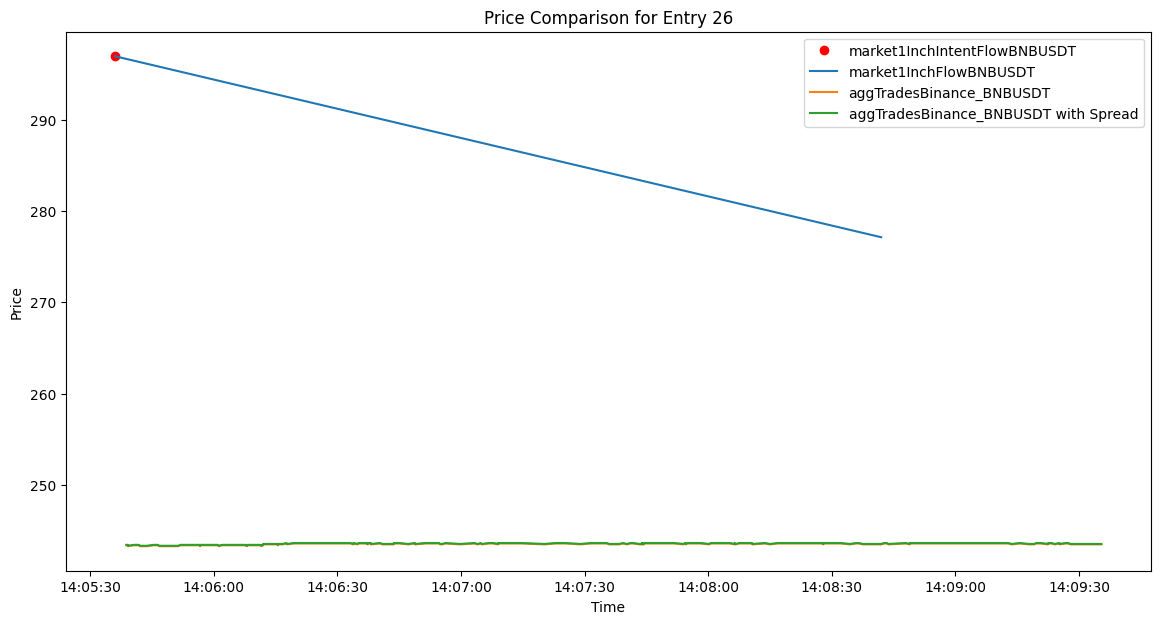

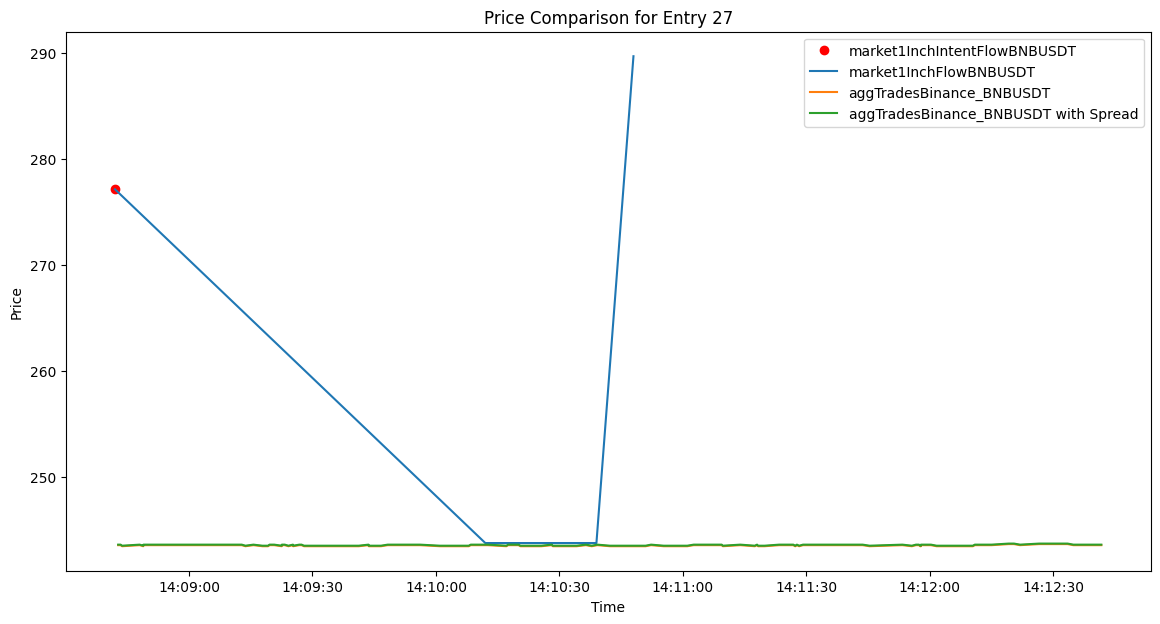

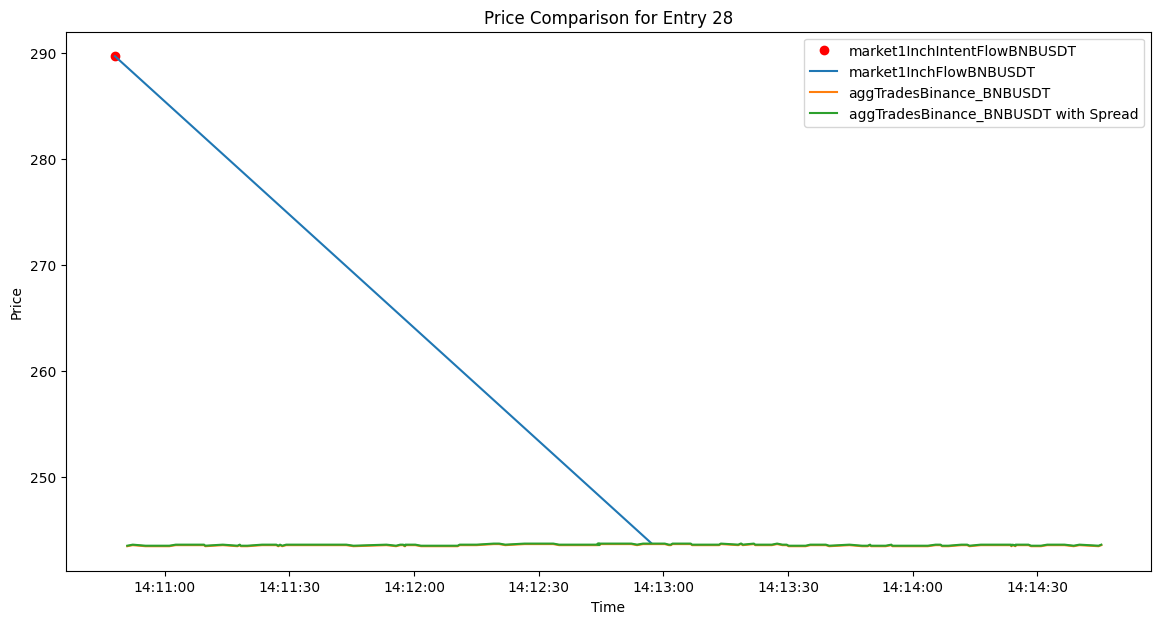

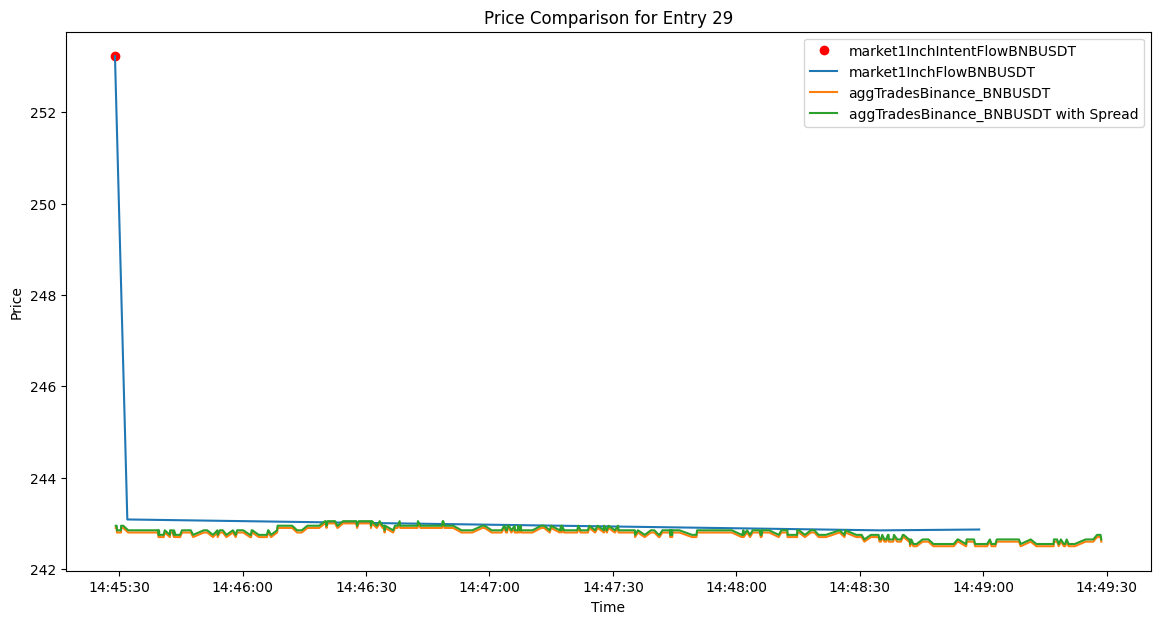

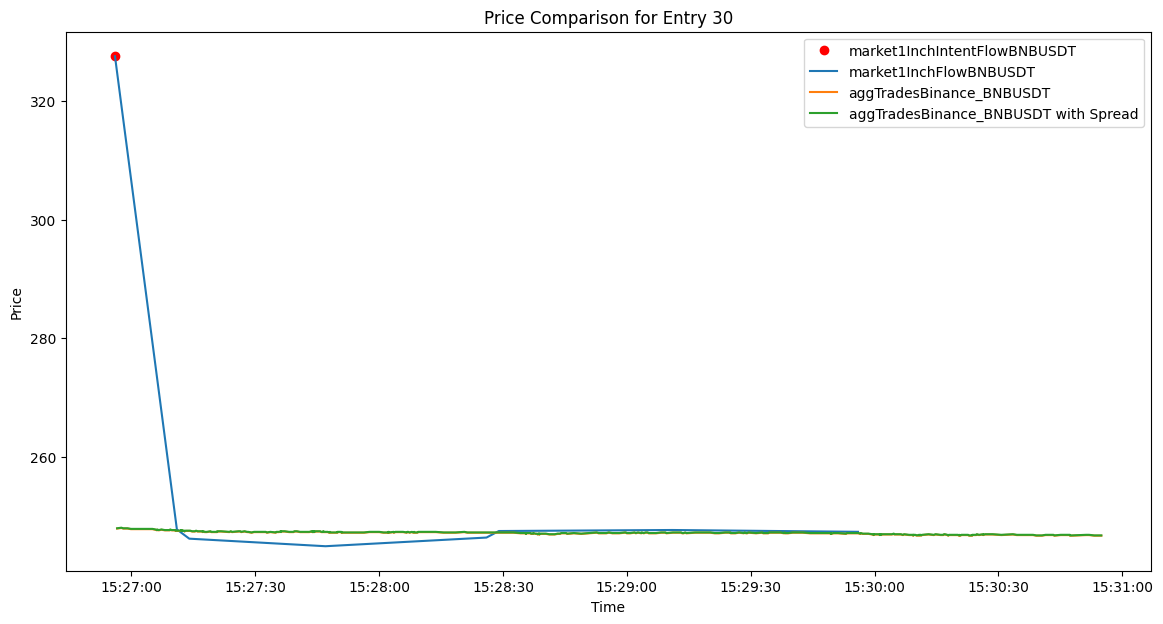

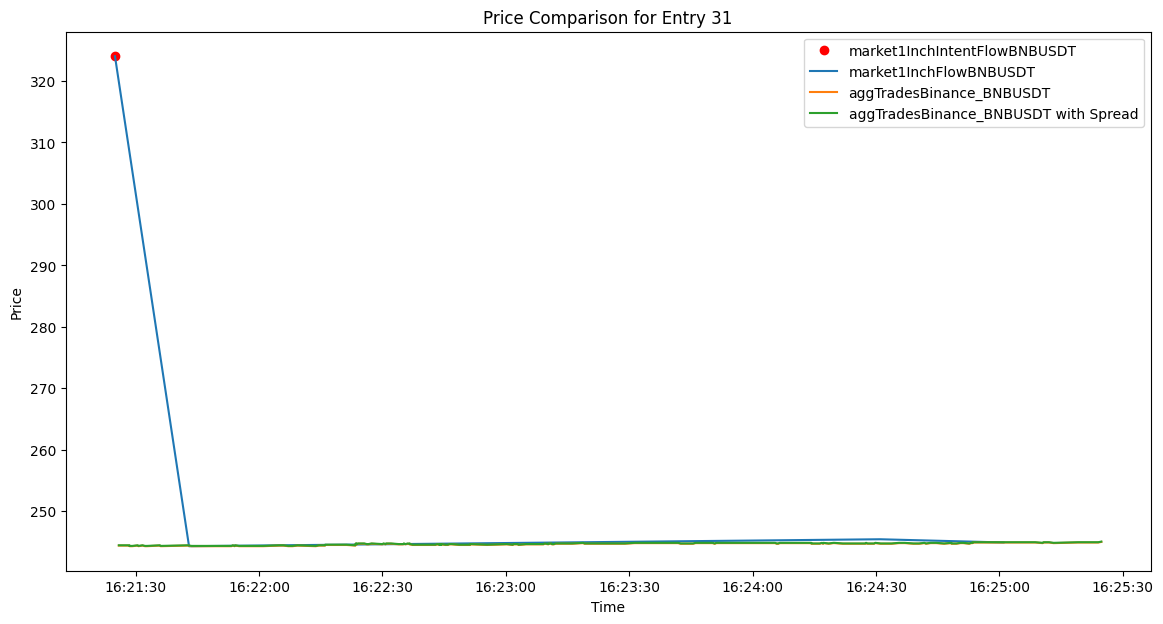

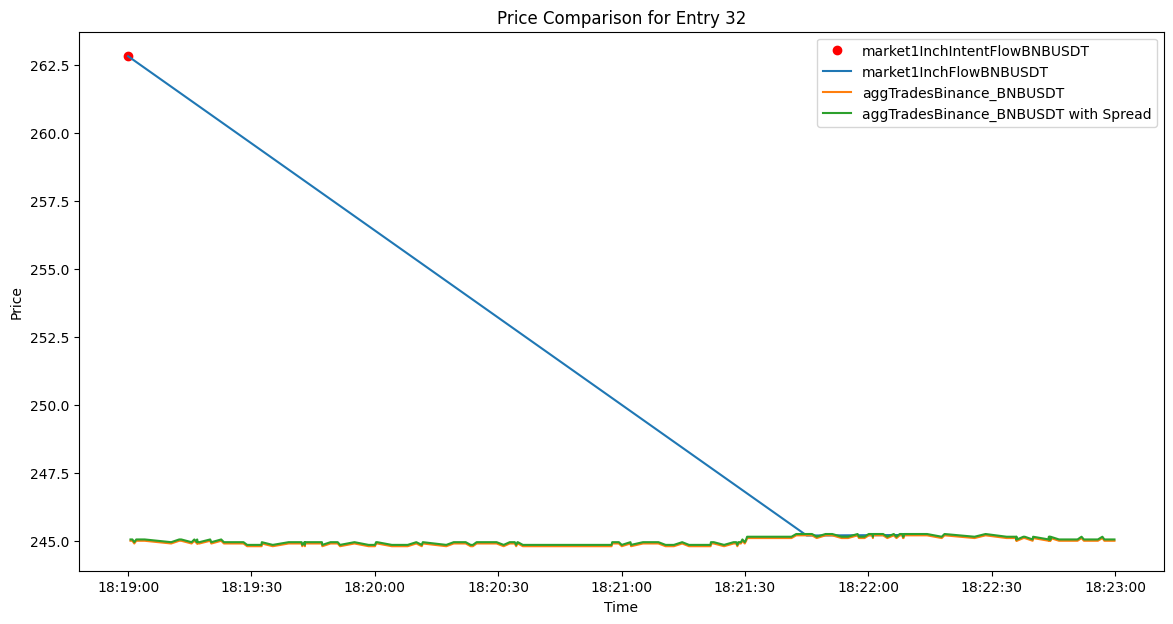

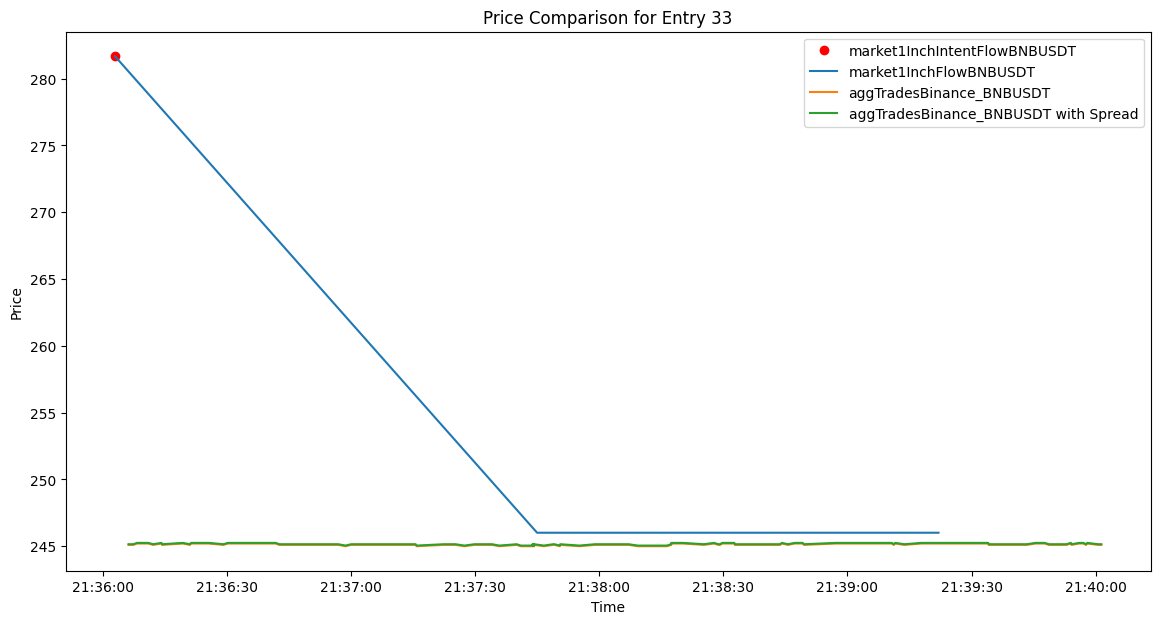

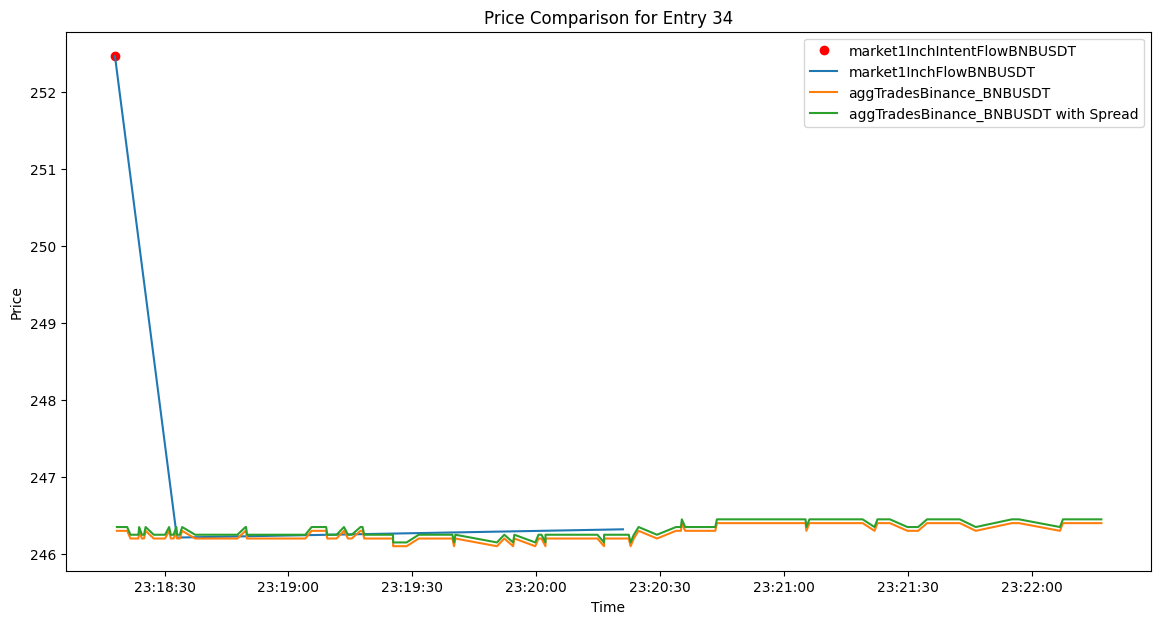

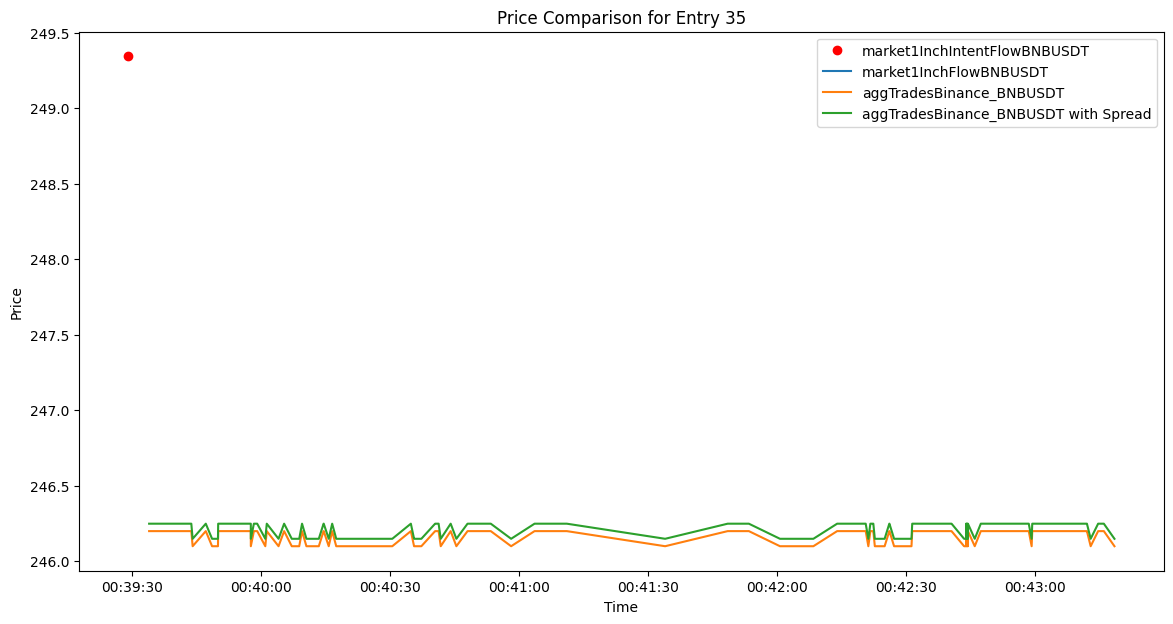

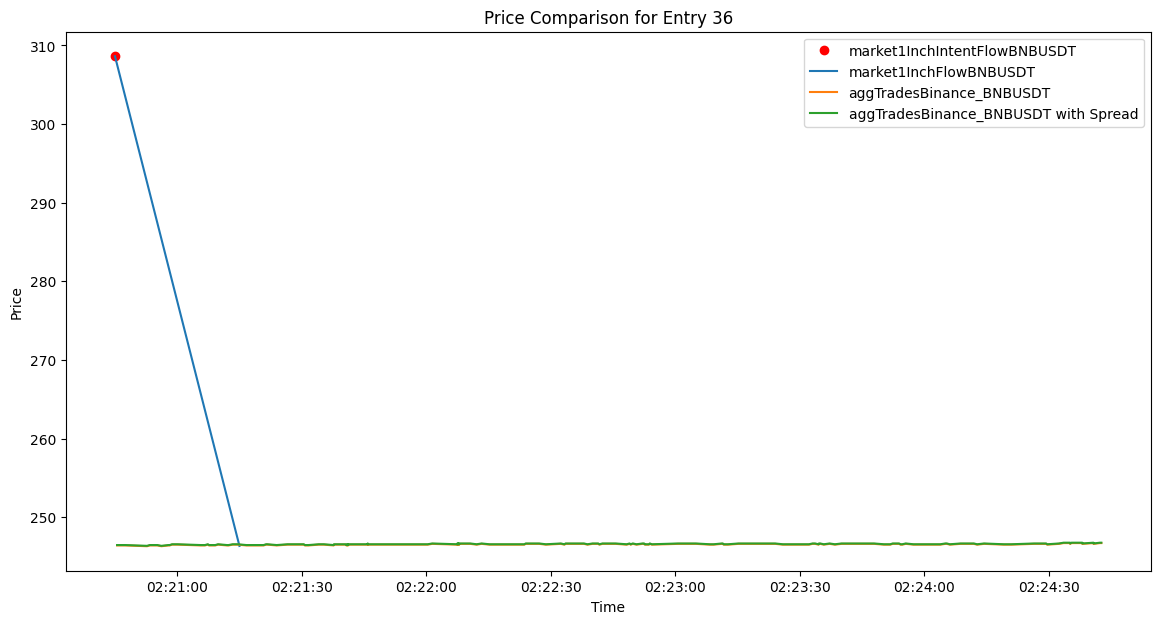

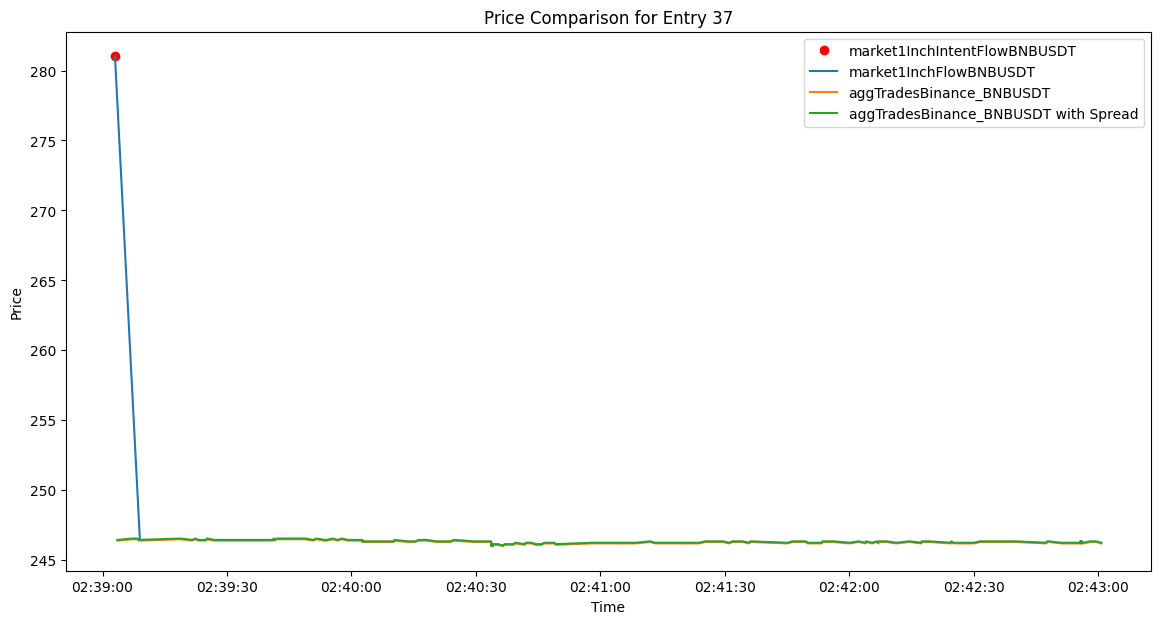

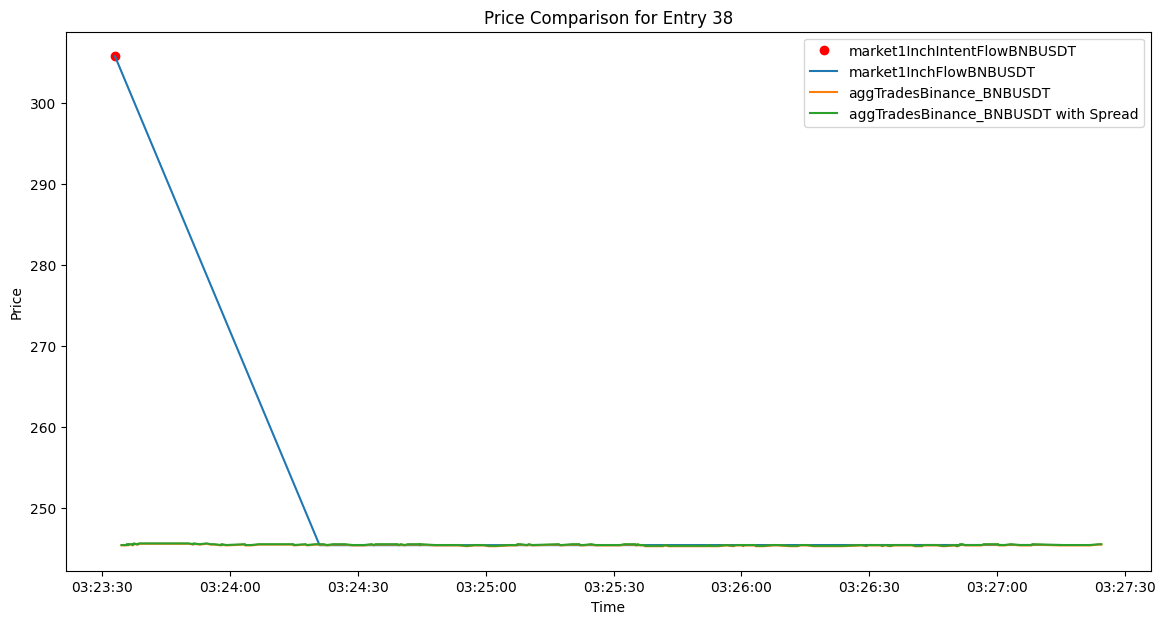

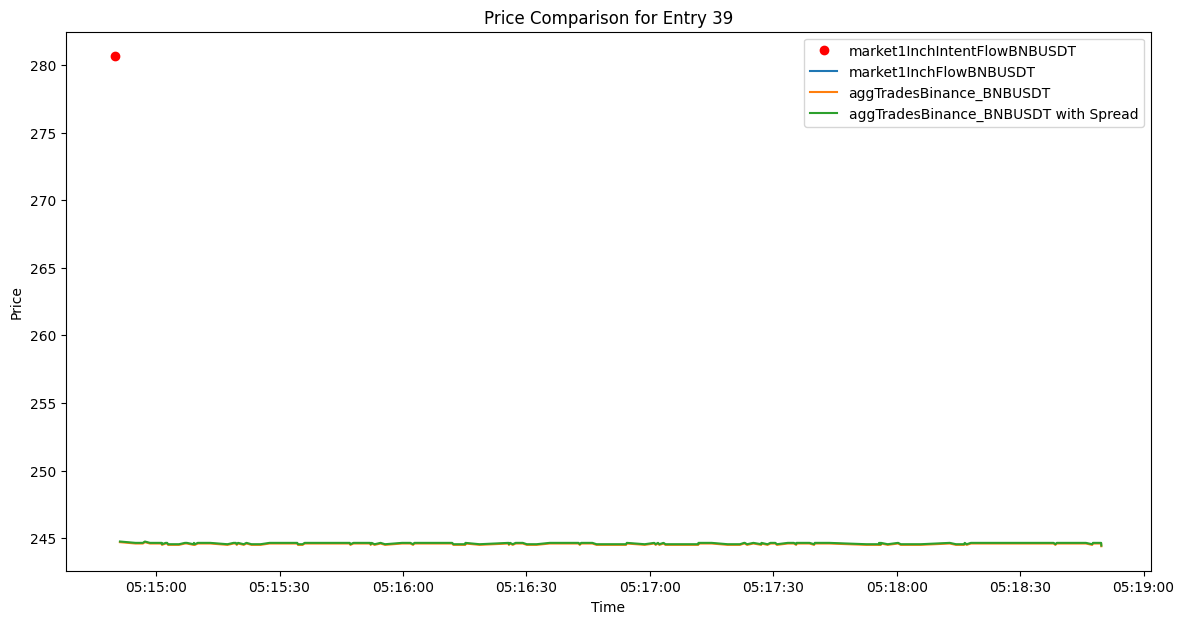

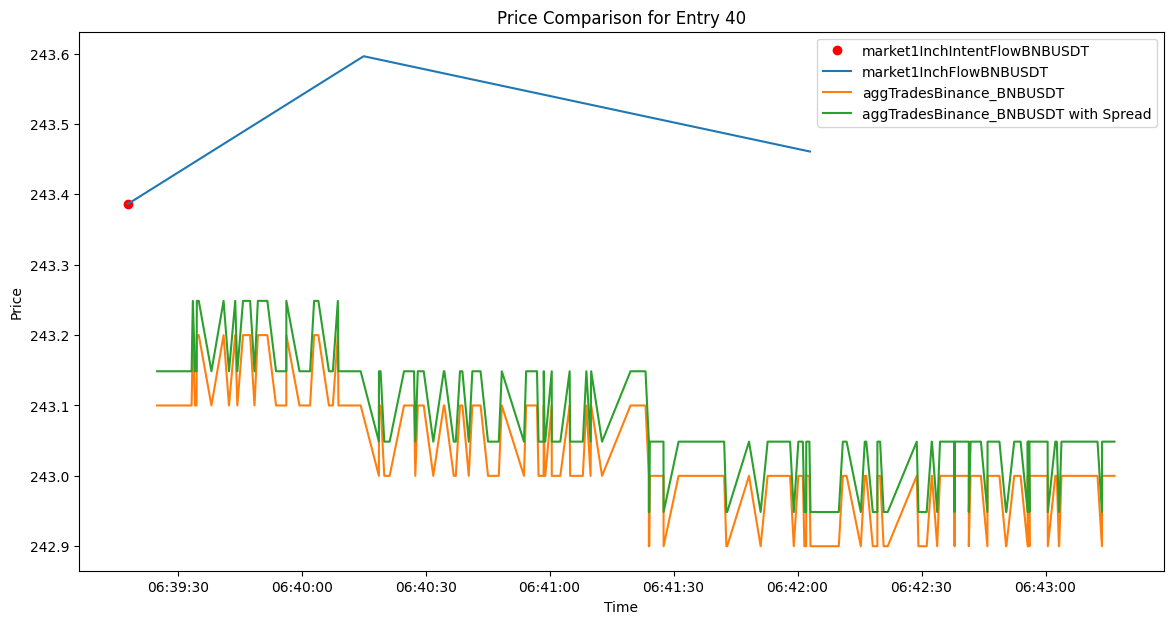

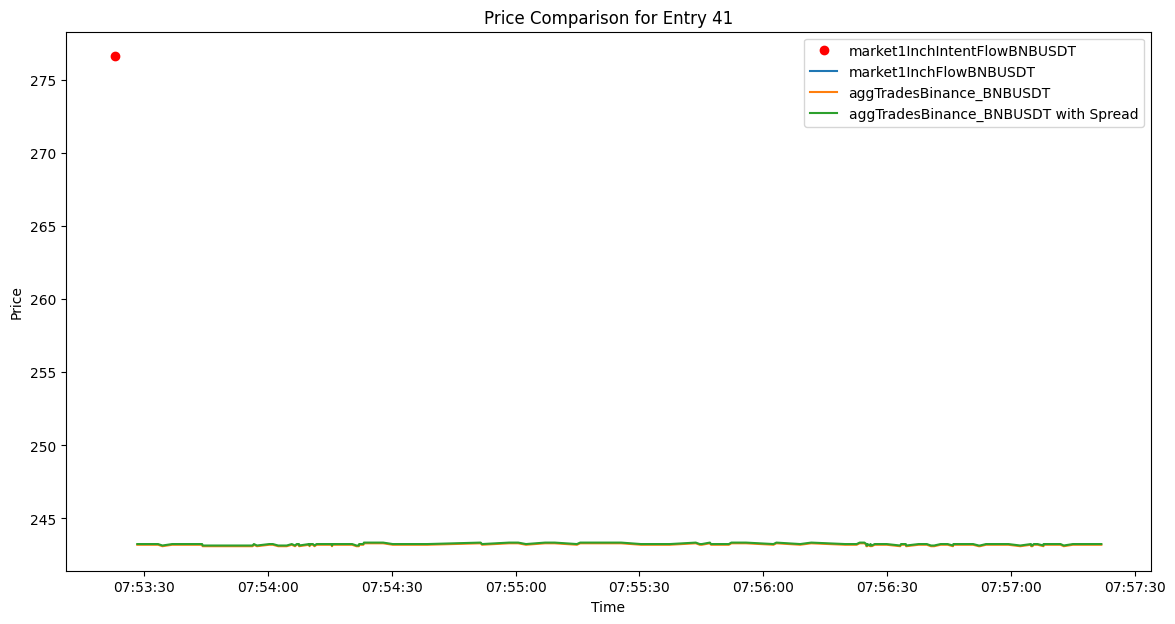

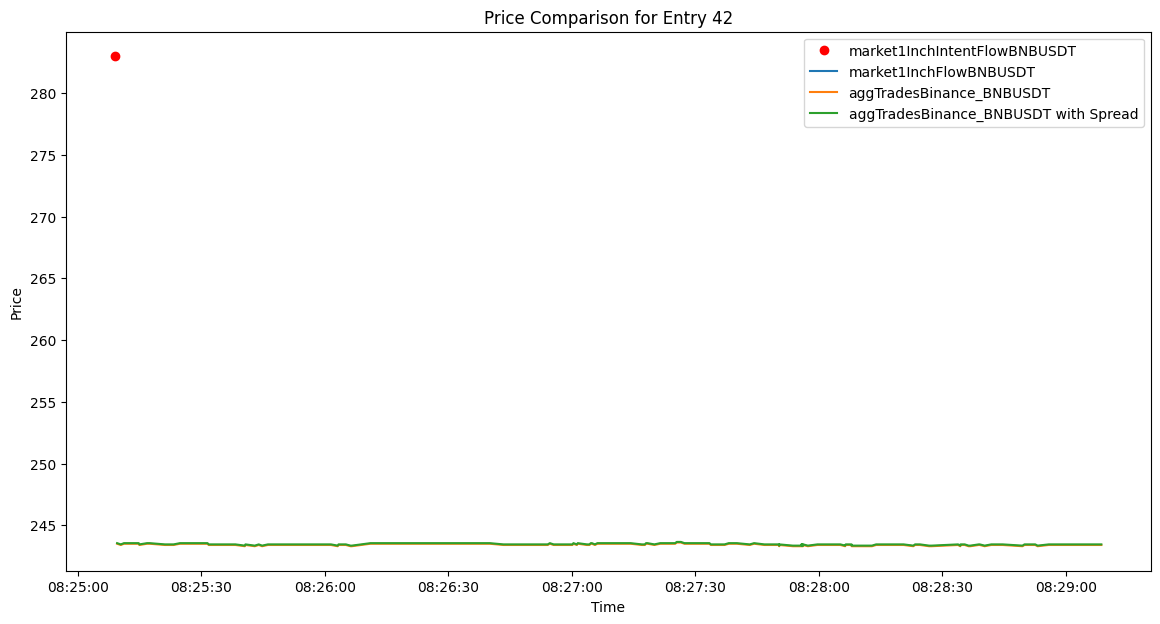

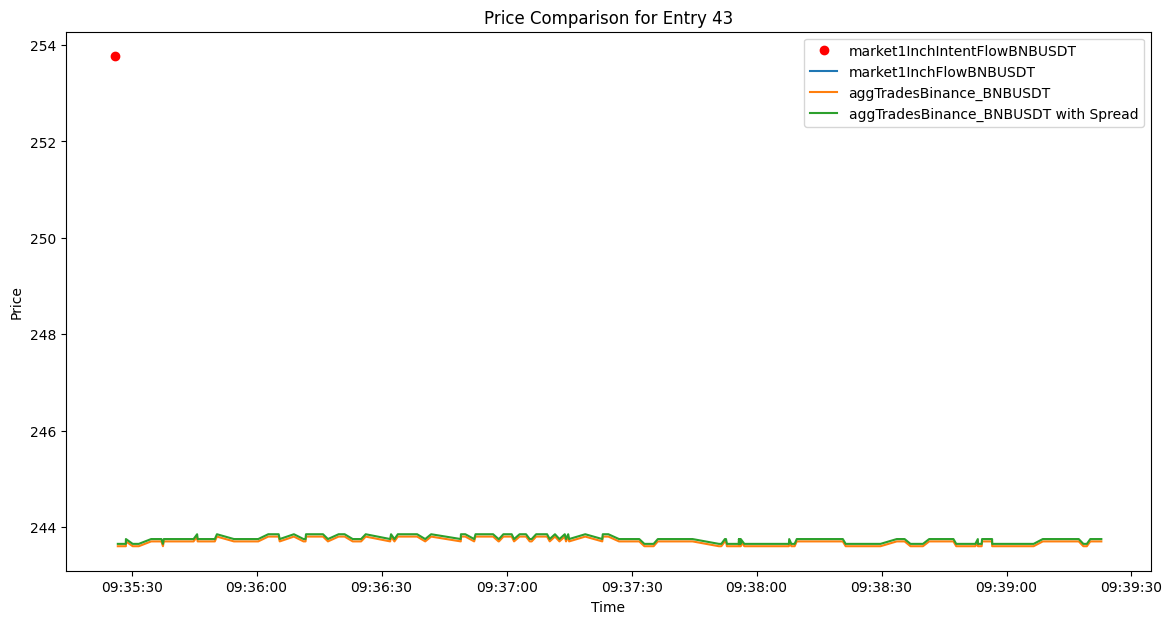

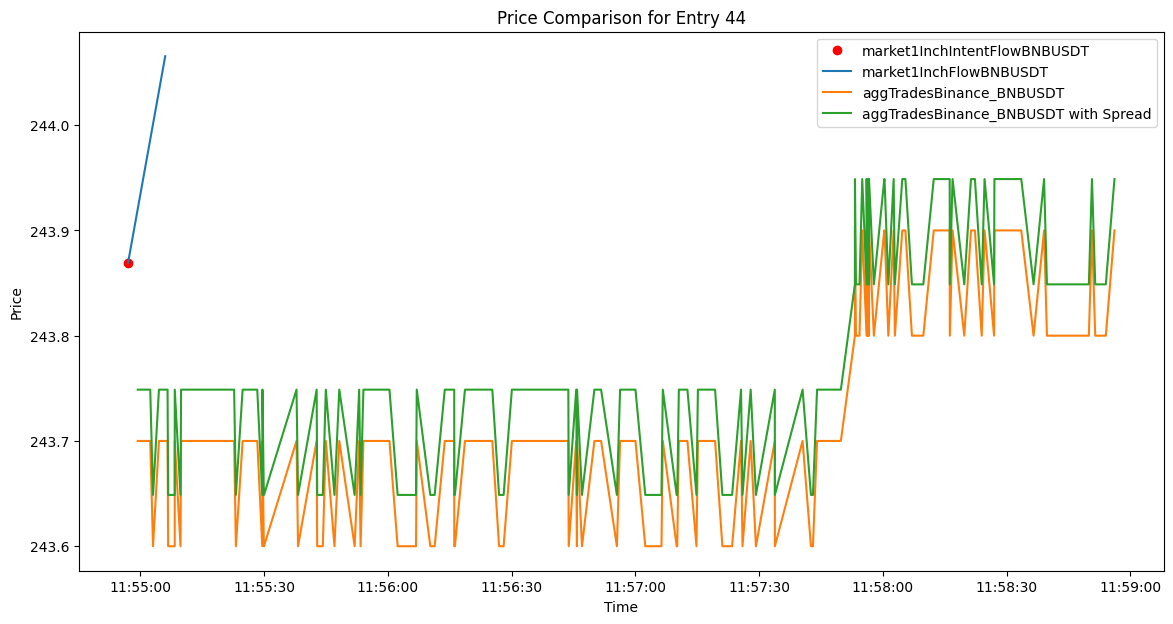

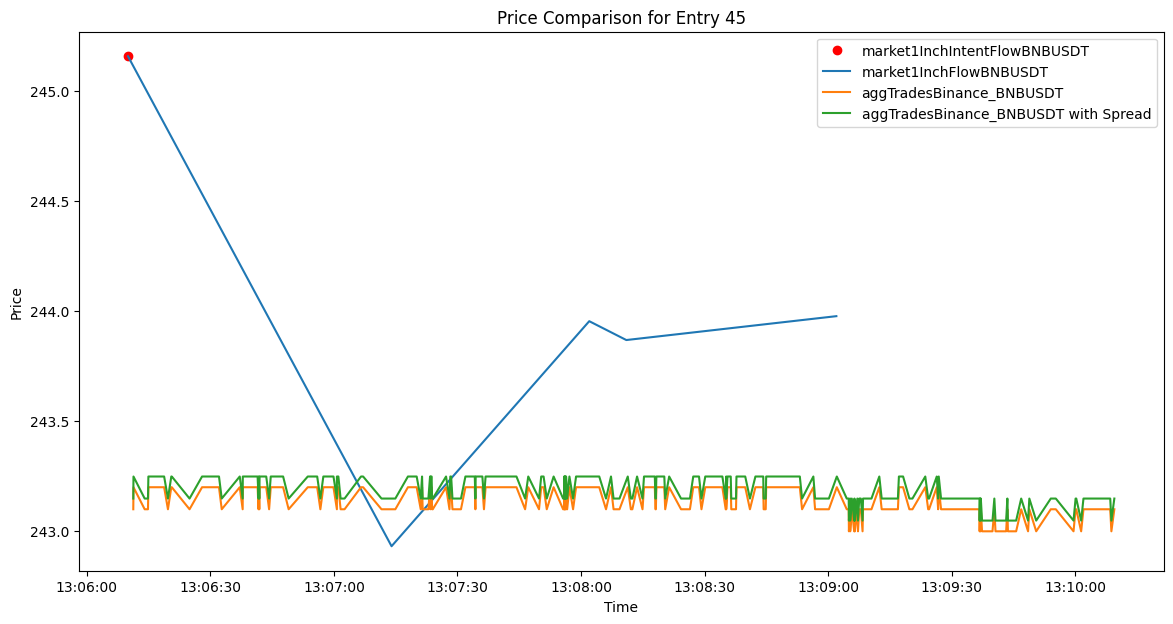

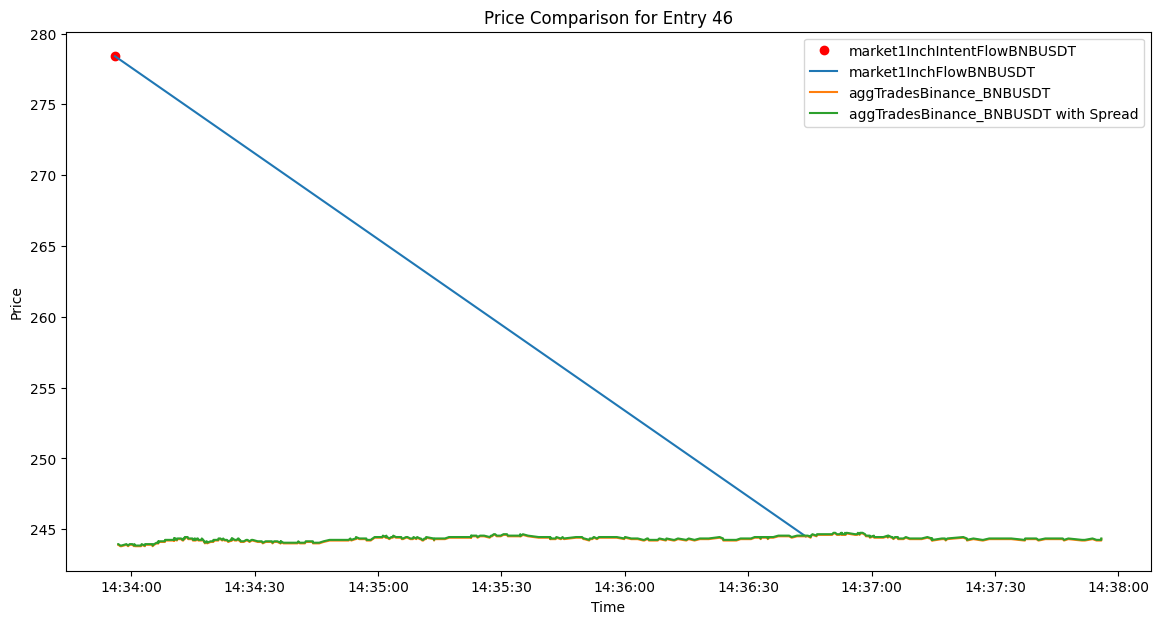

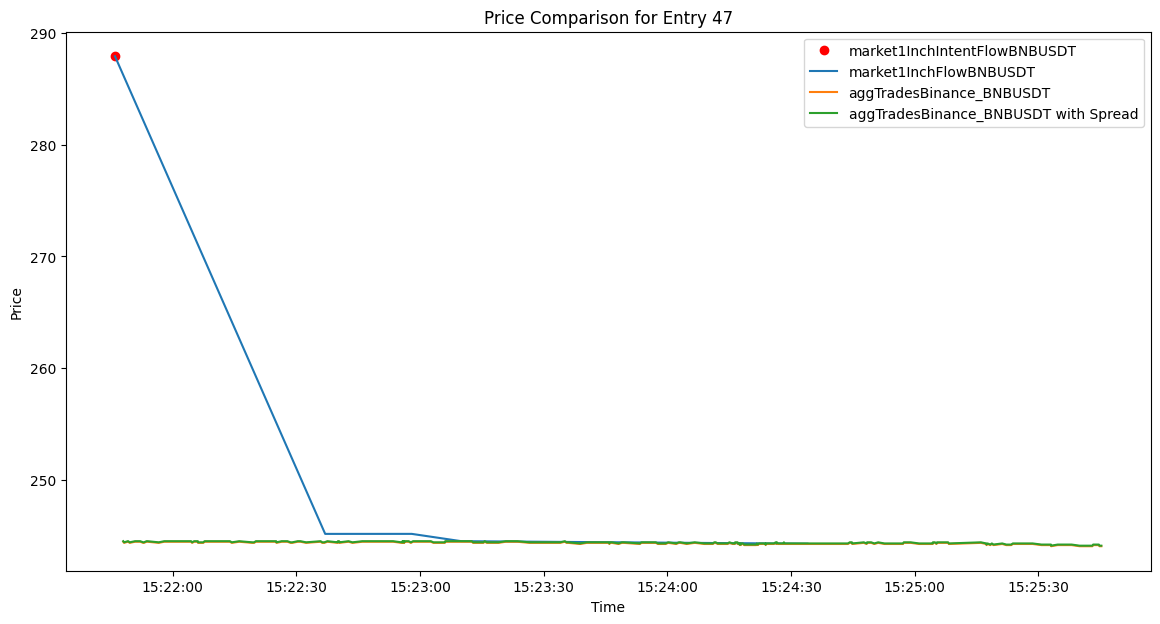

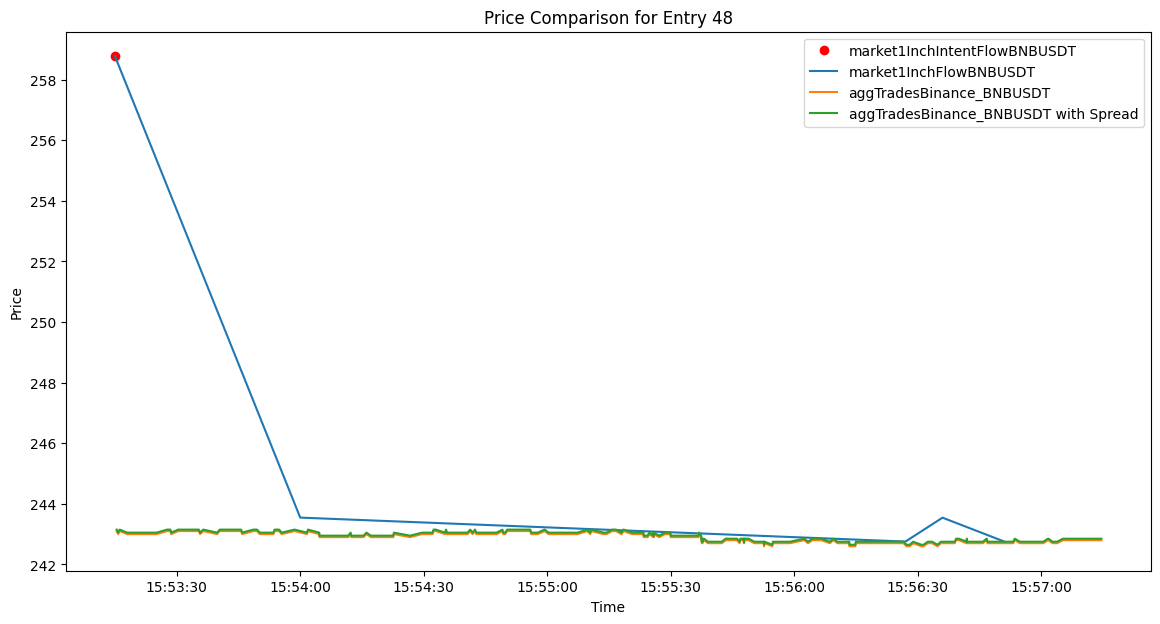

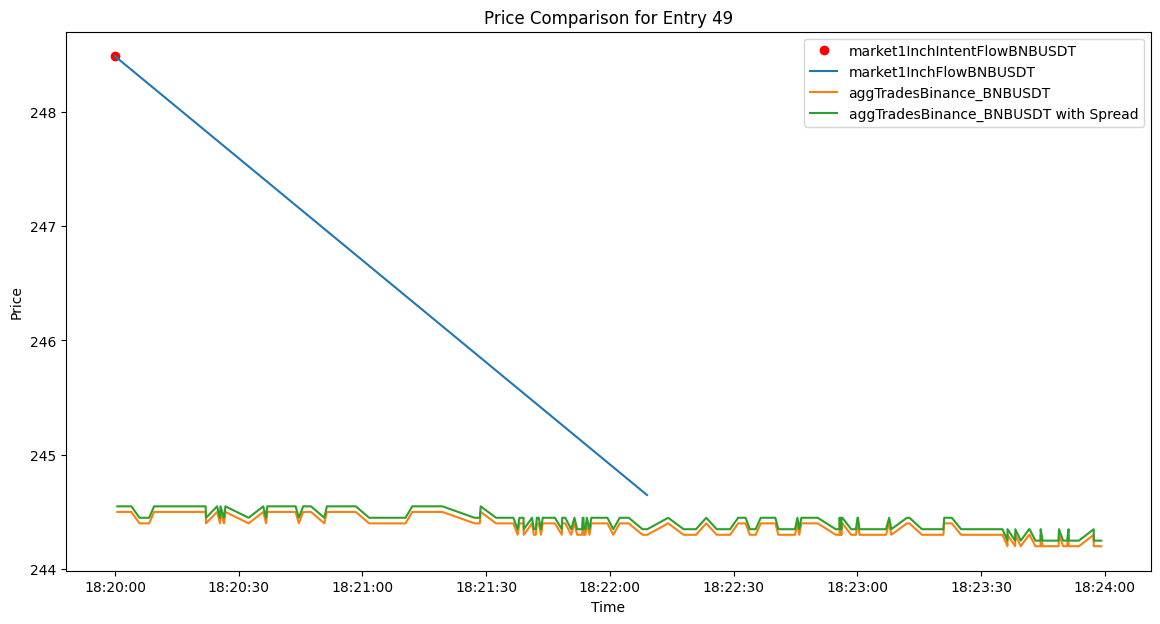

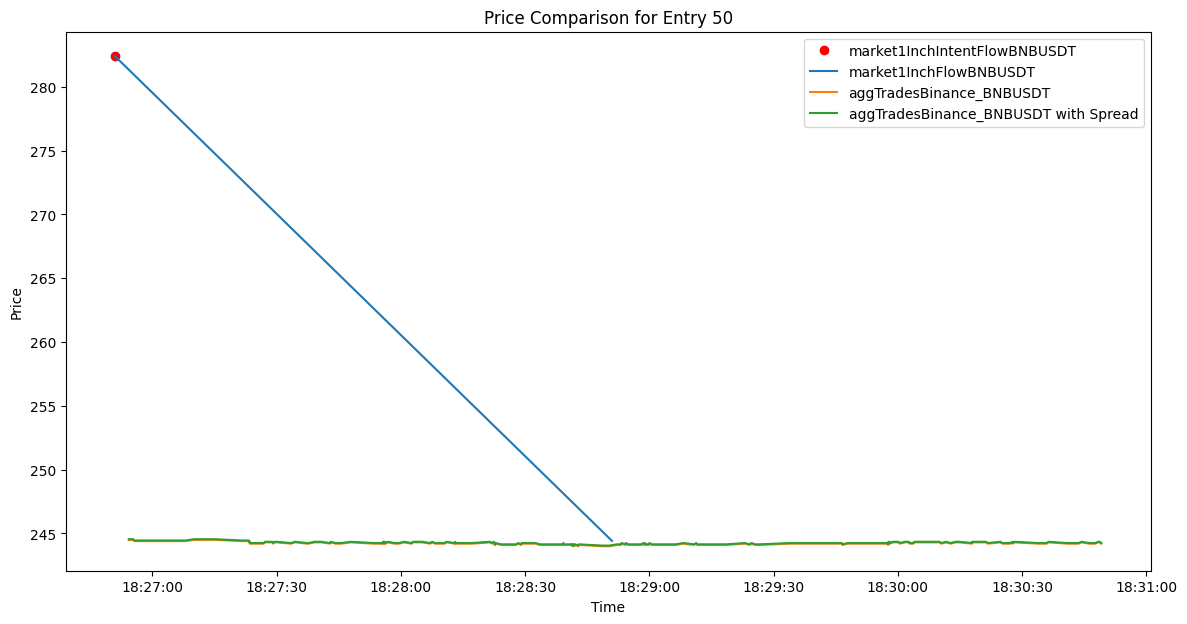

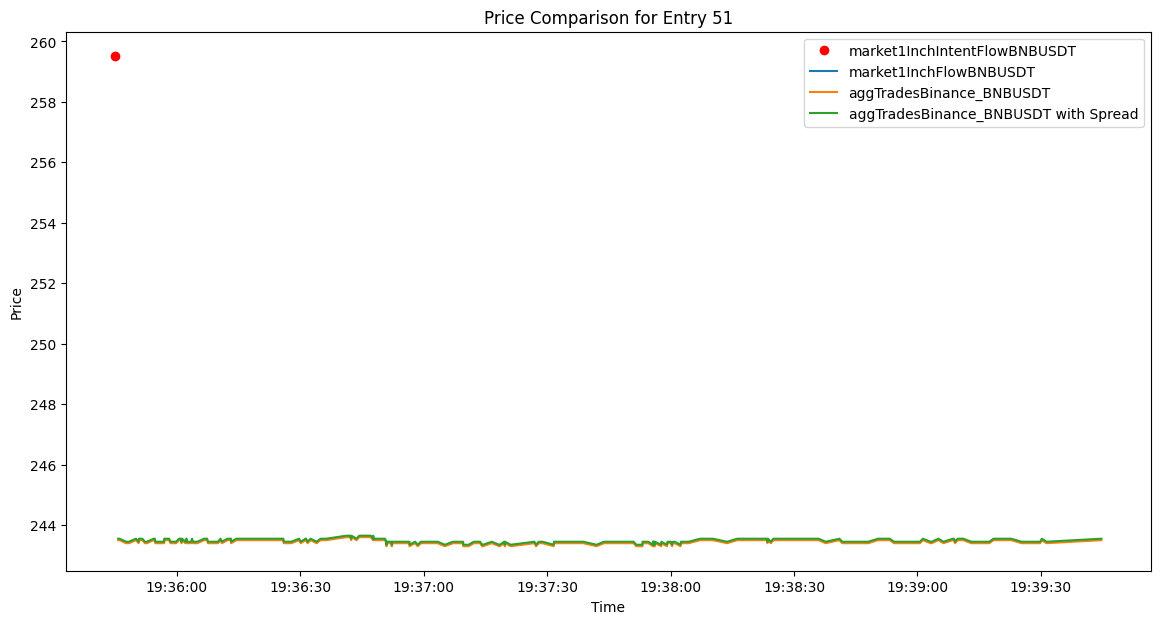

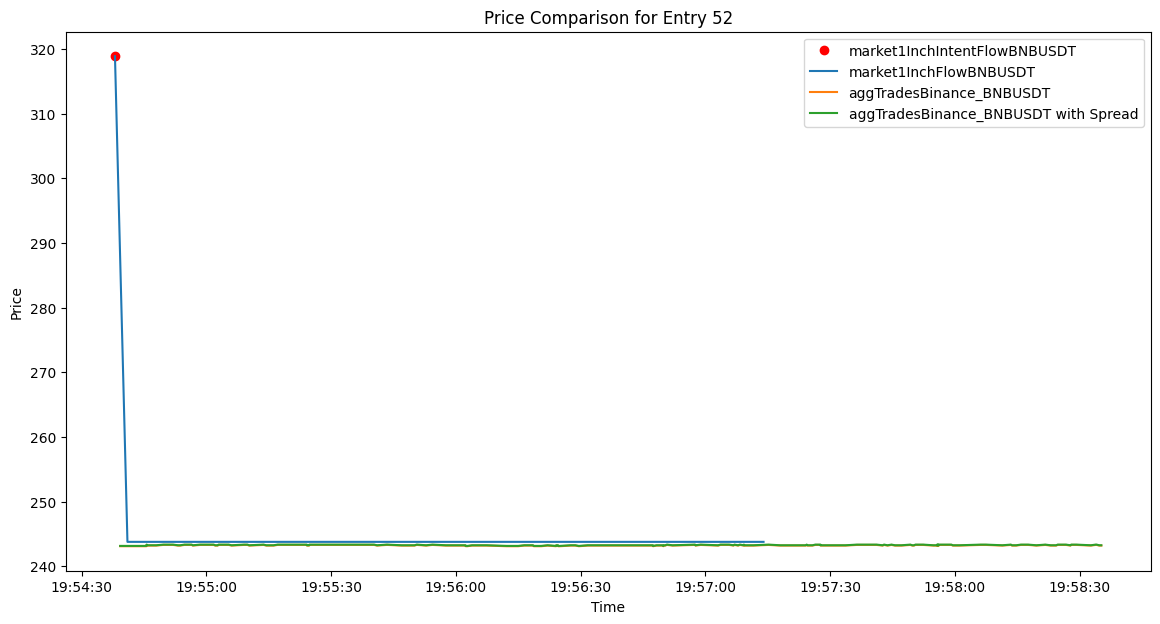

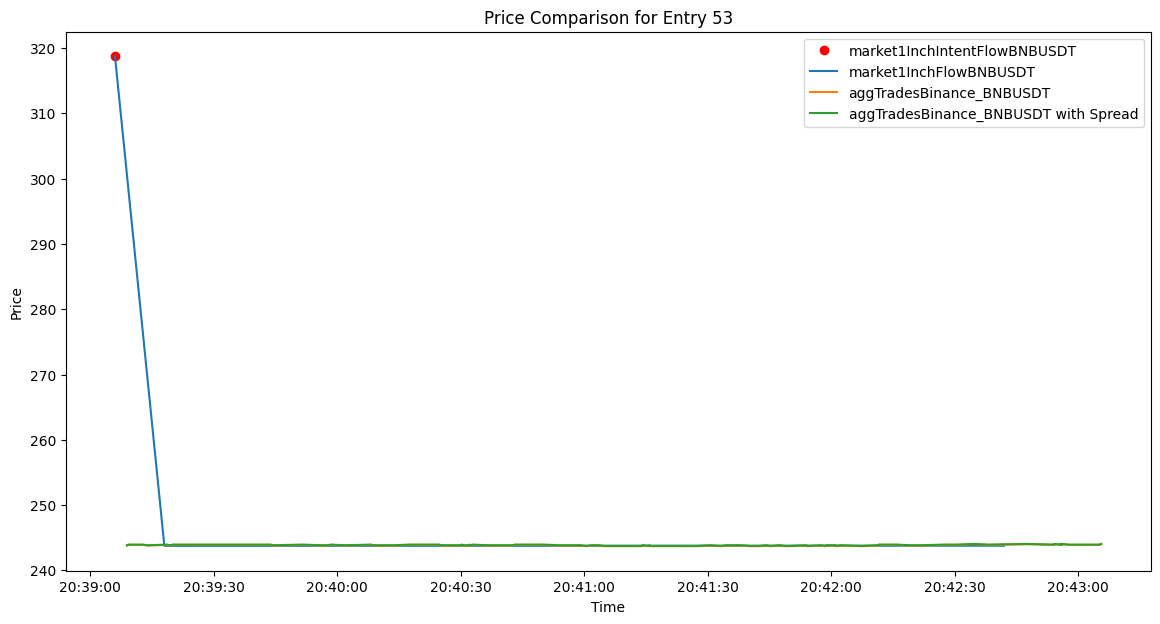

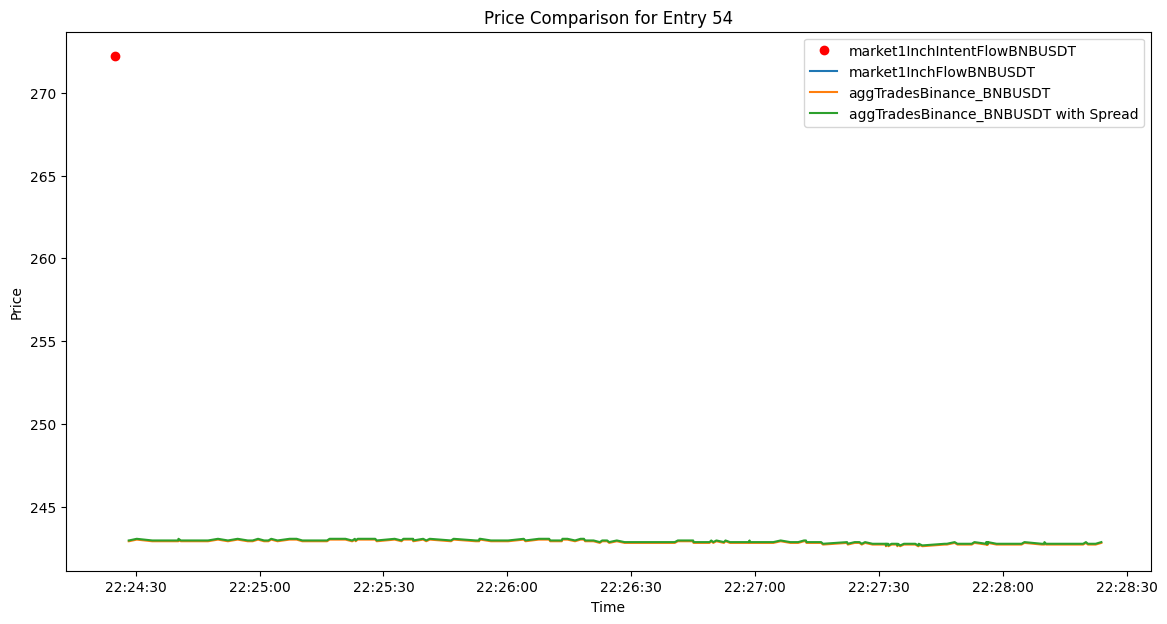

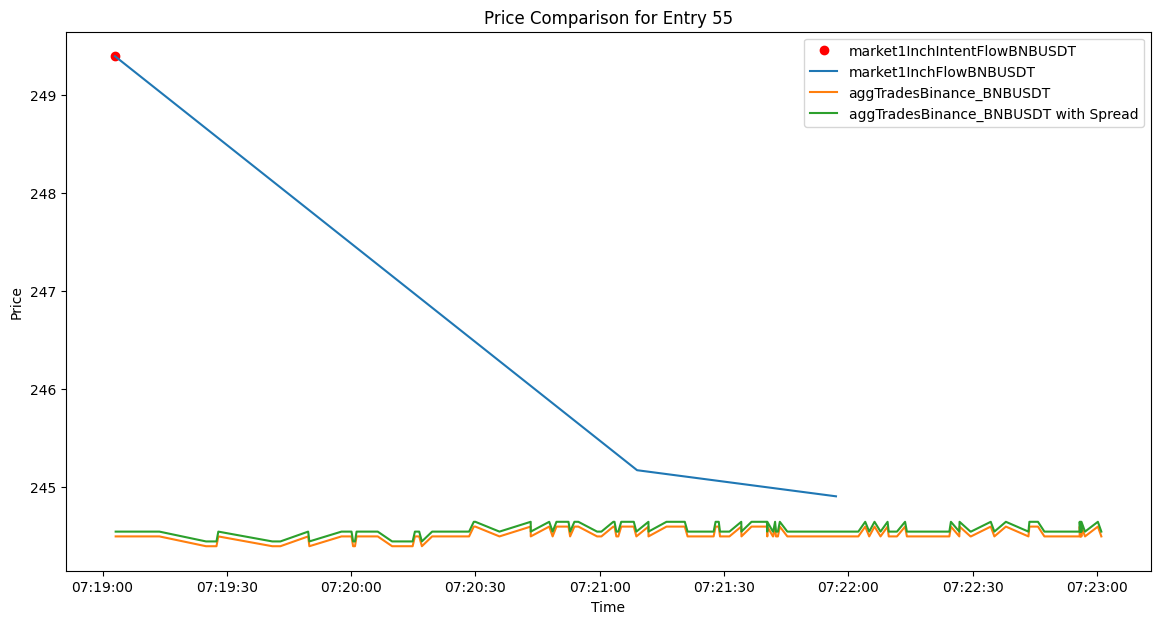

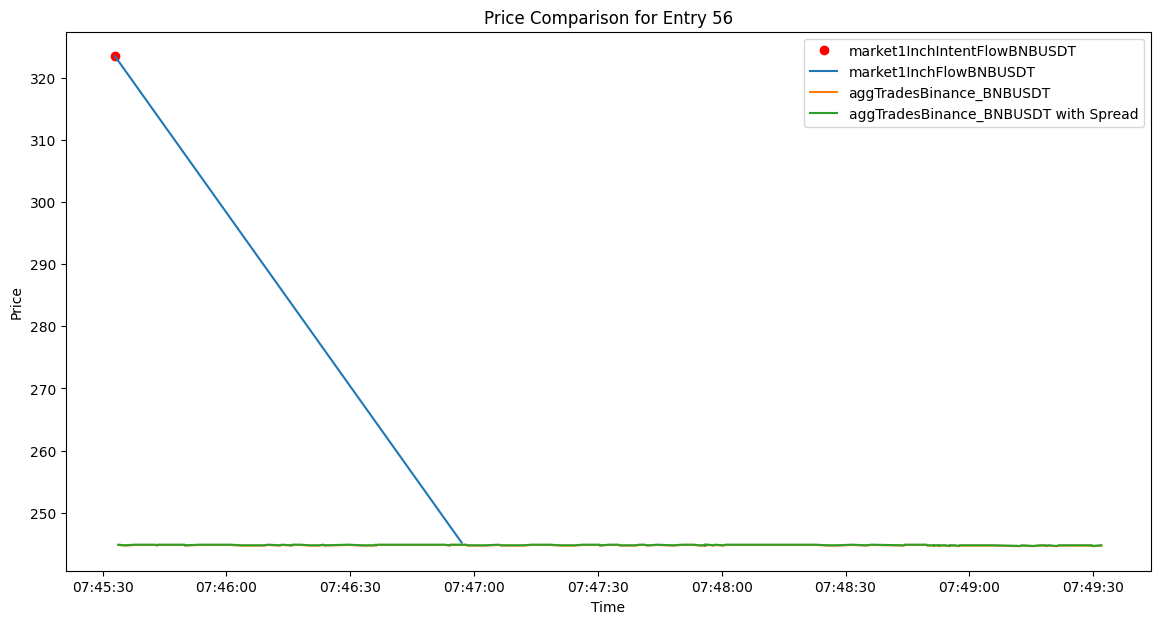

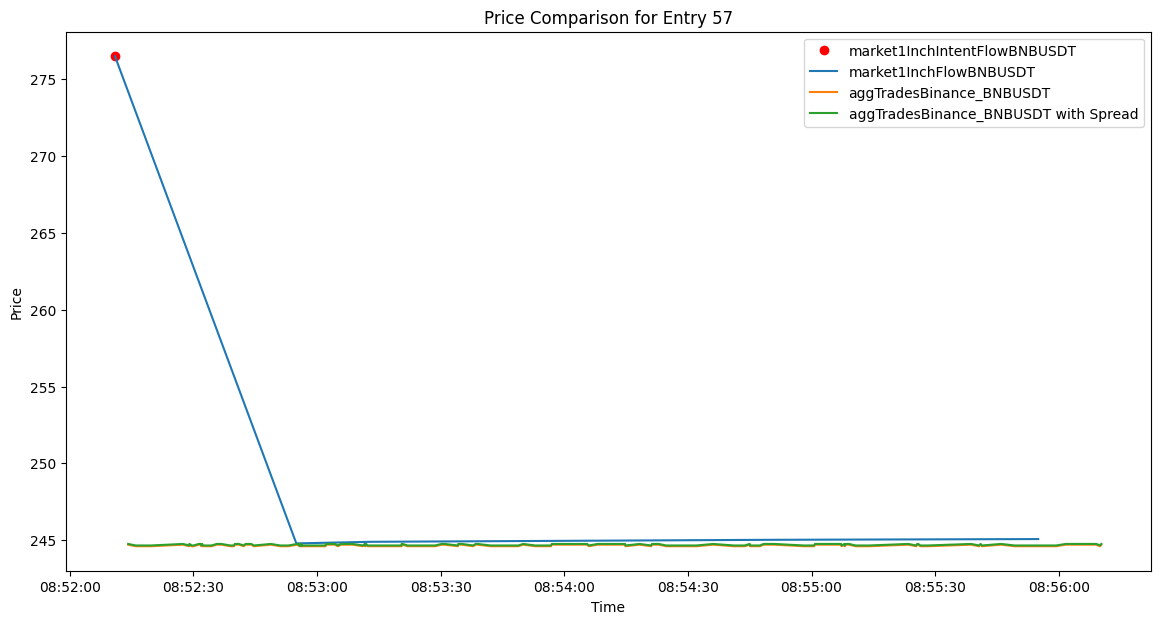

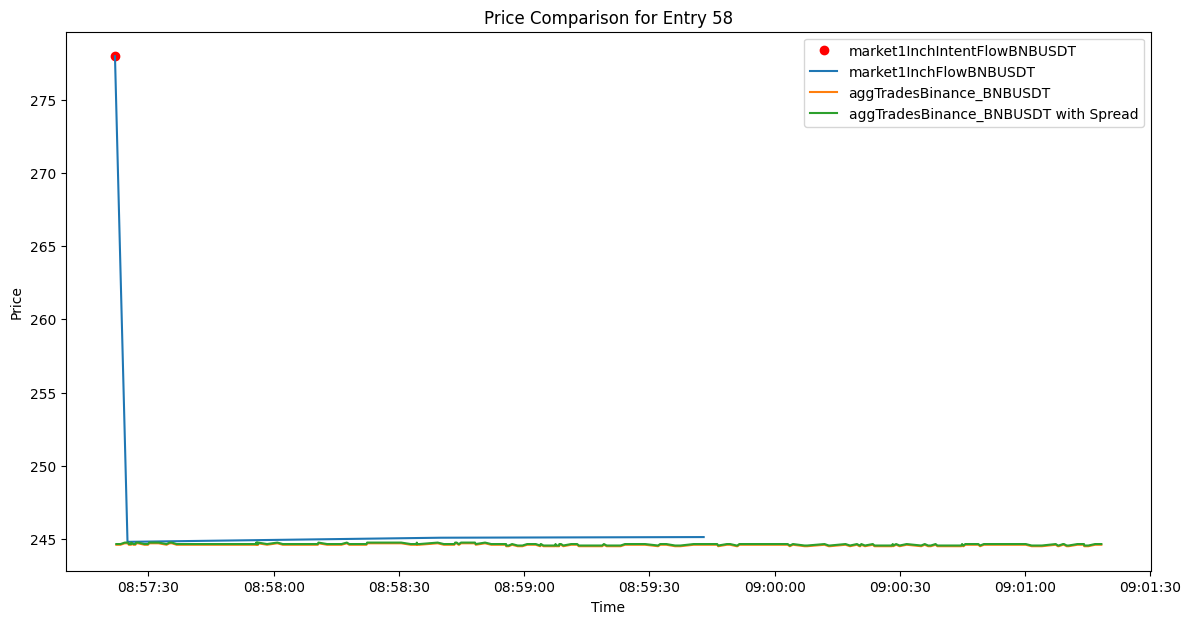

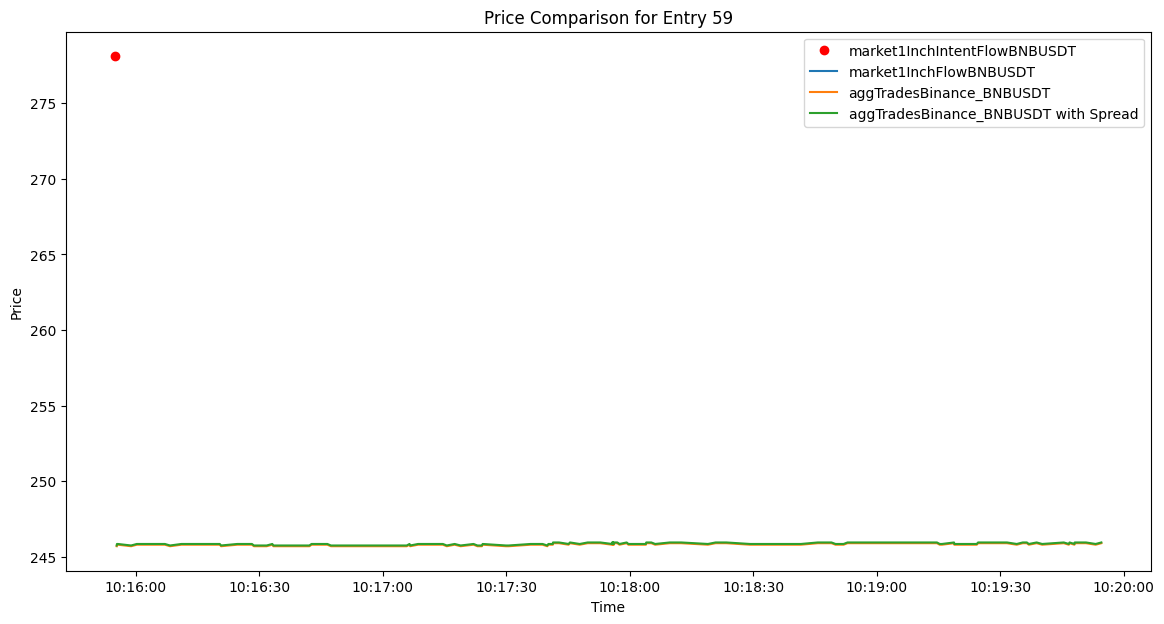

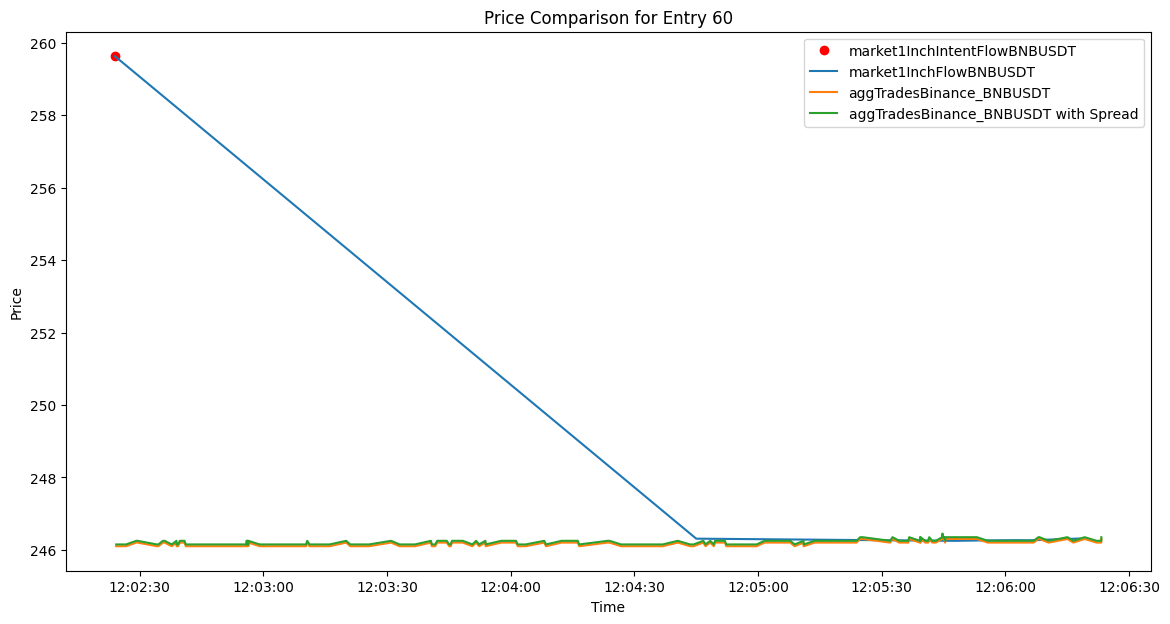

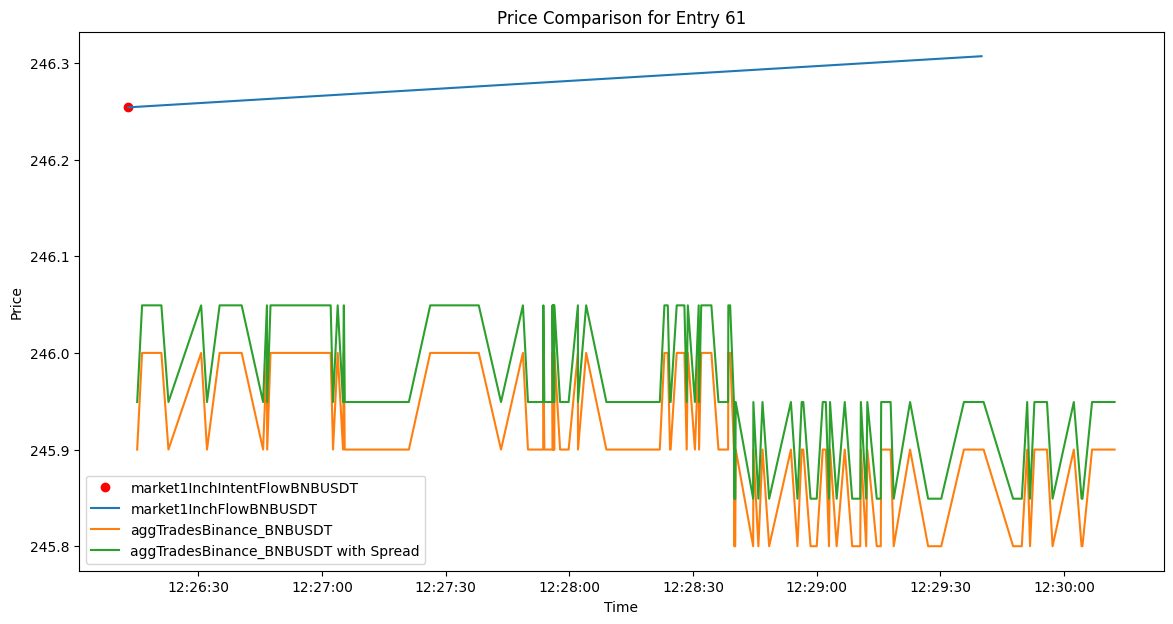

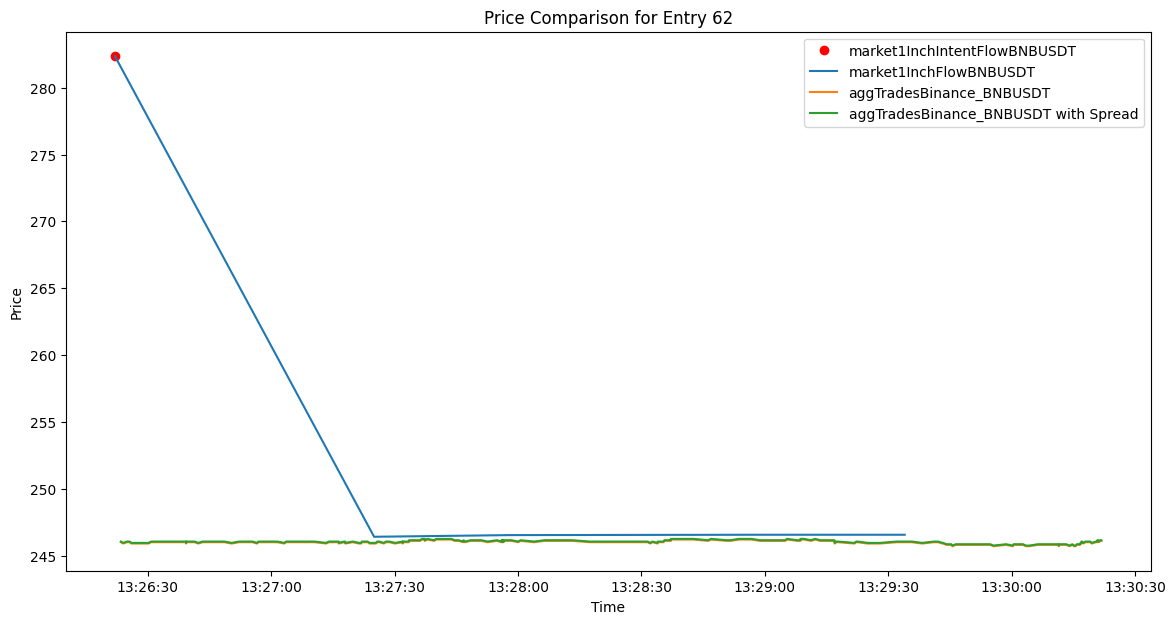

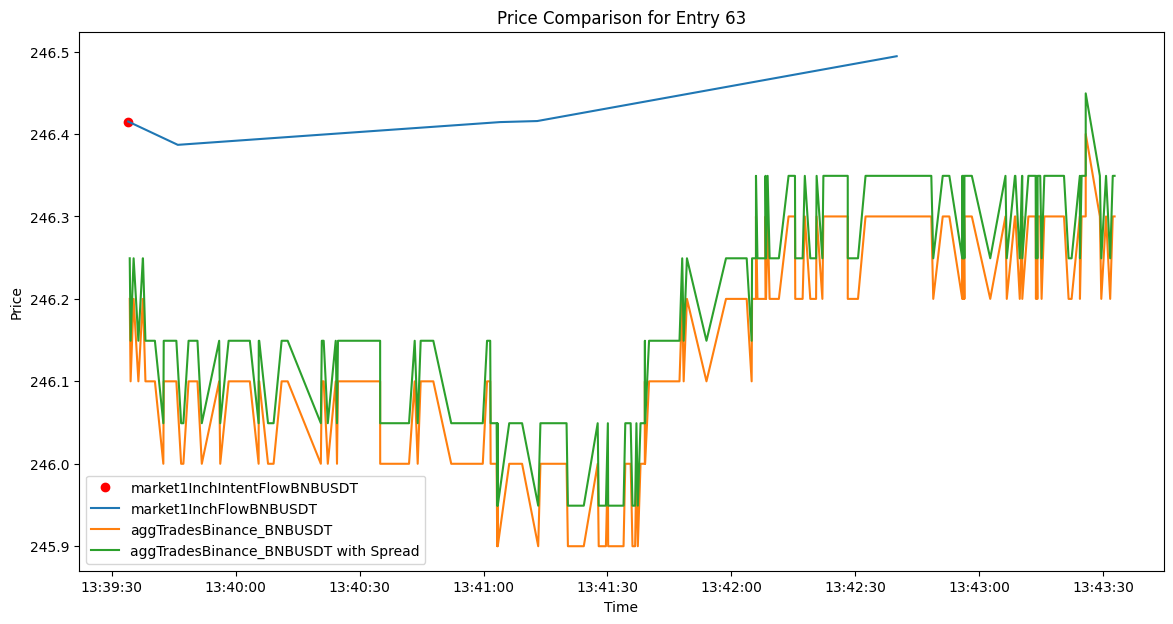

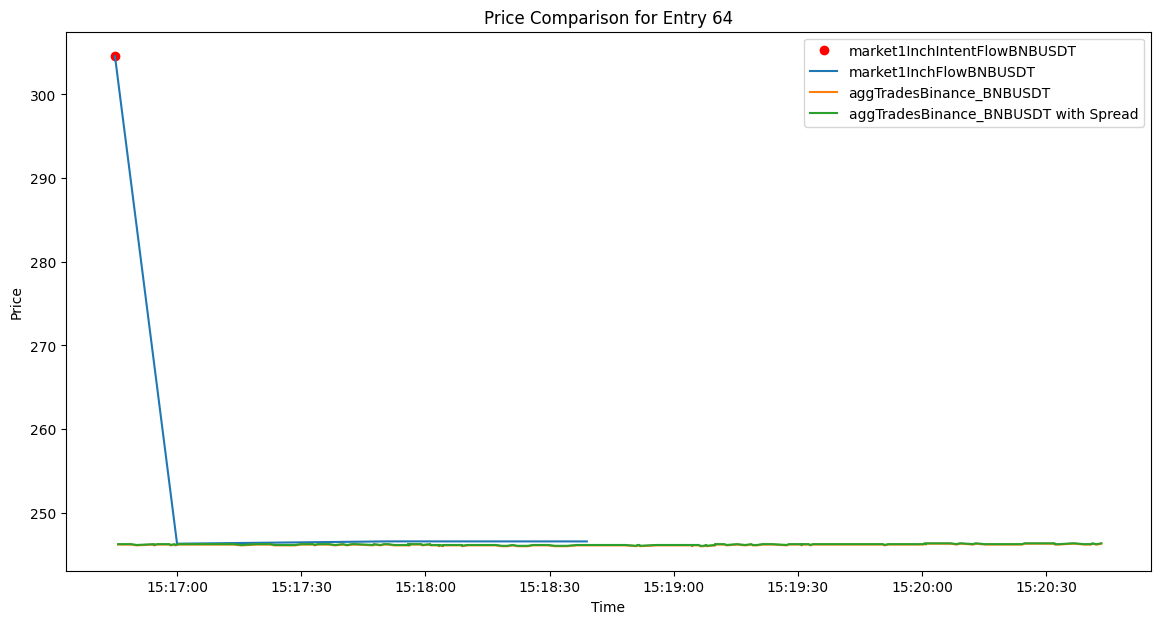

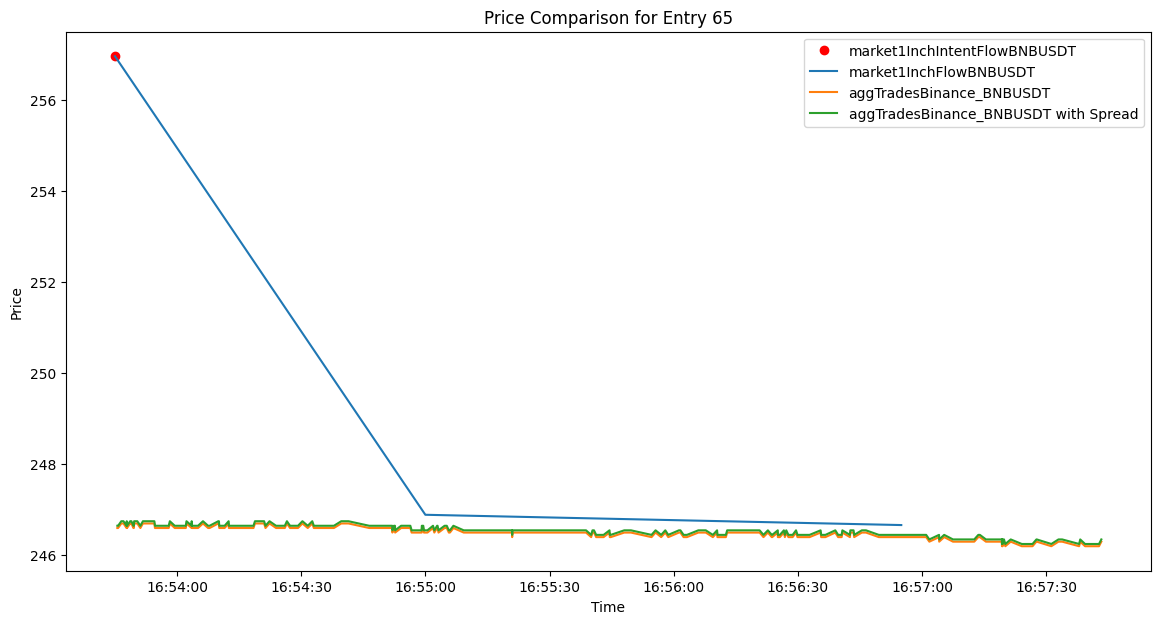

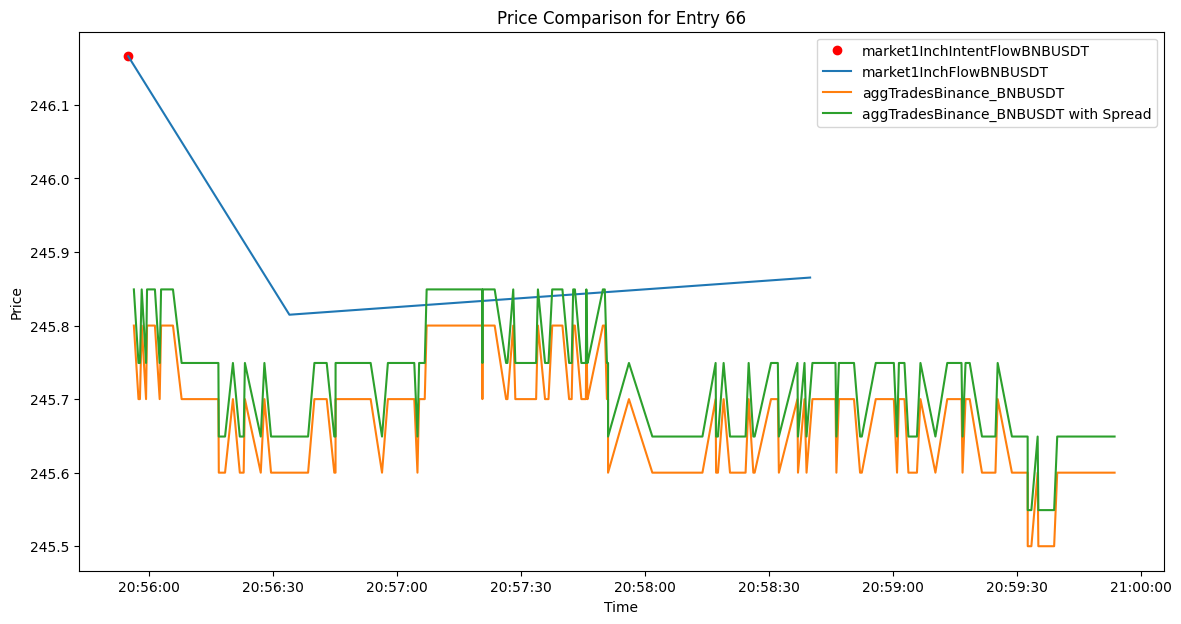

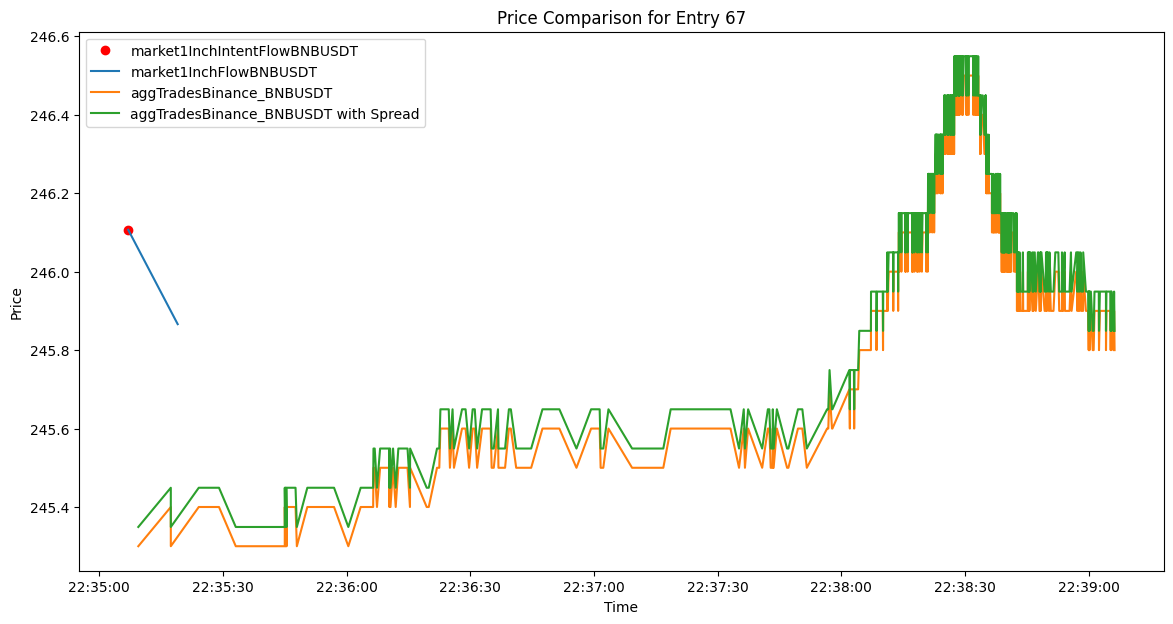

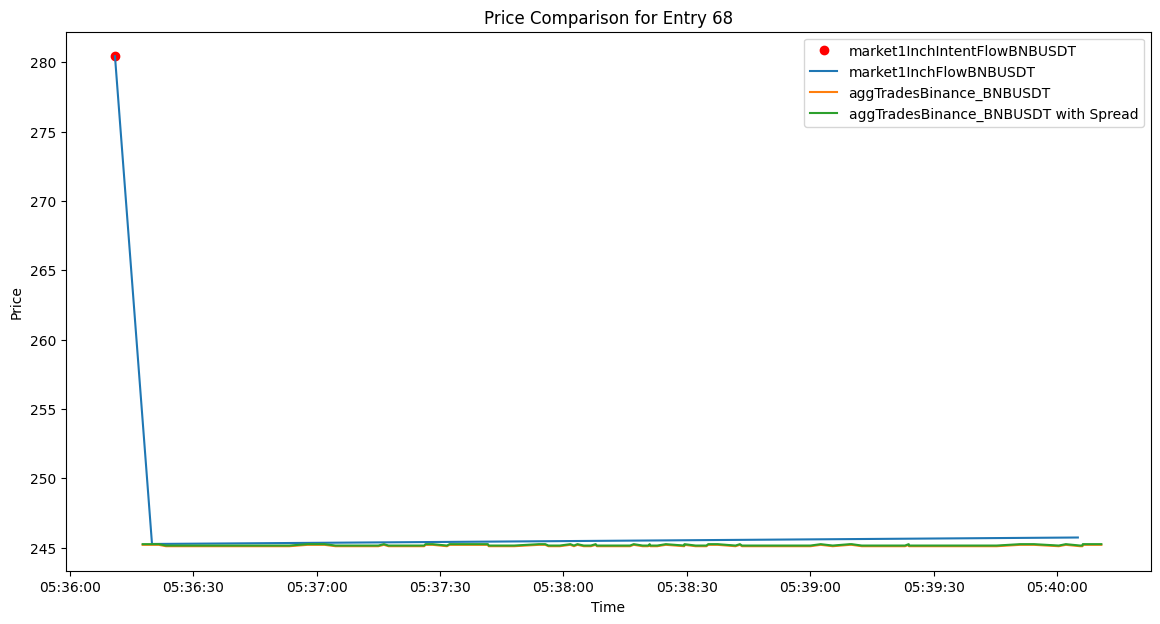

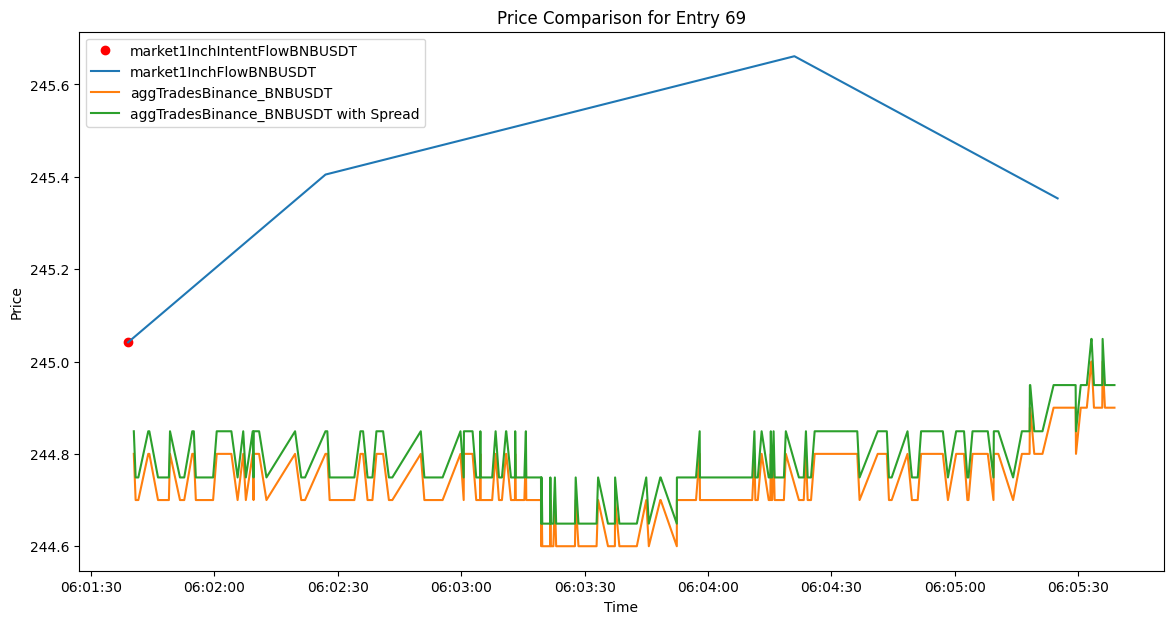

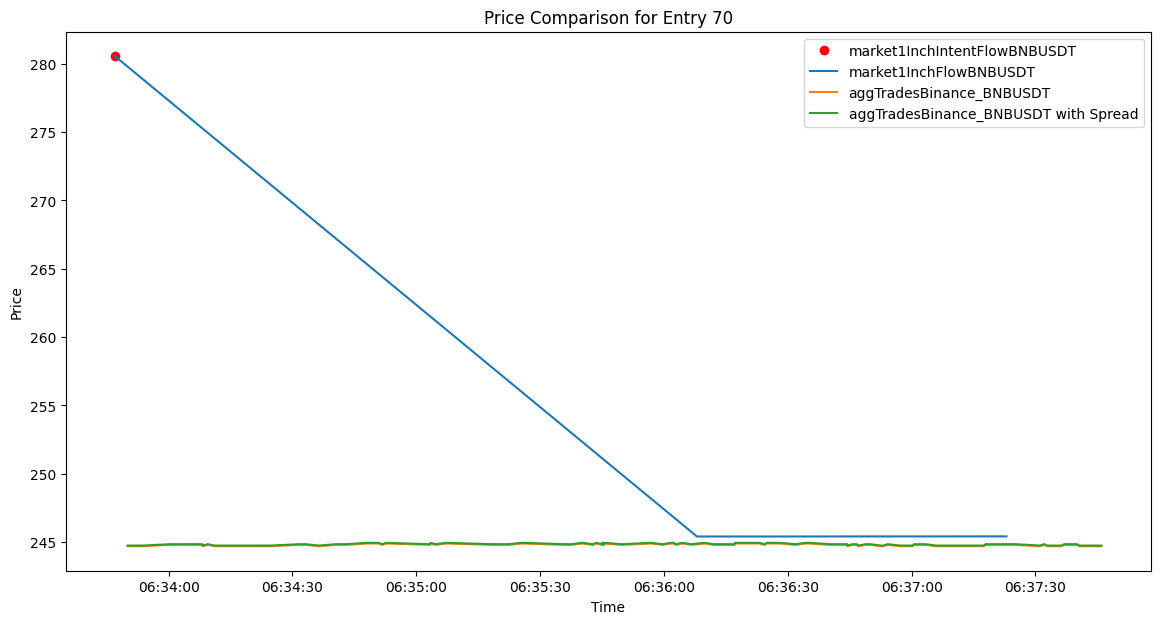

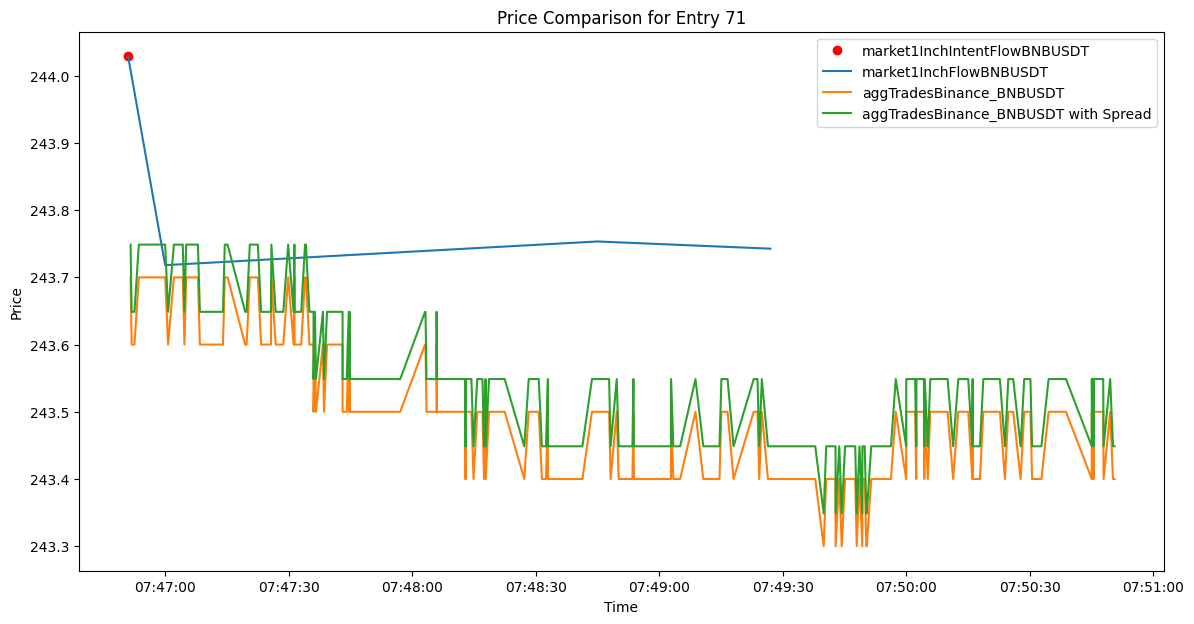

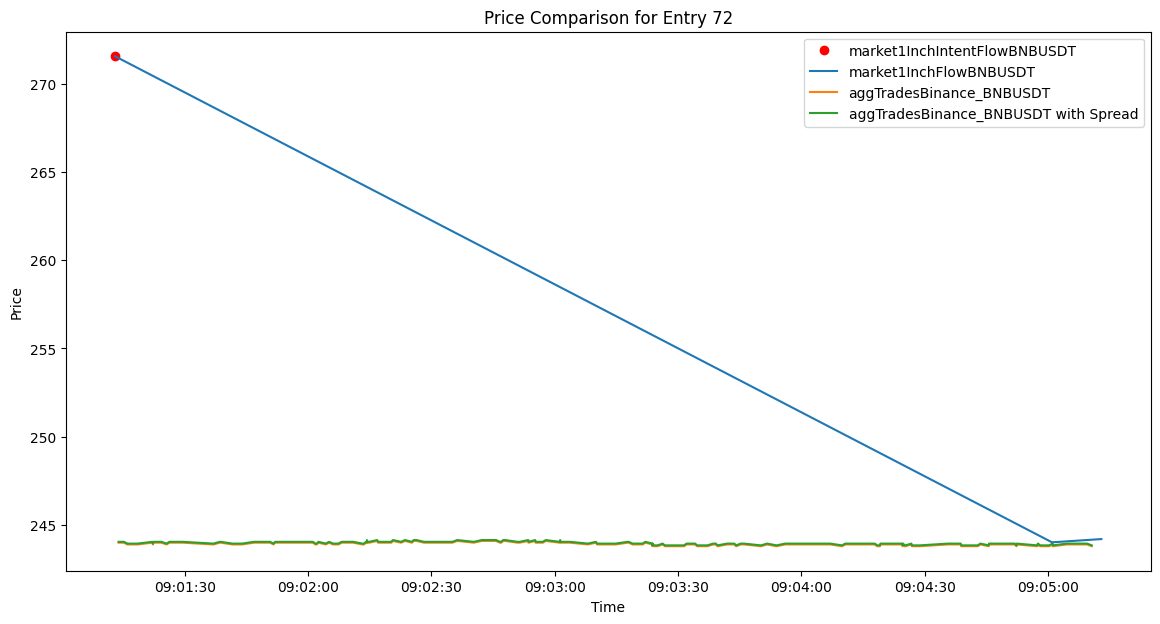

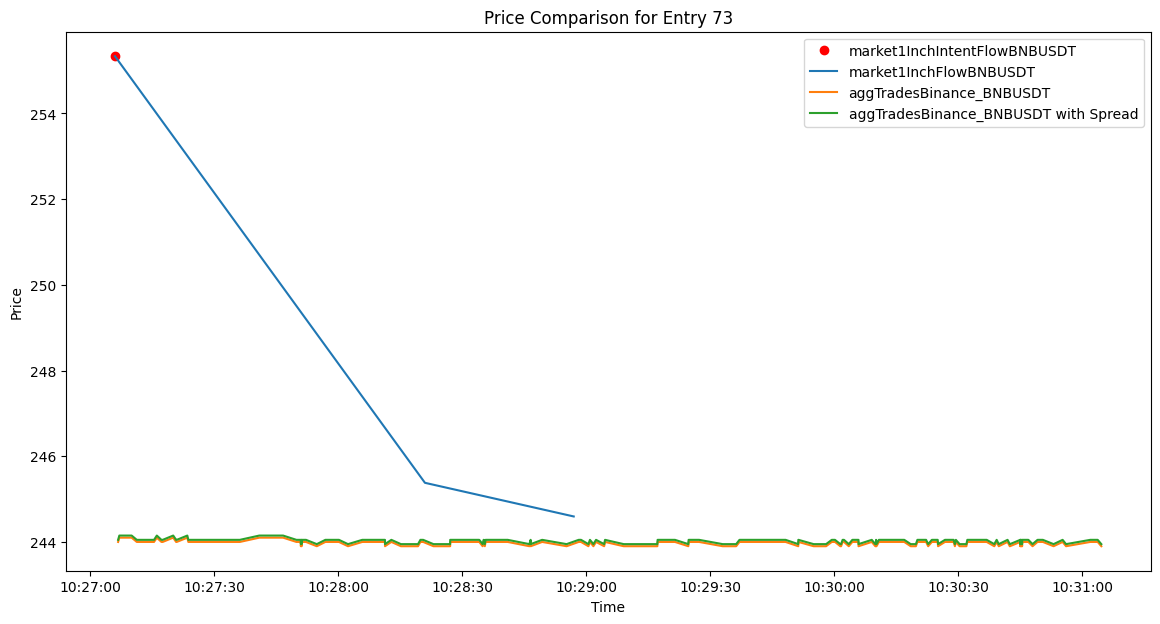

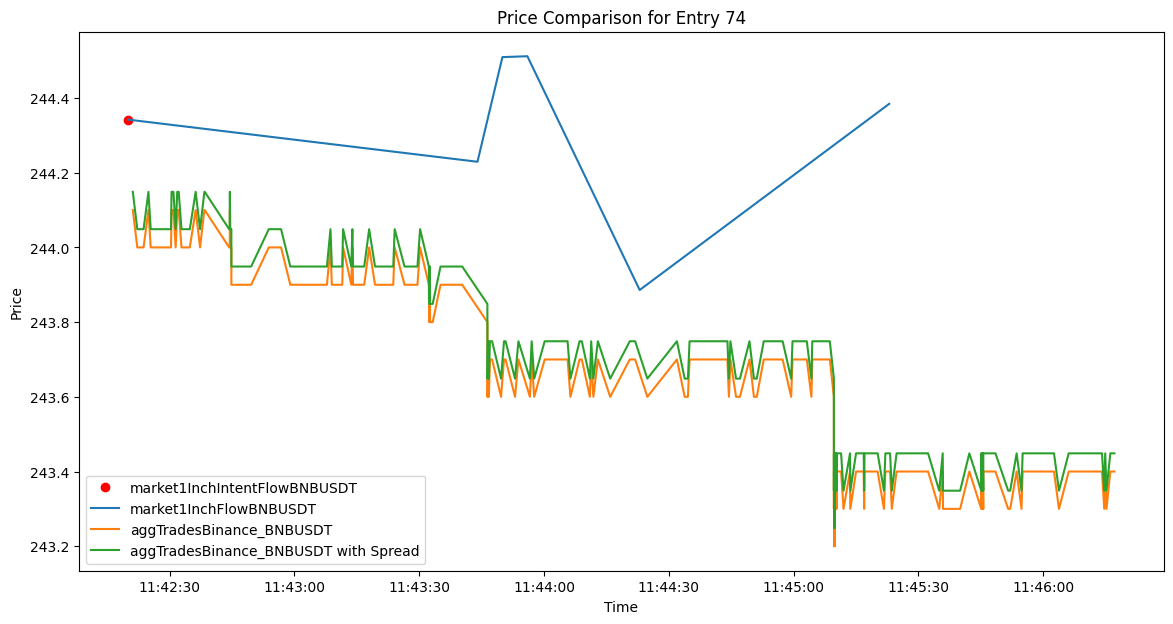

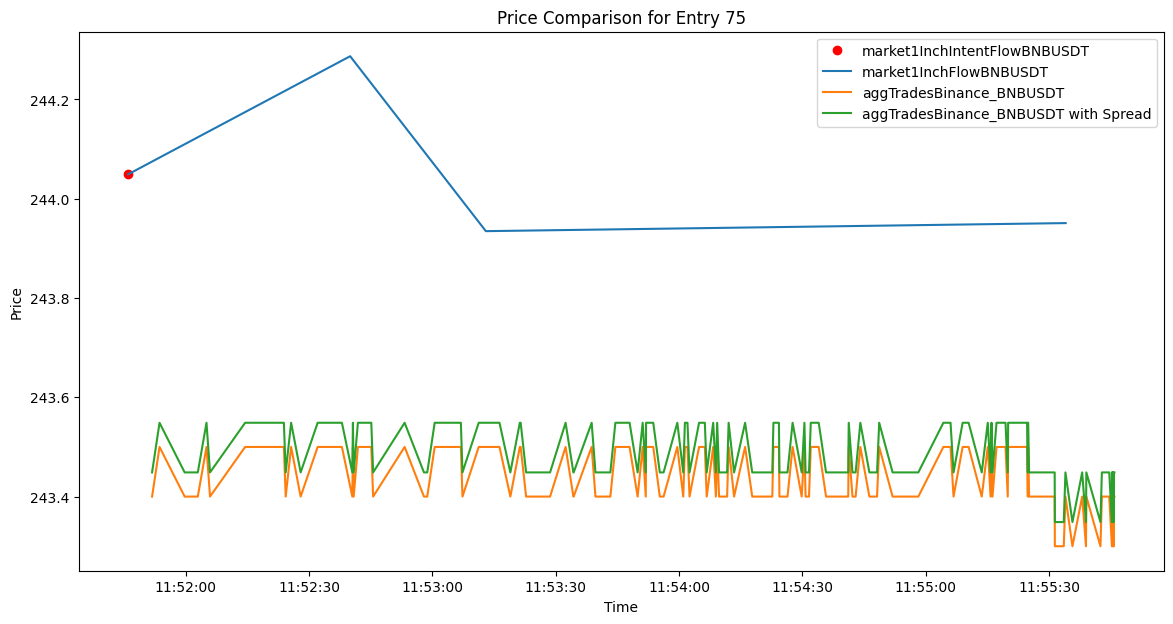

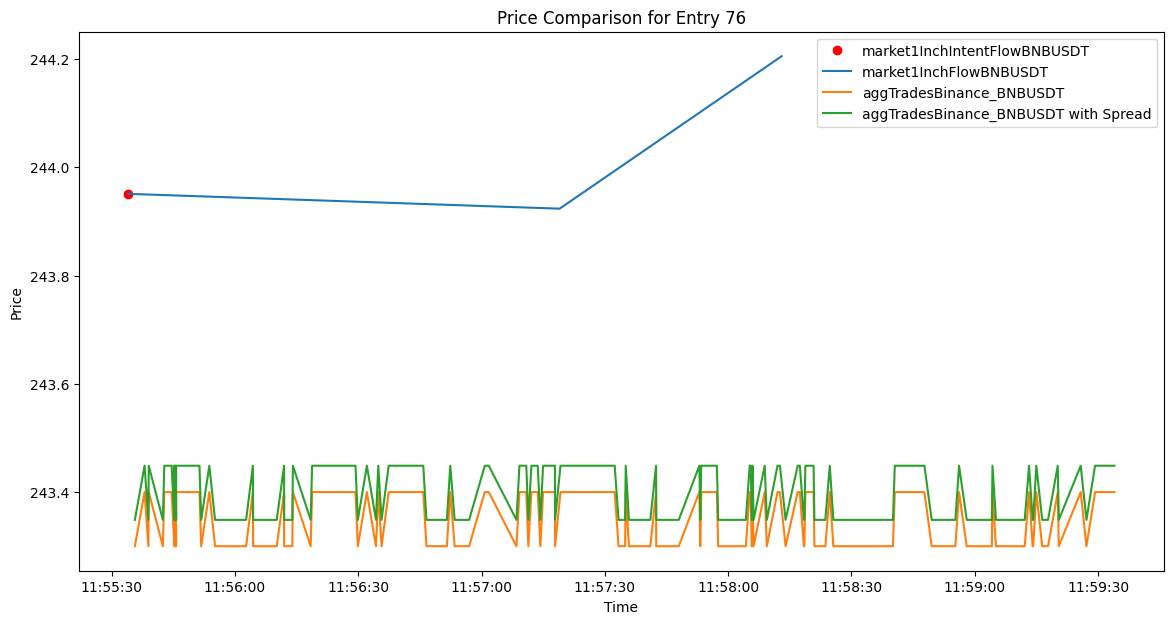

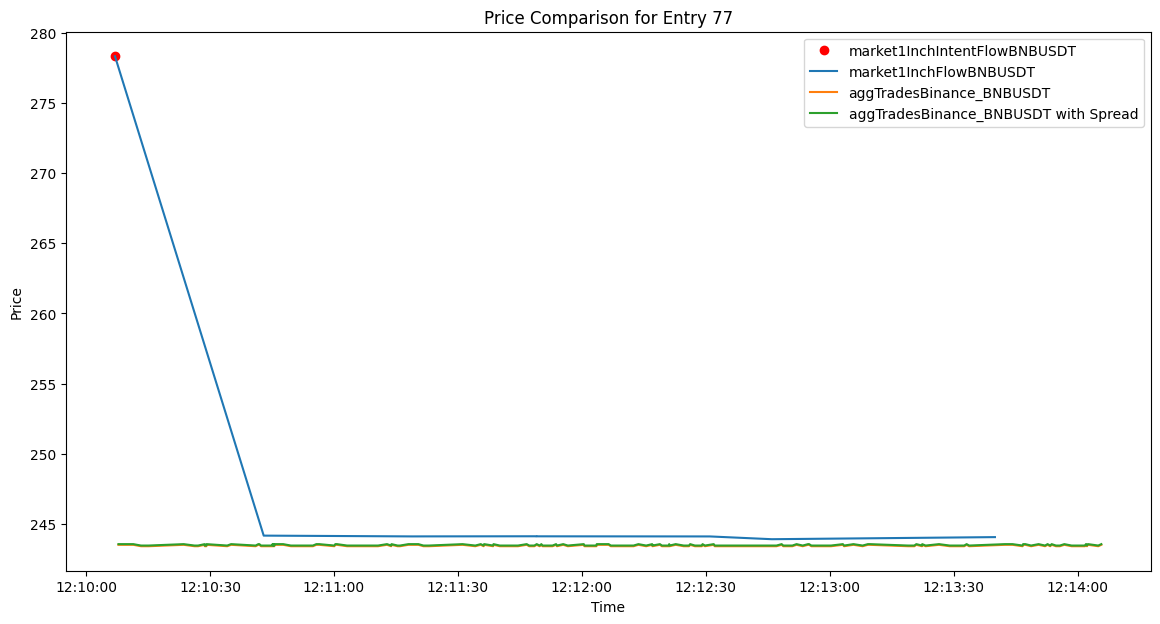

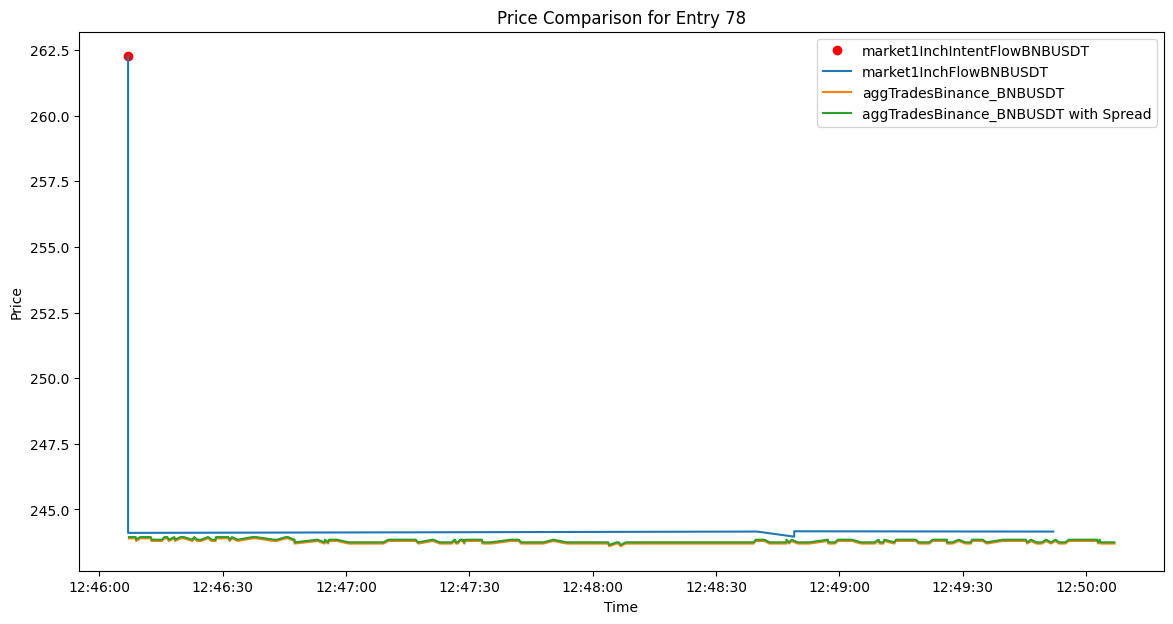

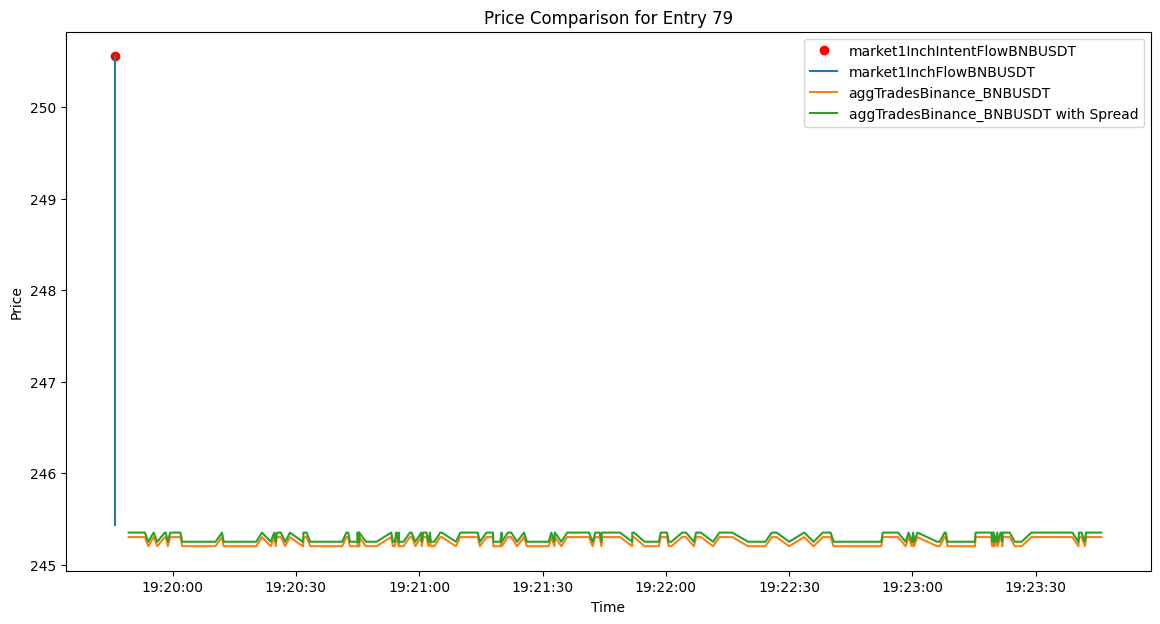

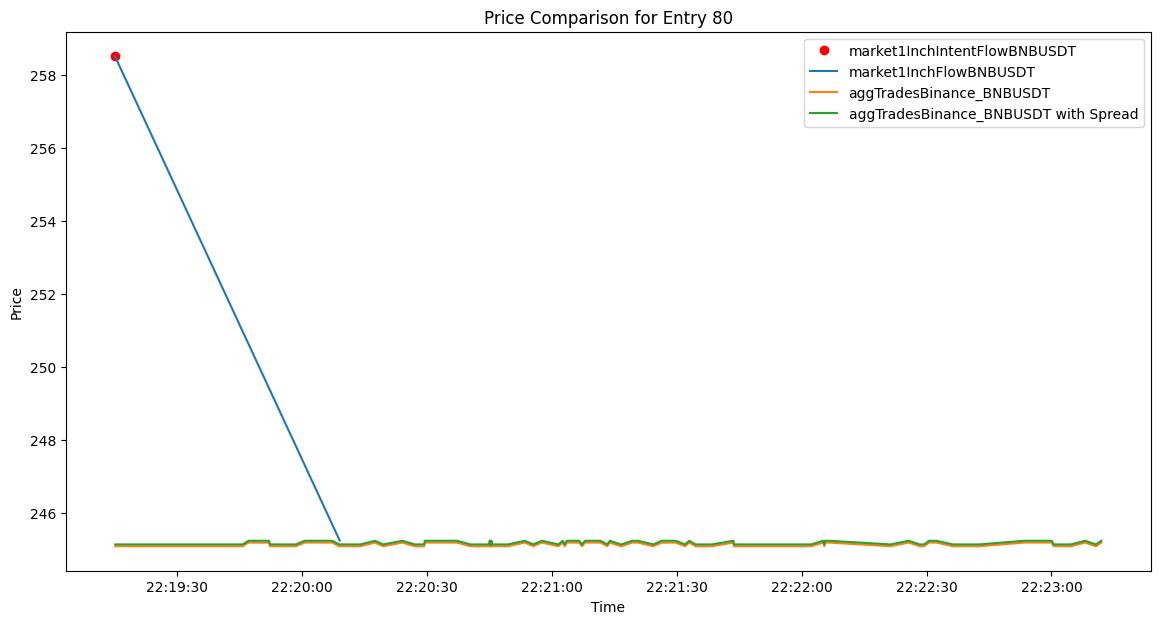

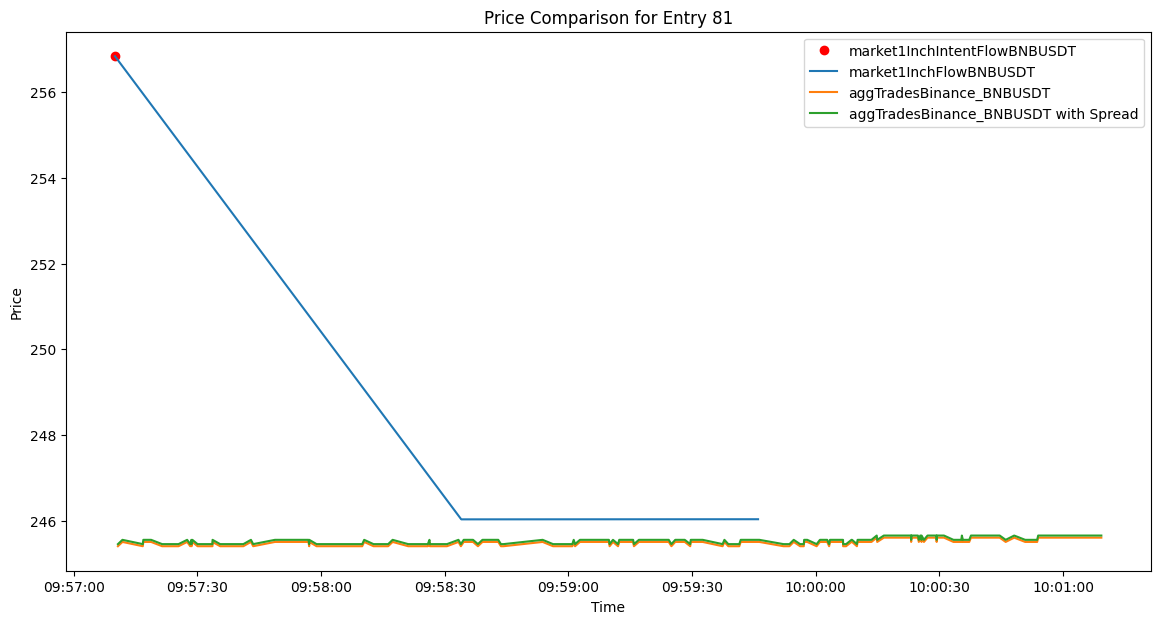

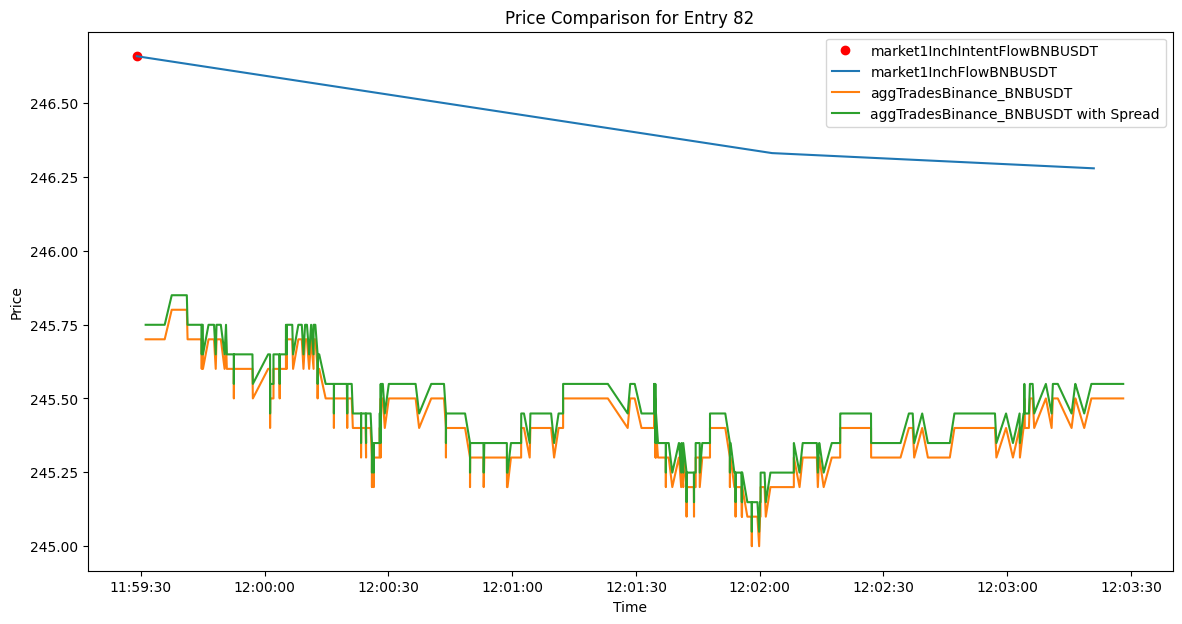

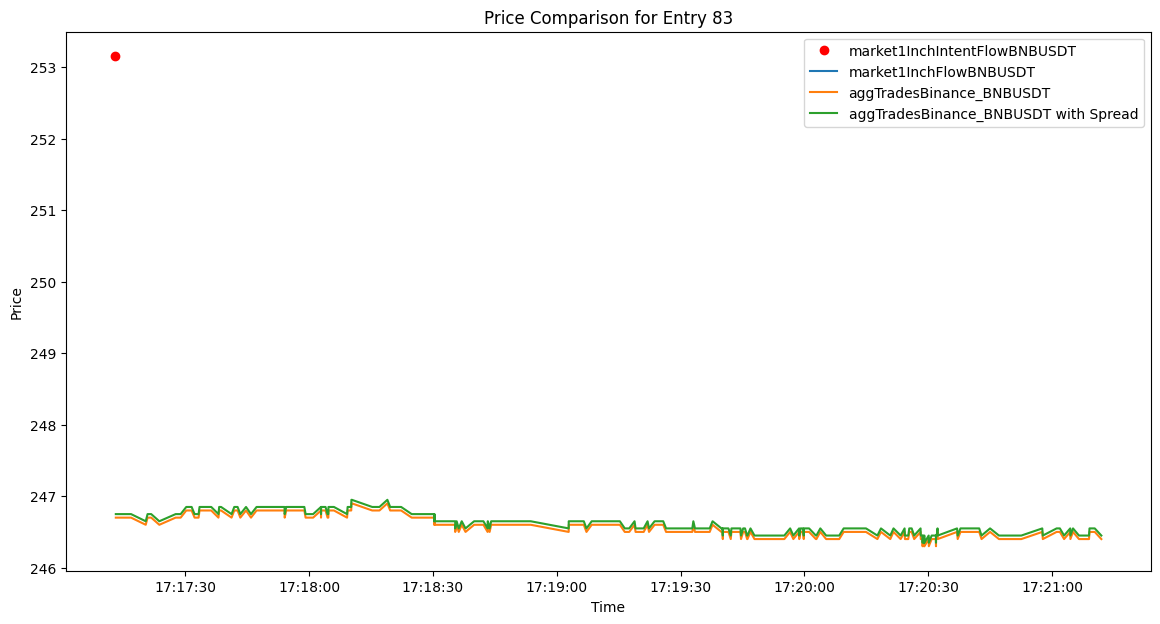

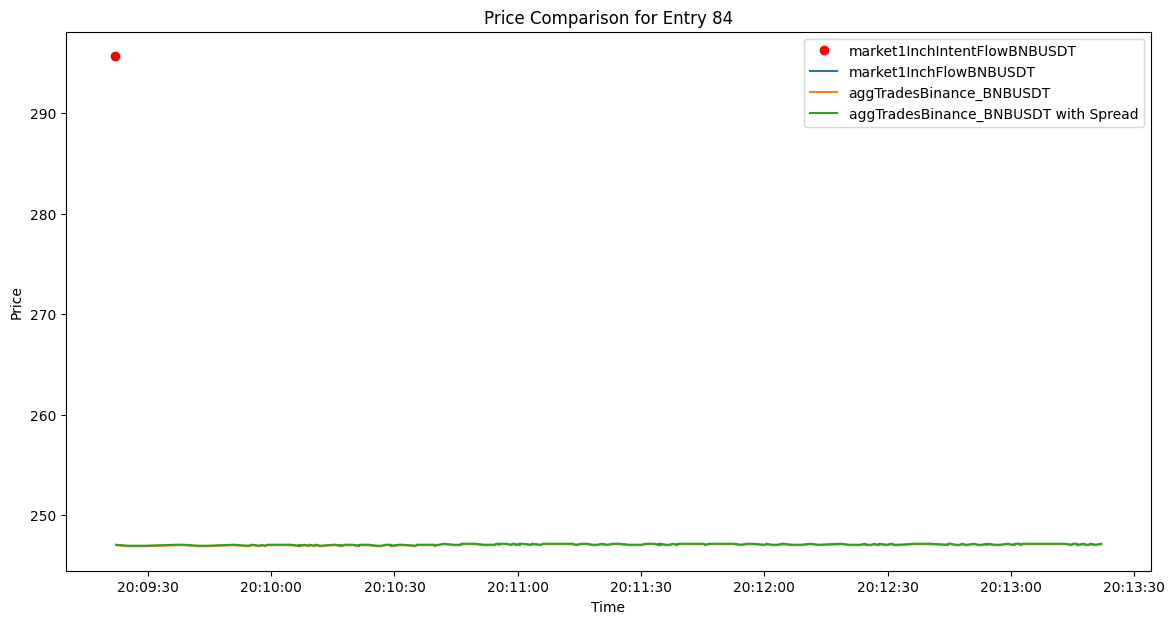

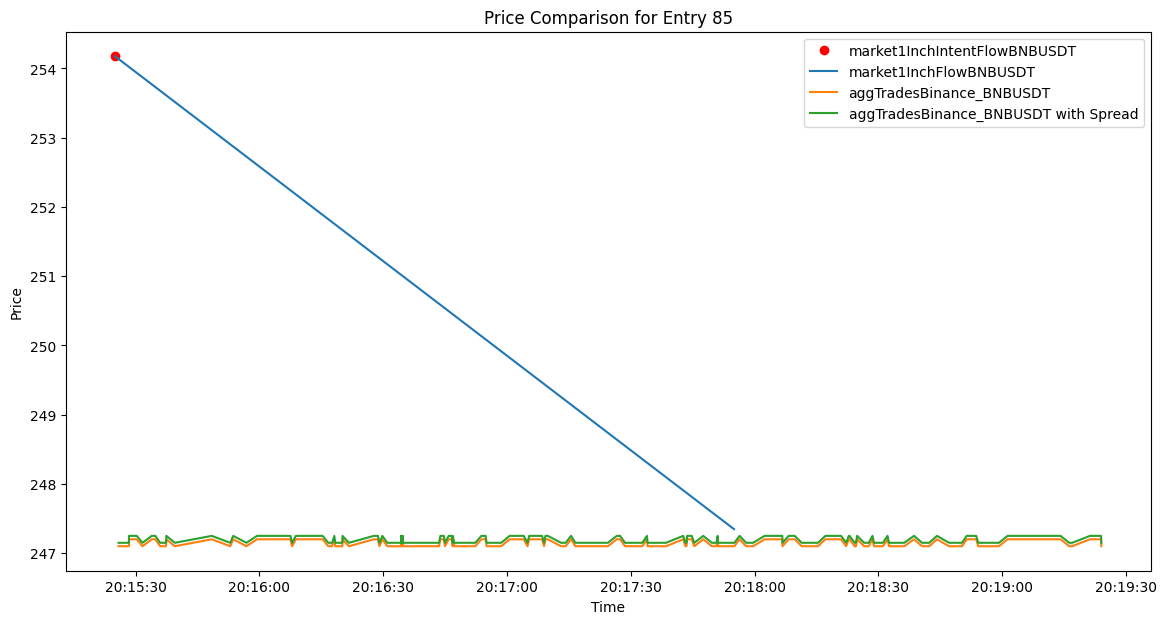

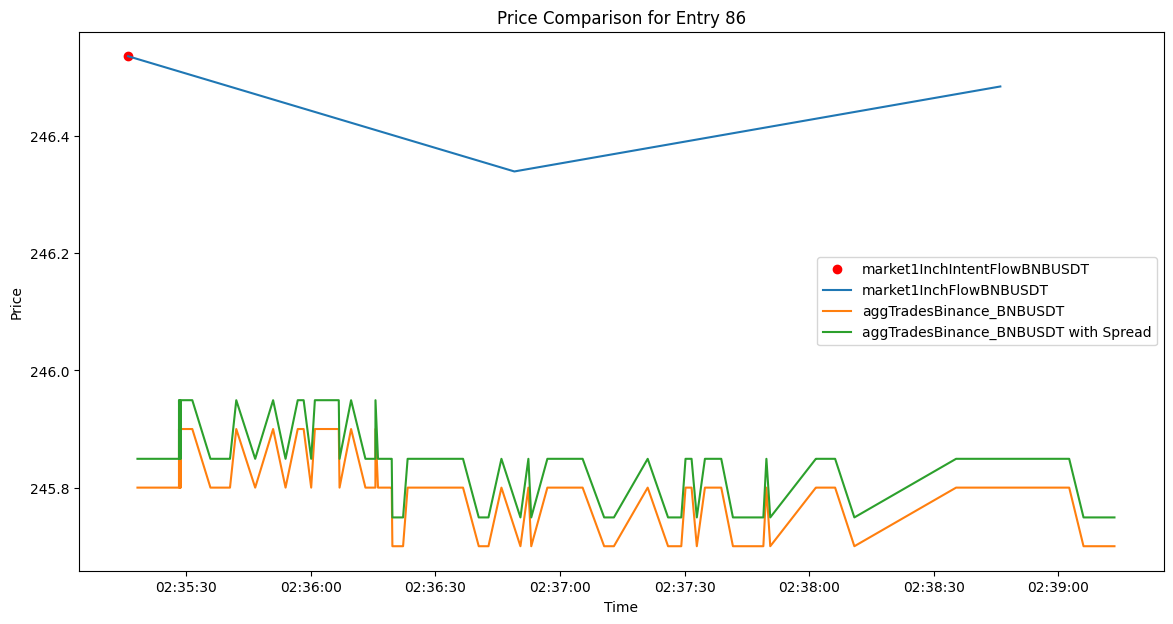

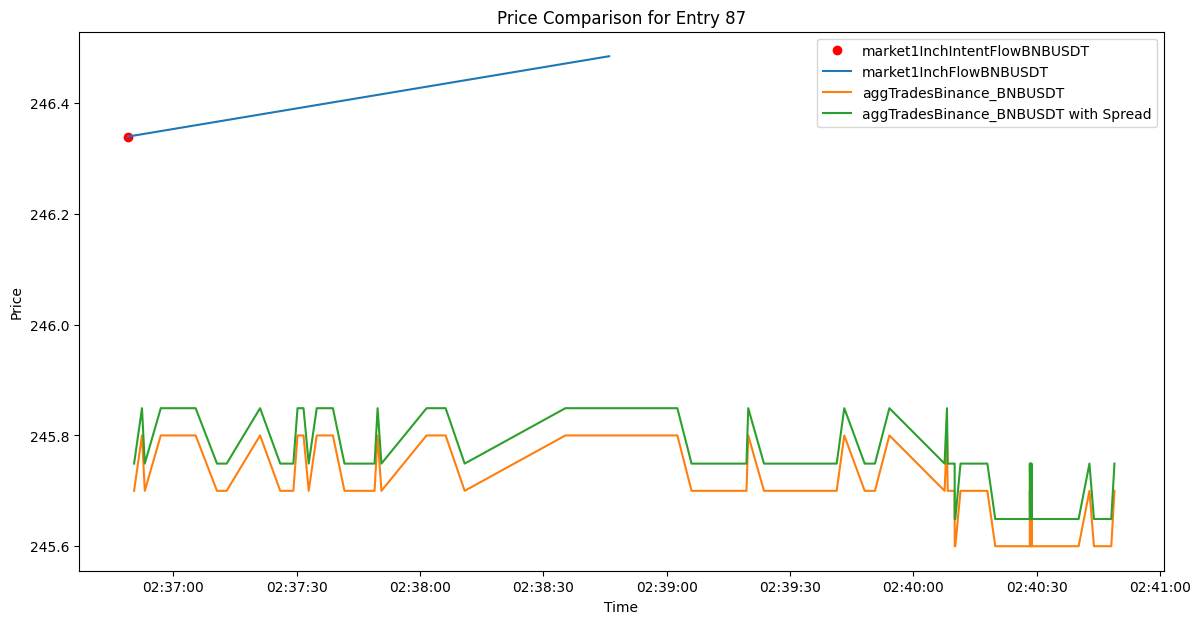

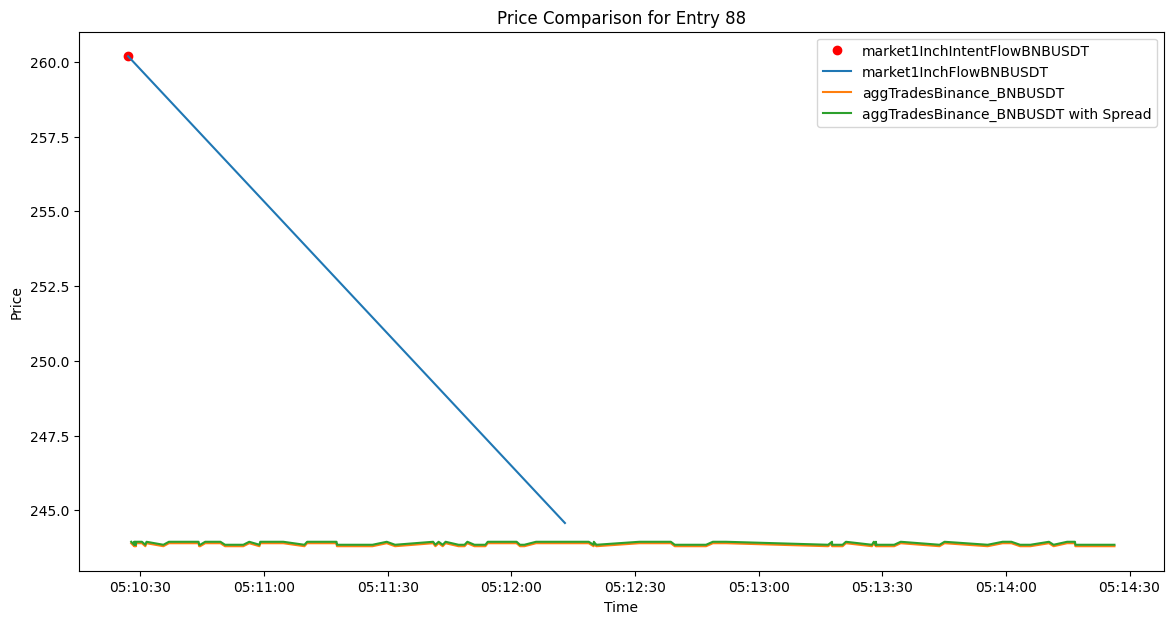

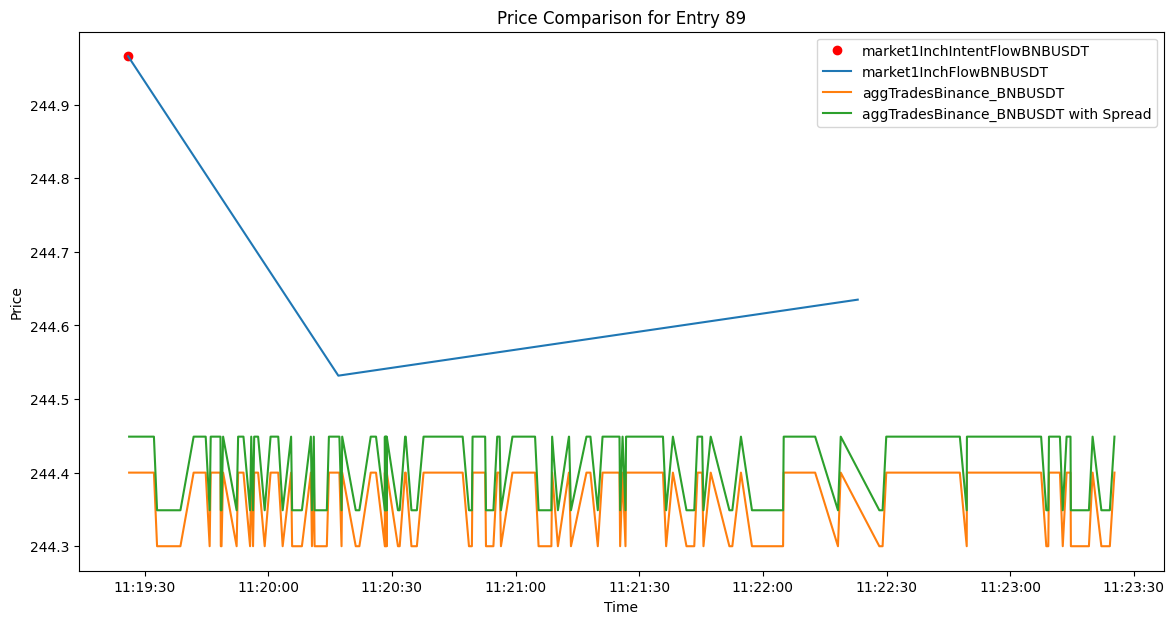

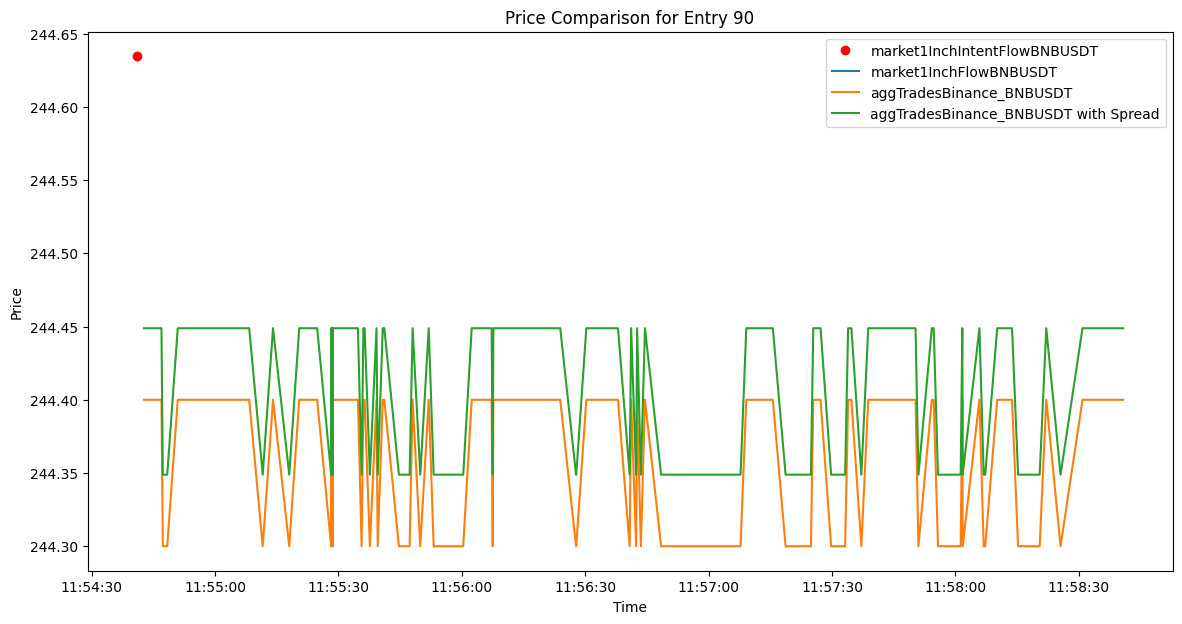

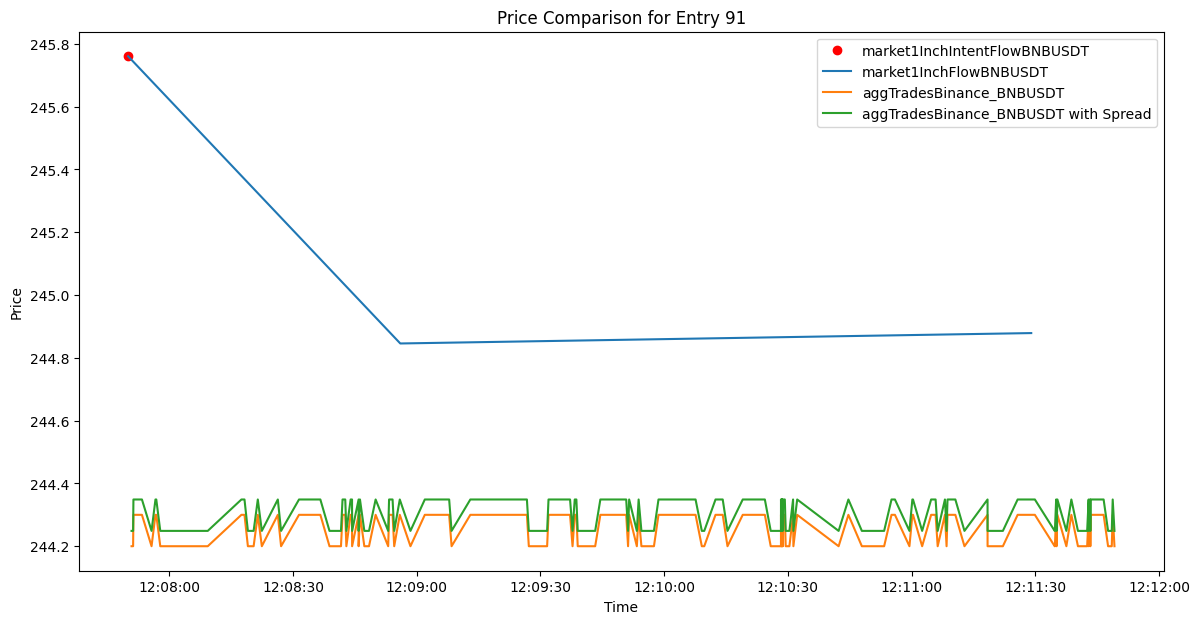

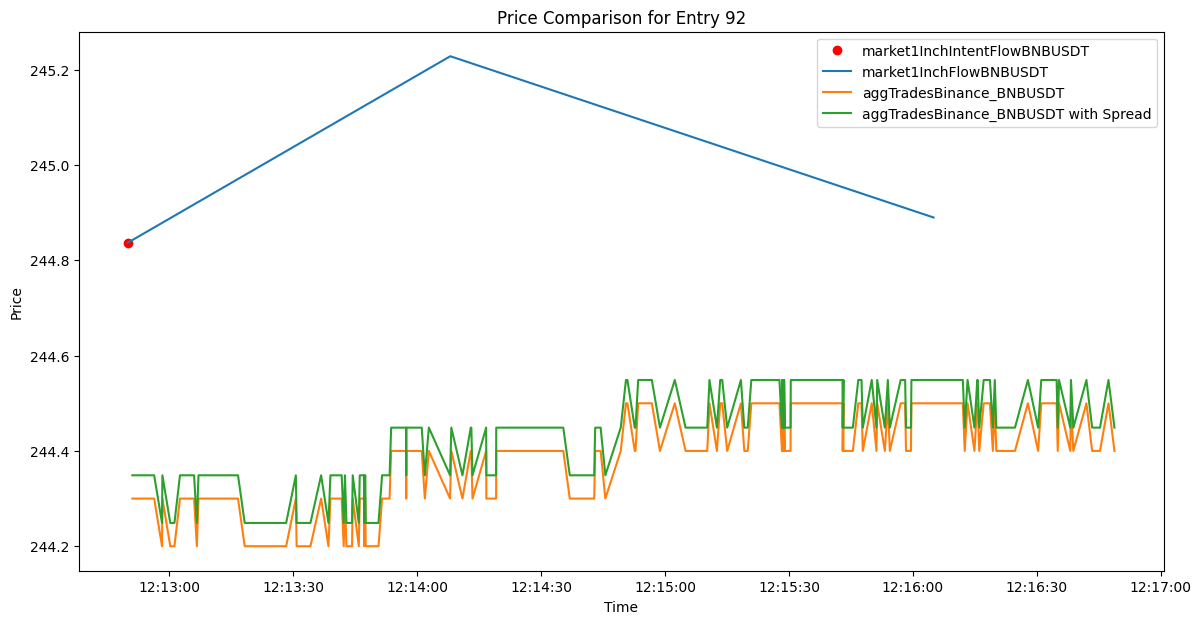

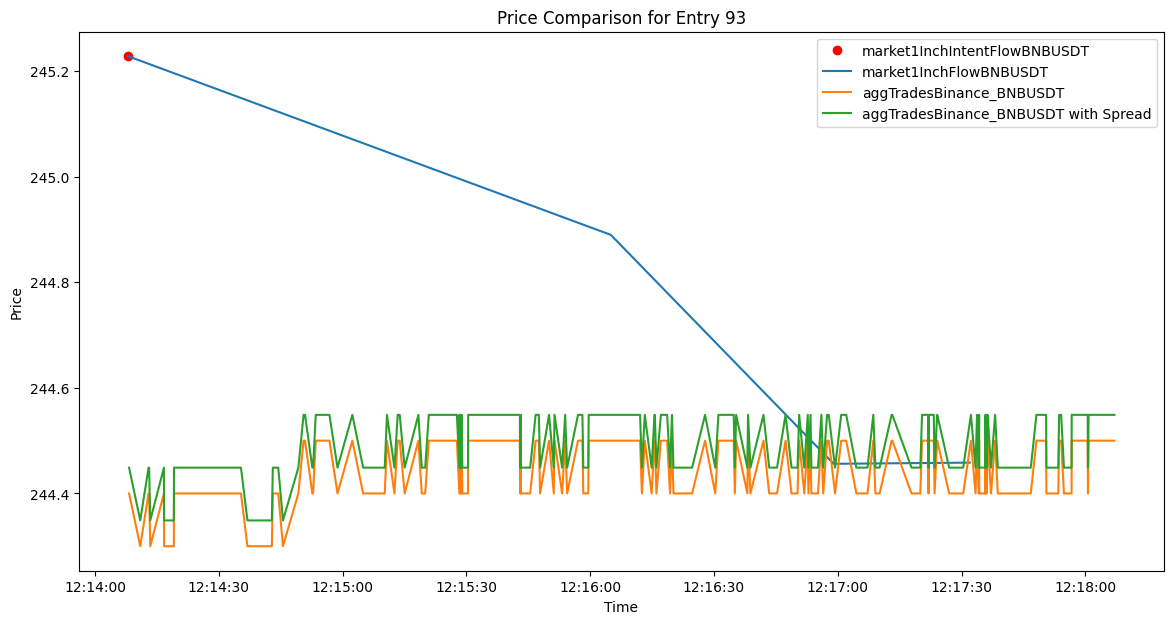

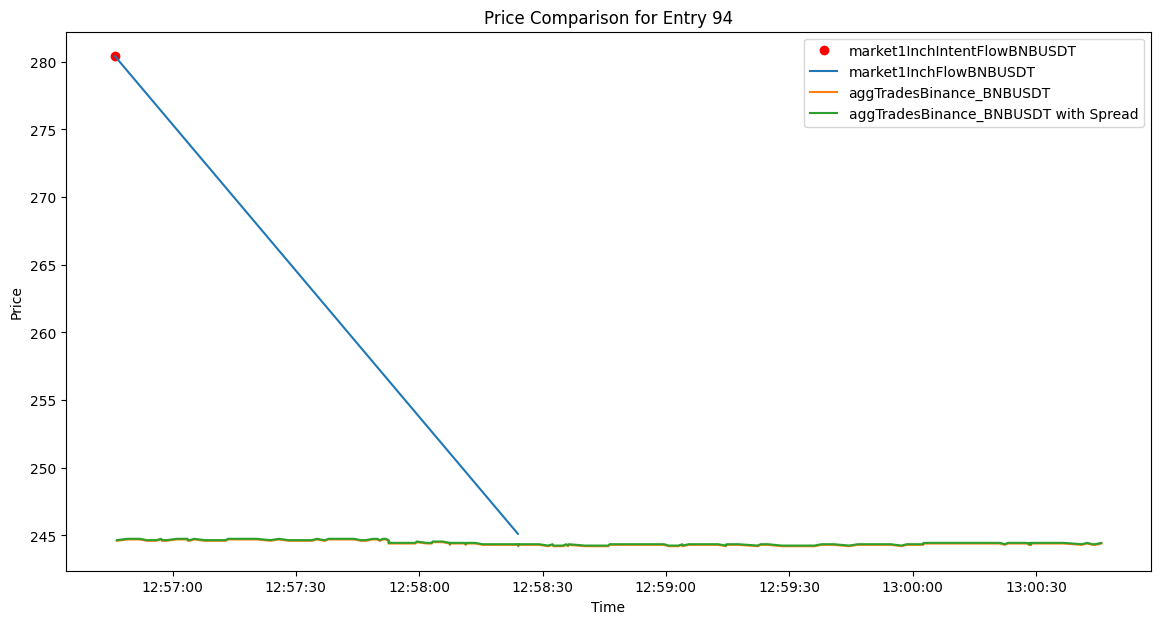

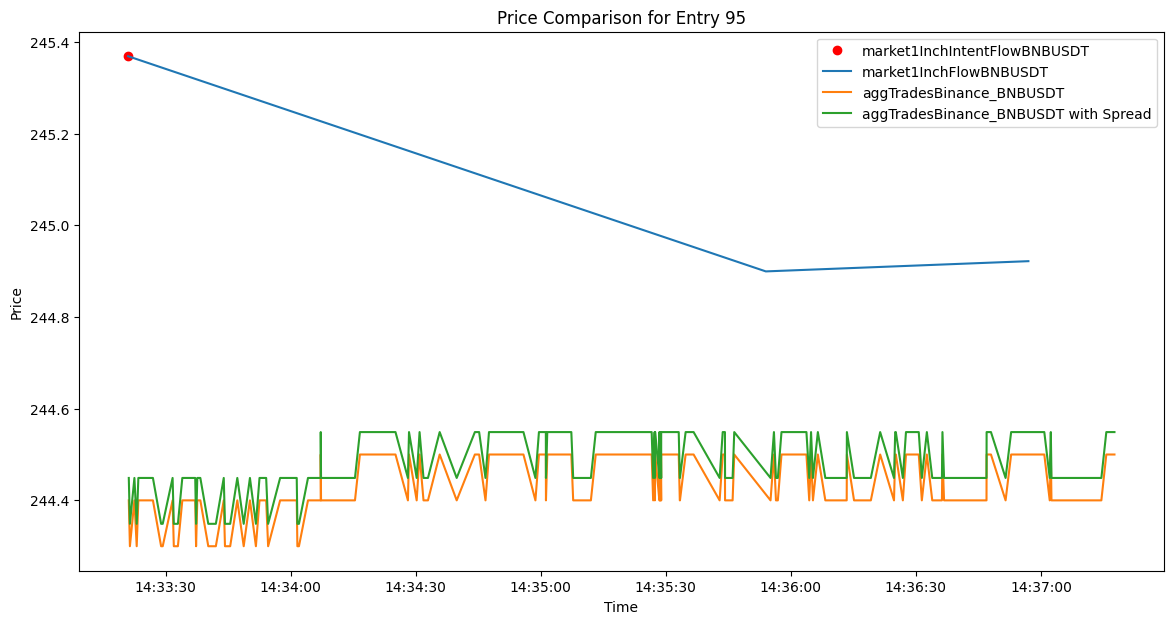

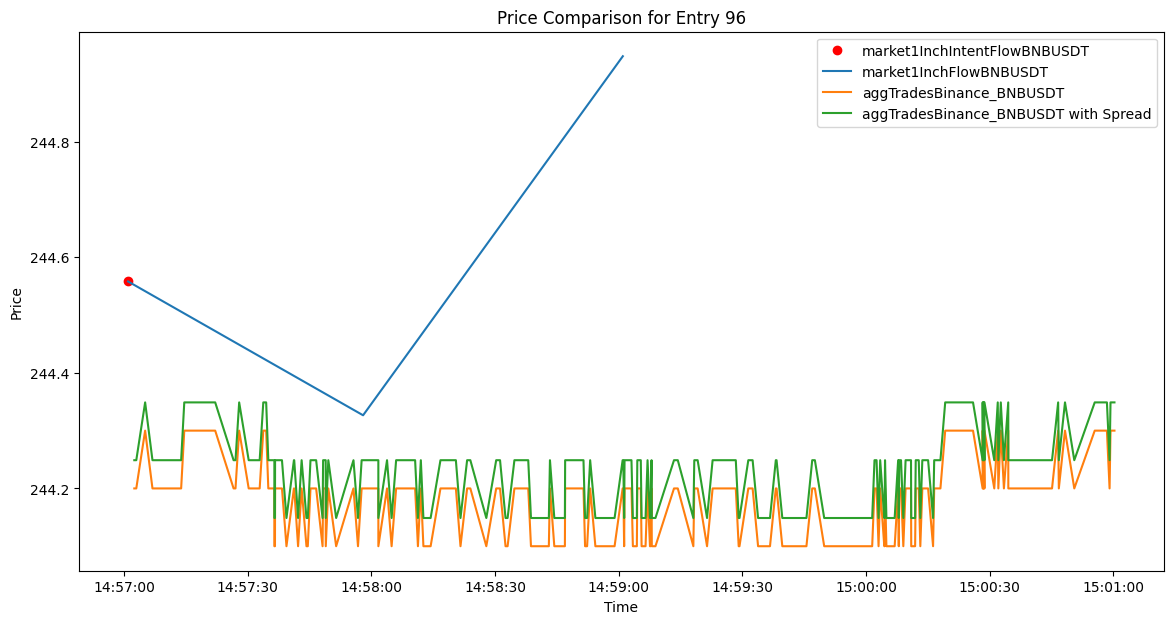

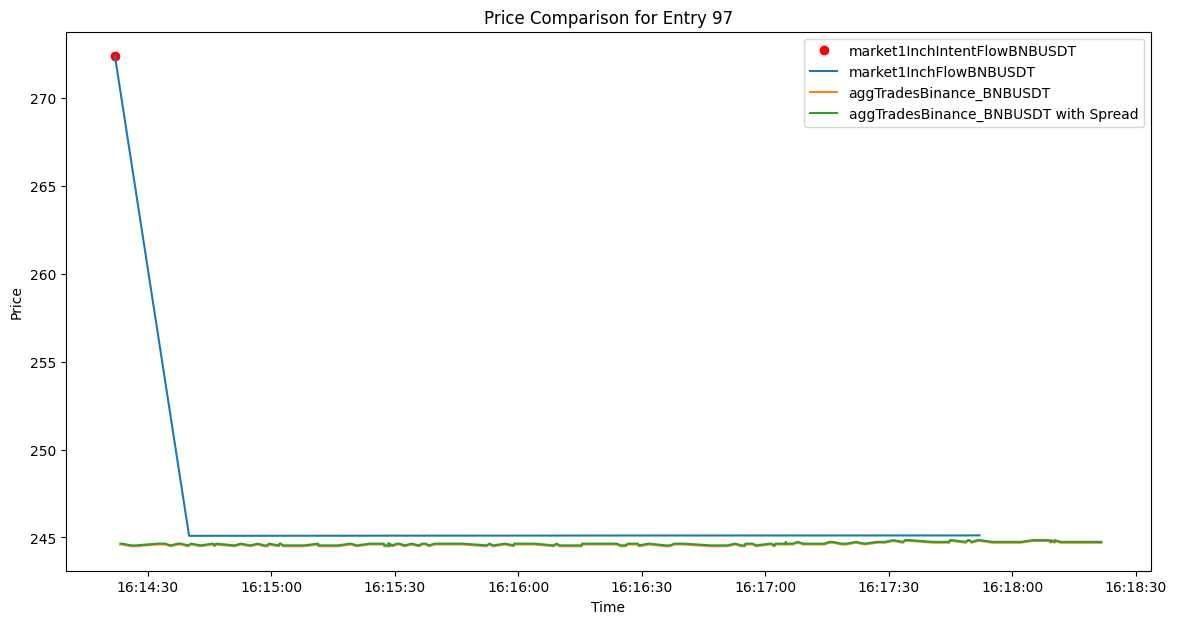

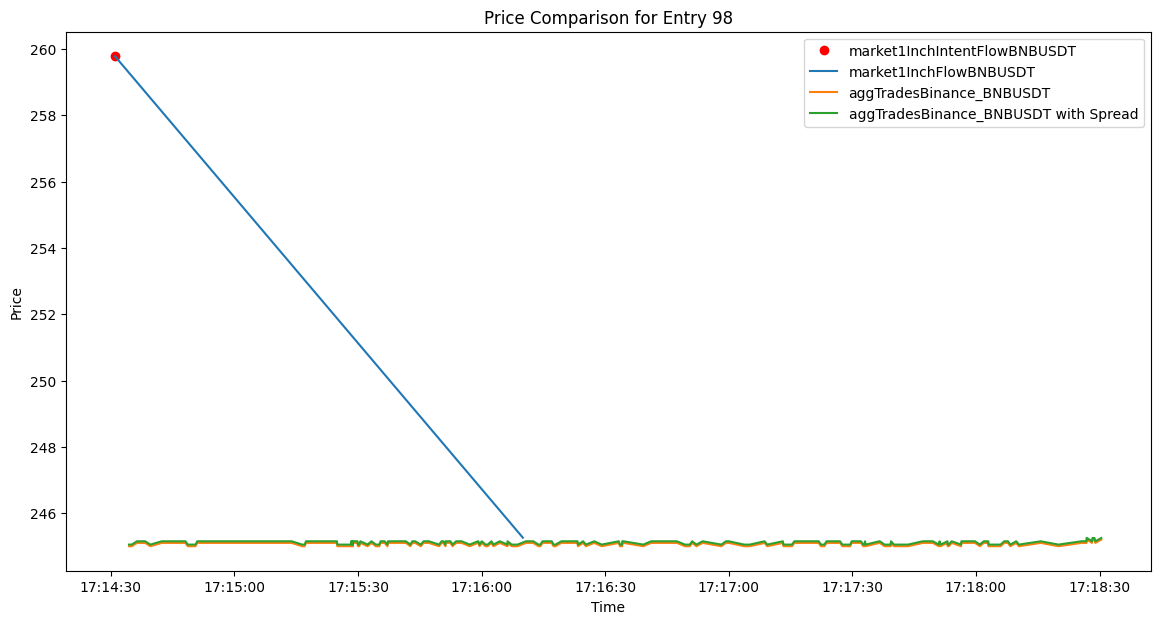

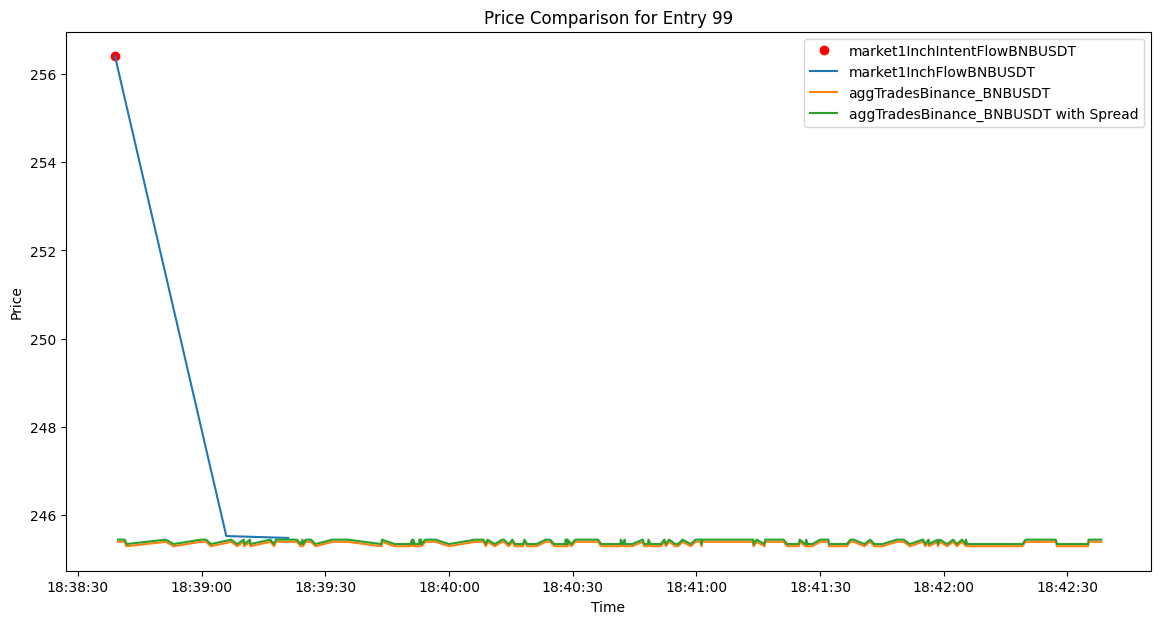

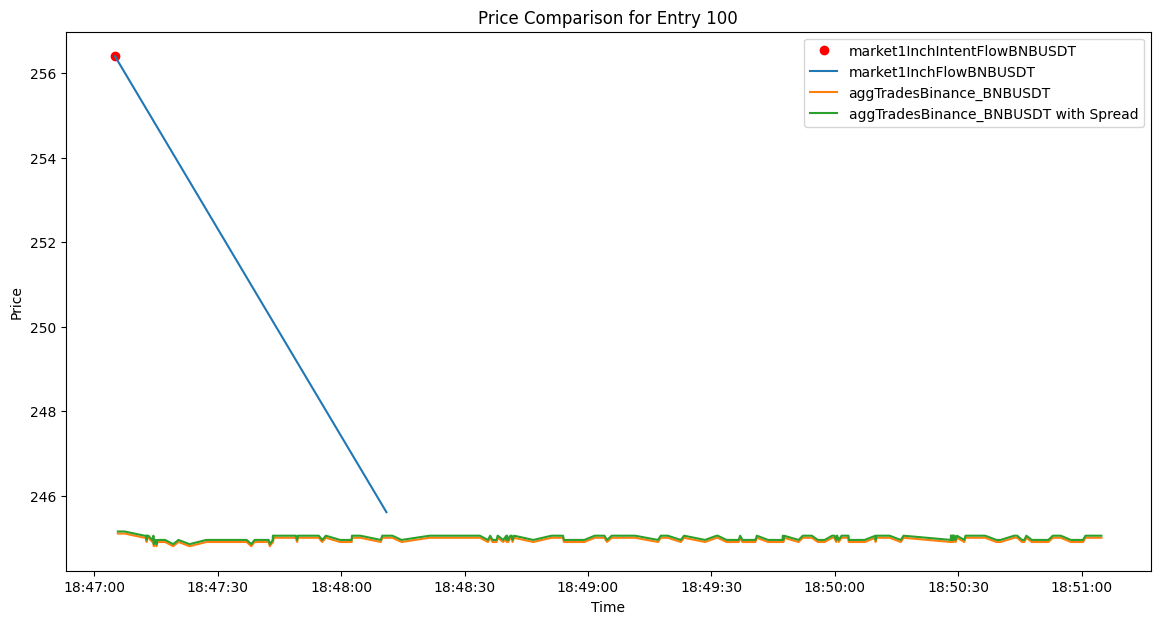

In [3]:
# Select the first 20 entries for intent_flow_df
filtered_intent_flow_df = intent_flow_df.head(100)

for i, row in filtered_intent_flow_df.iterrows():
    start_time = row['block_time']
    end_time = start_time + pd.Timedelta(minutes=4)

    filtered_flow_df = flow_df[(flow_df['block_time'] >= start_time) & (flow_df['block_time'] <= end_time)]
    filtered_agg_trades_df = agg_trades_df[(agg_trades_df['datetime'] >= start_time) & (agg_trades_df['datetime'] <= end_time)].copy()

    # Calculate the spread as a percentage of the price
    spread_percentage = 0.0002
    filtered_agg_trades_df.loc[:, 'price_with_spread'] = filtered_agg_trades_df['price'] * (1 + spread_percentage)

    # Plot the data
    plt.figure(figsize=(14, 7))

    # Plot market1InchIntentFlowBNBUSDT
    plt.plot(row['block_time'], row['price'], 'ro', label='market1InchIntentFlowBNBUSDT')

    # Plot market1InchFlowBNBUSDT
    plt.plot(filtered_flow_df['block_time'], filtered_flow_df['price'], label='market1InchFlowBNBUSDT')

    # Plot aggTradesBinance_BNBUSDT
    plt.plot(filtered_agg_trades_df['datetime'], filtered_agg_trades_df['price'], label='aggTradesBinance_BNBUSDT')

    # Plot aggTradesBinance_BNBUSDT with spread
    plt.plot(filtered_agg_trades_df['datetime'], filtered_agg_trades_df['price_with_spread'], label='aggTradesBinance_BNBUSDT with Spread')

    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Price Comparison for Entry {i+1}')
    plt.legend()

    # Show the plot
    plt.show()